
# truck auto parking


writers:
mohammad hosseinipour
ali khabazian

#### first we import essential libraries

In [394]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random

####   test sin and arcsin functions

In [395]:
math.sin(math.radians(90))
math.asin(1/2)/(math.pi/2)*90


30.000000000000004

#### create funcions that compute next step X and FI based on given formula

In [396]:
def new_x (x,fi,teta):
    return x+math.cos(math.radians(fi)+math.radians(teta))+math.sin(math.radians(teta))*math.sin(math.radians(fi))
b=4
def new_fi(fi,teta):
    return fi - math.asin(2*math.sin(math.radians(teta))/b)/(math.pi/2)*90

####   test some examples of new x and fi

In [397]:
new_x(2.88,18.23,-16.90)
new_fi(18.23,-16.90)

26.587610950262693

we wrote this simple function to make the linear functions of two sides of our triangle

In [398]:
def Triangle_maker(a,b,c):
    return [[a,c,1/(c-a),-1*a*(1/(c-a))],[c,b,-1/(c-a),b*(1/(c-a))]]

## for create and use membership_functions we declare classes with name functions and membership_func 
### for initial functions we make arraies of arraies that have these for items:
### 1 : start: start of range that have this liner function
### 2 : finish: finish of range that have this liner function 
### 3: a:a is the gradient of this line
### 4: b:b is  the y-intercept of this line
## the function class has two concepts:
### cump: that computes f(x) if x is on the triangle of each membership area
### center:computes center of each membership functions
## membership function takes functions and plot the graph

In [399]:
class functions:
    def __init__(self,mini_f):
#         ['start','finish','a','b'] ax+b
        self.mini_f= mini_f
    def cump(self,x):
        for i in range(len(self.mini_f)):            
            if x>=self.mini_f[i][0] and x<=self.mini_f[i][1]:
                return self.mini_f[i][2]*x+self.mini_f[i][3]
        return 0
    def center(self):
#         print(self.mini_f)
        for i in range(len(self.mini_f)):
            if i==0:
                mini=self.mini_f[i][0]
                maxi=self.mini_f[i][1]
            else:
                if(mini>self.mini_f[i][0]):
                    mini=self.mini_f[i][0]
                if(maxi<self.mini_f[i][1]):
                    maxi=self.mini_f[i][1] 
#             print(i)
#             print(mini)
#             print(maxi)
#         print(mini)
#         print(maxi)
        return (mini+maxi)/2

[[-115, -65, 0.02, 2.3000000000000003], [-65, -15, -0.02, -0.3]]
-65.0


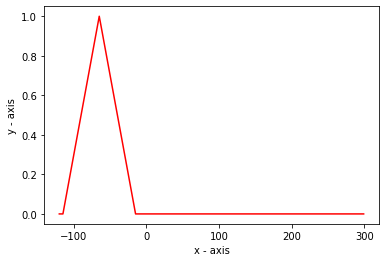

In [400]:
s=Triangle_maker(-115,-15,-65)
print(s)
s2=functions(s)
# print(s2.center())
s2=membership_func( 's3',s2)
s2.plot()
print(s2.center())

In [401]:
class membership_func:
    def __init__(self, name, func):
        self.name = name
        self.func = func
    
    def __str__(self):
        return self.name
    def cumpute(self,x):
        return self.func.cump(x)
    def plot(self,color='r',label=None,r_min=-120,r_max=300,steps=1):
        y=[]
        x=[]
        for j in range(steps*r_min,steps*r_max,1):
             x.append(j/steps)
        for i in range(steps*r_min,steps*r_max,1):
            y.append(self.cumpute(i/steps))
#         print('x:',i)
#         print('y:',y)
        plt.plot(x, y,color,label=label) 
        plt.xlabel('x - axis') 
        plt.ylabel('y - axis') 
#         plt.title(self.name) 
#         plt.show() 

    def center(self):
        return self.func.center()

test these memberships

0.0

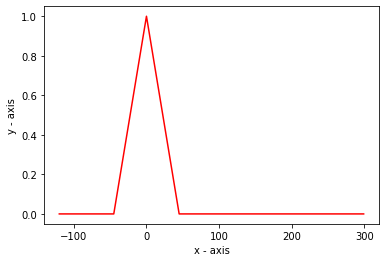

In [402]:
s3=functions([[-45,0,1/45,1],[0,45,-1/45,1]])
s33=membership_func('s3',s3)
s33.plot()
s33.center()

make all memberships function of fi

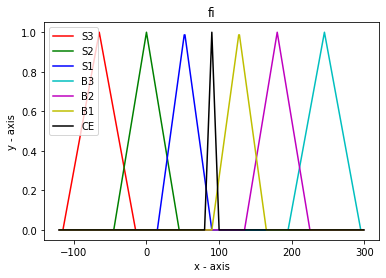

In [403]:
# fi
s3=functions(Triangle_maker(-115,-15,-65))
S3=membership_func('S3',s3)
s2=functions(Triangle_maker(-45,45,0))
S2=membership_func('S2',s2)
s1=functions(Triangle_maker(15,90,52.5))
S1=membership_func('S1',s1)
ce=functions(Triangle_maker(80,100,90))
CE=membership_func('CE',ce)
b1=functions(Triangle_maker(90,165,127.5))
B1=membership_func('B1',b1)
b2=functions(Triangle_maker(135,225,180))
B2=membership_func('B2',b2)
b3=functions(Triangle_maker(195,295,245))
B3=membership_func('B3',b3)

S3.plot( label='S3')
S2.plot('g',label='S2')
S1.plot('b',label='S1')
B3.plot('c',label='B3')
B2.plot('m',label='B2')
B1.plot('y',label='B1')
CE.plot('k',label='CE')
plt.title('fi')
plt.legend()
plt.show() 
fis_mem=[S3,S2,S1,CE,B1,B2,B3]



make all membership functions of x

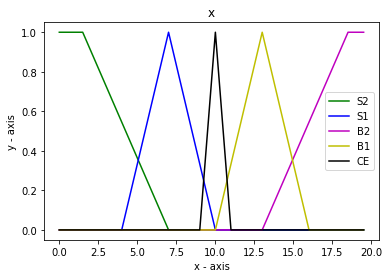

In [404]:

s2=functions([[0,1.5,0,1],[1.5,7,-1/5.5,7/5.5]])
S2=membership_func('S2',s2)
s1=functions(Triangle_maker(4,10,7))
S1=membership_func('S1',s1)
ce=functions(Triangle_maker(9,11,10))
CE=membership_func('CE',ce)
b1=functions(Triangle_maker(10,16,13))
B1=membership_func('B1',b1)
b2=functions([[13,18.5,1/5.5,-13/5.5],[18.5,20,0,1]])
B2=membership_func('B2',b2)



S2.plot('g',label='S2',r_min=0,r_max=20,steps=2)
S1.plot('b',label='S1',r_min=0,r_max=20,steps=2)
B2.plot('m',label='B2',r_min=0,r_max=20,steps=2)
B1.plot('y',label='B1',r_min=0,r_max=20,steps=2)
CE.plot('k',label='CE',r_min=0,r_max=20,steps=2)
plt.title('x')
plt.legend()
plt.show() 
xs_mem=[S2,S1,CE,B1,B2]

In [405]:
xs_mem[2].cumpute(10)

1.0

make all membership functions of theta

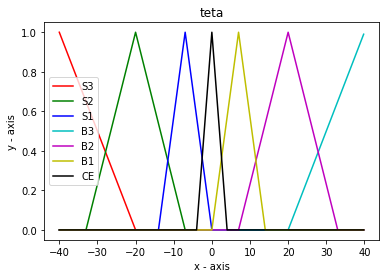

In [406]:
s3=functions([[-40,-20,-1/20,-1]])
S3=membership_func('S3',s3)
s2=functions(Triangle_maker(-33,-7,-20))
S2=membership_func('S2',s2)
s1=functions(Triangle_maker(-14,0,-7))
S1=membership_func('S1',s1)
ce=functions(Triangle_maker(-4,4,0))
CE=membership_func('CE',ce)
b1=functions(Triangle_maker(0,14,7))
B1=membership_func('B1',b1)
b2=functions(Triangle_maker(7,33,20))
B2=membership_func('B2',b2)
b3=functions([[20,40,1/20,-1]])
B3=membership_func('B3',b3)

S3.plot( label='S3',r_min=-40,r_max=40,steps=5)
S2.plot('g',label='S2',r_min=-40,r_max=40,steps=5)
S1.plot('b',label='S1',r_min=-40,r_max=40,steps=5)
B3.plot('c',label='B3',r_min=-40,r_max=40,steps=5)
B2.plot('m',label='B2',r_min=-40,r_max=40,steps=5)
B1.plot('y',label='B1',r_min=-40,r_max=40,steps=5)
CE.plot('k',label='CE',r_min=-40,r_max=40,steps=5)
plt.title('teta')
plt.legend()
plt.show() 
tetas_mem=[S3,S2,S1,CE,B1,B2,B3]


read all tabels

In [407]:
a=pd.read_csv('C:\\Users\\mohammad\\Desktop\\fuzzy_project\\1.csv')
a=a.to_numpy()

In [408]:
array_of_tabels=[]
for i in range(14):
    a=pd.read_csv('C:\\Users\\mohammad\\Desktop\\fuzzy_project\\'+str(i+1)+'.csv')
    
    array_of_tabels.append(a.to_numpy())
array_of_tabels  

[array([[  1.  ,   0.  , -19.  ],
        [  1.95,   9.37, -17.95],
        [  2.88,  18.23, -16.9 ],
        [  3.79,  26.59, -15.85],
        [  4.65,  34.44, -14.8 ],
        [  5.45,  41.78, -13.75],
        [  6.18,  48.6 , -12.7 ],
        [  7.48,  54.91, -11.65],
        [  7.99,  60.71, -10.6 ],
        [  8.72,  65.99,  -9.55],
        [  9.01,  70.75,  -8.5 ],
        [  9.28,  74.98,  -7.45],
        [  9.46,  78.7 ,  -6.4 ],
        [  9.59,  81.9 ,  -5.34],
        [  9.72,  84.57,  -4.3 ],
        [  9.81,  86.72,  -3.25],
        [  9.88,  88.34,  -2.2 ],
        [  9.91,  89.44,   0.  ]]),
 array([[  1.  ,  90.  ,  18.  ],
        [  1.15,  81.11,  16.  ],
        [  1.43,  73.19,  14.  ],
        [  1.83,  66.24,  12.  ],
        [  2.31,  60.27,  10.  ],
        [  2.88,  55.29,   8.  ],
        [  3.5 ,  51.3 ,   6.  ],
        [  4.16,  48.31,   4.  ],
        [  4.86,  46.31,   2.  ],
        [  5.56,  45.31,   0.  ],
        [  6.26,  45.31,  -2.  ],
        [  6

make all possible rules with data tables and membership functions

In [409]:
def rule_maker(x,fi,teta):
#     integ=0
    all_rule=[]
    for i in range(len(xs_mem)):
        for j in range(len(fis_mem)):
            for k in range(len(tetas_mem)):
                temp=[]
                temp.append(xs_mem[i])
                temp.append(fis_mem[j])
                temp.append(tetas_mem[k])
                temp.append(xs_mem[i].cumpute(x)*fis_mem[j].cumpute(fi)*tetas_mem[k].cumpute(teta))
                all_rule.append(temp)
    return  all_rule
    
def print_rule(rules):
    for i in range(len(rules)):
        rules[i]
        print('Rule '+str(i)+' : if x is '+str(rules[i][0])+' and fi is '+ str(rules[i][1]) + 'then teta is '+str(rules[i][2])+' with D= '+str(rules[i][3])) 
    

In [410]:
print_rule(rule_maker(20,225,32))


Rule 0 : if x is S2 and fi is S3then teta is S3 with D= 0
Rule 1 : if x is S2 and fi is S3then teta is S2 with D= 0
Rule 2 : if x is S2 and fi is S3then teta is S1 with D= 0
Rule 3 : if x is S2 and fi is S3then teta is CE with D= 0
Rule 4 : if x is S2 and fi is S3then teta is B1 with D= 0
Rule 5 : if x is S2 and fi is S3then teta is B2 with D= 0.0
Rule 6 : if x is S2 and fi is S3then teta is B3 with D= 0.0
Rule 7 : if x is S2 and fi is S2then teta is S3 with D= 0
Rule 8 : if x is S2 and fi is S2then teta is S2 with D= 0
Rule 9 : if x is S2 and fi is S2then teta is S1 with D= 0
Rule 10 : if x is S2 and fi is S2then teta is CE with D= 0
Rule 11 : if x is S2 and fi is S2then teta is B1 with D= 0
Rule 12 : if x is S2 and fi is S2then teta is B2 with D= 0.0
Rule 13 : if x is S2 and fi is S2then teta is B3 with D= 0.0
Rule 14 : if x is S2 and fi is S1then teta is S3 with D= 0
Rule 15 : if x is S2 and fi is S1then teta is S2 with D= 0
Rule 16 : if x is S2 and fi is S1then teta is S1 with D= 0

In [411]:
array_of_tabels[0]
for j in range(14):
    print('rules table '+str(j))
    for i in range(len(array_of_tabels[j])):
        print('rules for x='+str(array_of_tabels[j][i][0])+' fi='+str(array_of_tabels[j][i][1])+' then teta='+str(array_of_tabels[j][i][2]))
        print_rule(rule_maker(array_of_tabels[j][i][0],array_of_tabels[j][i][1],array_of_tabels[j][i][2]))

rules table 0
rules for x=1.0 fi=0.0 then teta=-19.0
Rule 0 : if x is S2 and fi is S3then teta is S3 with D= 0.0
Rule 1 : if x is S2 and fi is S3then teta is S2 with D= 0.0
Rule 2 : if x is S2 and fi is S3then teta is S1 with D= 0.0
Rule 3 : if x is S2 and fi is S3then teta is CE with D= 0.0
Rule 4 : if x is S2 and fi is S3then teta is B1 with D= 0.0
Rule 5 : if x is S2 and fi is S3then teta is B2 with D= 0.0
Rule 6 : if x is S2 and fi is S3then teta is B3 with D= 0.0
Rule 7 : if x is S2 and fi is S2then teta is S3 with D= 0.0
Rule 8 : if x is S2 and fi is S2then teta is S2 with D= 0.9230769230769231
Rule 9 : if x is S2 and fi is S2then teta is S1 with D= 0.0
Rule 10 : if x is S2 and fi is S2then teta is CE with D= 0.0
Rule 11 : if x is S2 and fi is S2then teta is B1 with D= 0.0
Rule 12 : if x is S2 and fi is S2then teta is B2 with D= 0.0
Rule 13 : if x is S2 and fi is S2then teta is B3 with D= 0.0
Rule 14 : if x is S2 and fi is S1then teta is S3 with D= 0.0
Rule 15 : if x is S2 and fi

Rule 61 : if x is S1 and fi is S2then teta is B2 with D= 0.0
Rule 62 : if x is S1 and fi is S2then teta is B3 with D= 0.0
Rule 63 : if x is S1 and fi is S1then teta is S3 with D= 0.0
Rule 64 : if x is S1 and fi is S1then teta is S2 with D= 0.17922
Rule 65 : if x is S1 and fi is S1then teta is S1 with D= 0.012327301587301623
Rule 66 : if x is S1 and fi is S1then teta is CE with D= 0.0
Rule 67 : if x is S1 and fi is S1then teta is B1 with D= 0.0
Rule 68 : if x is S1 and fi is S1then teta is B2 with D= 0.0
Rule 69 : if x is S1 and fi is S1then teta is B3 with D= 0.0
Rule 70 : if x is S1 and fi is CEthen teta is S3 with D= 0.0
Rule 71 : if x is S1 and fi is CEthen teta is S2 with D= 0.0
Rule 72 : if x is S1 and fi is CEthen teta is S1 with D= 0.0
Rule 73 : if x is S1 and fi is CEthen teta is CE with D= 0.0
Rule 74 : if x is S1 and fi is CEthen teta is B1 with D= 0.0
Rule 75 : if x is S1 and fi is CEthen teta is B2 with D= 0.0
Rule 76 : if x is S1 and fi is CEthen teta is B3 with D= 0.0
Rul

Rule 1 : if x is S2 and fi is S3then teta is S2 with D= 0.0
Rule 2 : if x is S2 and fi is S3then teta is S1 with D= 0.0
Rule 3 : if x is S2 and fi is S3then teta is CE with D= 0
Rule 4 : if x is S2 and fi is S3then teta is B1 with D= 0
Rule 5 : if x is S2 and fi is S3then teta is B2 with D= 0
Rule 6 : if x is S2 and fi is S3then teta is B3 with D= 0
Rule 7 : if x is S2 and fi is S2then teta is S3 with D= 0
Rule 8 : if x is S2 and fi is S2then teta is S2 with D= 0.0
Rule 9 : if x is S2 and fi is S2then teta is S1 with D= 0.0
Rule 10 : if x is S2 and fi is S2then teta is CE with D= 0
Rule 11 : if x is S2 and fi is S2then teta is B1 with D= 0
Rule 12 : if x is S2 and fi is S2then teta is B2 with D= 0
Rule 13 : if x is S2 and fi is S2then teta is B3 with D= 0
Rule 14 : if x is S2 and fi is S1then teta is S3 with D= 0.0
Rule 15 : if x is S2 and fi is S1then teta is S2 with D= 0.0
Rule 16 : if x is S2 and fi is S1then teta is S1 with D= 0.0
Rule 17 : if x is S2 and fi is S1then teta is CE wi

Rule 147 : if x is B1 and fi is S3then teta is S3 with D= 0
Rule 148 : if x is B1 and fi is S3then teta is S2 with D= 0
Rule 149 : if x is B1 and fi is S3then teta is S1 with D= 0.0
Rule 150 : if x is B1 and fi is S3then teta is CE with D= 0.0
Rule 151 : if x is B1 and fi is S3then teta is B1 with D= 0
Rule 152 : if x is B1 and fi is S3then teta is B2 with D= 0
Rule 153 : if x is B1 and fi is S3then teta is B3 with D= 0
Rule 154 : if x is B1 and fi is S2then teta is S3 with D= 0
Rule 155 : if x is B1 and fi is S2then teta is S2 with D= 0
Rule 156 : if x is B1 and fi is S2then teta is S1 with D= 0.0
Rule 157 : if x is B1 and fi is S2then teta is CE with D= 0.0
Rule 158 : if x is B1 and fi is S2then teta is B1 with D= 0
Rule 159 : if x is B1 and fi is S2then teta is B2 with D= 0
Rule 160 : if x is B1 and fi is S2then teta is B3 with D= 0
Rule 161 : if x is B1 and fi is S1then teta is S3 with D= 0.0
Rule 162 : if x is B1 and fi is S1then teta is S2 with D= 0.0
Rule 163 : if x is B1 and fi

Rule 0 : if x is S2 and fi is S3then teta is S3 with D= 0.0
Rule 1 : if x is S2 and fi is S3then teta is S2 with D= 0.0
Rule 2 : if x is S2 and fi is S3then teta is S1 with D= 0.0
Rule 3 : if x is S2 and fi is S3then teta is CE with D= 0.0
Rule 4 : if x is S2 and fi is S3then teta is B1 with D= 0.0
Rule 5 : if x is S2 and fi is S3then teta is B2 with D= 0.0
Rule 6 : if x is S2 and fi is S3then teta is B3 with D= 0.0
Rule 7 : if x is S2 and fi is S2then teta is S3 with D= 0.0
Rule 8 : if x is S2 and fi is S2then teta is S2 with D= 0.0
Rule 9 : if x is S2 and fi is S2then teta is S1 with D= 0.0
Rule 10 : if x is S2 and fi is S2then teta is CE with D= 0.0
Rule 11 : if x is S2 and fi is S2then teta is B1 with D= 0.0
Rule 12 : if x is S2 and fi is S2then teta is B2 with D= 0.0
Rule 13 : if x is S2 and fi is S2then teta is B3 with D= 0.0
Rule 14 : if x is S2 and fi is S1then teta is S3 with D= 0.0
Rule 15 : if x is S2 and fi is S1then teta is S2 with D= 0.0
Rule 16 : if x is S2 and fi is S1t

Rule 63 : if x is S1 and fi is S1then teta is S3 with D= 0.0
Rule 64 : if x is S1 and fi is S1then teta is S2 with D= 0.0
Rule 65 : if x is S1 and fi is S1then teta is S1 with D= 0.0
Rule 66 : if x is S1 and fi is S1then teta is CE with D= 0.4202986666666666
Rule 67 : if x is S1 and fi is S1then teta is B1 with D= 0.0
Rule 68 : if x is S1 and fi is S1then teta is B2 with D= 0.0
Rule 69 : if x is S1 and fi is S1then teta is B3 with D= 0.0
Rule 70 : if x is S1 and fi is CEthen teta is S3 with D= 0.0
Rule 71 : if x is S1 and fi is CEthen teta is S2 with D= 0.0
Rule 72 : if x is S1 and fi is CEthen teta is S1 with D= 0.0
Rule 73 : if x is S1 and fi is CEthen teta is CE with D= 0.0
Rule 74 : if x is S1 and fi is CEthen teta is B1 with D= 0.0
Rule 75 : if x is S1 and fi is CEthen teta is B2 with D= 0.0
Rule 76 : if x is S1 and fi is CEthen teta is B3 with D= 0.0
Rule 77 : if x is S1 and fi is B1then teta is S3 with D= 0.0
Rule 78 : if x is S1 and fi is B1then teta is S2 with D= 0.0
Rule 79 :

Rule 175 : if x is B1 and fi is B1then teta is S3 with D= 0
Rule 176 : if x is B1 and fi is B1then teta is S2 with D= 0.0
Rule 177 : if x is B1 and fi is B1then teta is S1 with D= 0.0
Rule 178 : if x is B1 and fi is B1then teta is CE with D= 0
Rule 179 : if x is B1 and fi is B1then teta is B1 with D= 0
Rule 180 : if x is B1 and fi is B1then teta is B2 with D= 0
Rule 181 : if x is B1 and fi is B1then teta is B3 with D= 0
Rule 182 : if x is B1 and fi is B2then teta is S3 with D= 0
Rule 183 : if x is B1 and fi is B2then teta is S2 with D= 0.0
Rule 184 : if x is B1 and fi is B2then teta is S1 with D= 0.0
Rule 185 : if x is B1 and fi is B2then teta is CE with D= 0
Rule 186 : if x is B1 and fi is B2then teta is B1 with D= 0
Rule 187 : if x is B1 and fi is B2then teta is B2 with D= 0
Rule 188 : if x is B1 and fi is B2then teta is B3 with D= 0
Rule 189 : if x is B1 and fi is B3then teta is S3 with D= 0
Rule 190 : if x is B1 and fi is B3then teta is S2 with D= 0.0
Rule 191 : if x is B1 and fi i

Rule 91 : if x is S1 and fi is B3then teta is S3 with D= 0.0
Rule 92 : if x is S1 and fi is B3then teta is S2 with D= 0.0
Rule 93 : if x is S1 and fi is B3then teta is S1 with D= 0
Rule 94 : if x is S1 and fi is B3then teta is CE with D= 0
Rule 95 : if x is S1 and fi is B3then teta is B1 with D= 0
Rule 96 : if x is S1 and fi is B3then teta is B2 with D= 0
Rule 97 : if x is S1 and fi is B3then teta is B3 with D= 0
Rule 98 : if x is CE and fi is S3then teta is S3 with D= 0.0
Rule 99 : if x is CE and fi is S3then teta is S2 with D= 0.0
Rule 100 : if x is CE and fi is S3then teta is S1 with D= 0.0
Rule 101 : if x is CE and fi is S3then teta is CE with D= 0.0
Rule 102 : if x is CE and fi is S3then teta is B1 with D= 0.0
Rule 103 : if x is CE and fi is S3then teta is B2 with D= 0.0
Rule 104 : if x is CE and fi is S3then teta is B3 with D= 0.0
Rule 105 : if x is CE and fi is S2then teta is S3 with D= 0.0
Rule 106 : if x is CE and fi is S2then teta is S2 with D= 0.0
Rule 107 : if x is CE and f

Rule 82 : if x is S1 and fi is B1then teta is B2 with D= 0.0
Rule 83 : if x is S1 and fi is B1then teta is B3 with D= 0.0
Rule 84 : if x is S1 and fi is B2then teta is S3 with D= 0.0
Rule 85 : if x is S1 and fi is B2then teta is S2 with D= 0.0
Rule 86 : if x is S1 and fi is B2then teta is S1 with D= 0.0
Rule 87 : if x is S1 and fi is B2then teta is CE with D= 0.0
Rule 88 : if x is S1 and fi is B2then teta is B1 with D= 0.0
Rule 89 : if x is S1 and fi is B2then teta is B2 with D= 0.0
Rule 90 : if x is S1 and fi is B2then teta is B3 with D= 0.0
Rule 91 : if x is S1 and fi is B3then teta is S3 with D= 0.0
Rule 92 : if x is S1 and fi is B3then teta is S2 with D= 0.0
Rule 93 : if x is S1 and fi is B3then teta is S1 with D= 0.0
Rule 94 : if x is S1 and fi is B3then teta is CE with D= 0.0
Rule 95 : if x is S1 and fi is B3then teta is B1 with D= 0.0
Rule 96 : if x is S1 and fi is B3then teta is B2 with D= 0.0
Rule 97 : if x is S1 and fi is B3then teta is B3 with D= 0.0
Rule 98 : if x is CE and

Rule 17 : if x is S2 and fi is S1then teta is CE with D= 0.0
Rule 18 : if x is S2 and fi is S1then teta is B1 with D= 0.0
Rule 19 : if x is S2 and fi is S1then teta is B2 with D= 0.0
Rule 20 : if x is S2 and fi is S1then teta is B3 with D= 0.0
Rule 21 : if x is S2 and fi is CEthen teta is S3 with D= 0
Rule 22 : if x is S2 and fi is CEthen teta is S2 with D= 0.0
Rule 23 : if x is S2 and fi is CEthen teta is S1 with D= 0
Rule 24 : if x is S2 and fi is CEthen teta is CE with D= 0
Rule 25 : if x is S2 and fi is CEthen teta is B1 with D= 0
Rule 26 : if x is S2 and fi is CEthen teta is B2 with D= 0
Rule 27 : if x is S2 and fi is CEthen teta is B3 with D= 0
Rule 28 : if x is S2 and fi is B1then teta is S3 with D= 0
Rule 29 : if x is S2 and fi is B1then teta is S2 with D= 0.0
Rule 30 : if x is S2 and fi is B1then teta is S1 with D= 0
Rule 31 : if x is S2 and fi is B1then teta is CE with D= 0
Rule 32 : if x is S2 and fi is B1then teta is B1 with D= 0
Rule 33 : if x is S2 and fi is B1then teta i

Rule 108 : if x is CE and fi is S2then teta is CE with D= 0.0
Rule 109 : if x is CE and fi is S2then teta is B1 with D= 0.0
Rule 110 : if x is CE and fi is S2then teta is B2 with D= 0.0
Rule 111 : if x is CE and fi is S2then teta is B3 with D= 0.0
Rule 112 : if x is CE and fi is S1then teta is S3 with D= 0.0
Rule 113 : if x is CE and fi is S1then teta is S2 with D= 0.0
Rule 114 : if x is CE and fi is S1then teta is S1 with D= 0.0
Rule 115 : if x is CE and fi is S1then teta is CE with D= 0.0
Rule 116 : if x is CE and fi is S1then teta is B1 with D= 0.0
Rule 117 : if x is CE and fi is S1then teta is B2 with D= 0.0
Rule 118 : if x is CE and fi is S1then teta is B3 with D= 0.0
Rule 119 : if x is CE and fi is CEthen teta is S3 with D= 0.0
Rule 120 : if x is CE and fi is CEthen teta is S2 with D= 0.0
Rule 121 : if x is CE and fi is CEthen teta is S1 with D= 0.0
Rule 122 : if x is CE and fi is CEthen teta is CE with D= 0.8682599999999986
Rule 123 : if x is CE and fi is CEthen teta is B1 with 

Rule 44 : if x is S2 and fi is B3then teta is S1 with D= 0.0
Rule 45 : if x is S2 and fi is B3then teta is CE with D= 0.0
Rule 46 : if x is S2 and fi is B3then teta is B1 with D= 0
Rule 47 : if x is S2 and fi is B3then teta is B2 with D= 0
Rule 48 : if x is S2 and fi is B3then teta is B3 with D= 0
Rule 49 : if x is S1 and fi is S3then teta is S3 with D= 0.0
Rule 50 : if x is S1 and fi is S3then teta is S2 with D= 0.0
Rule 51 : if x is S1 and fi is S3then teta is S1 with D= 0.0
Rule 52 : if x is S1 and fi is S3then teta is CE with D= 0.0
Rule 53 : if x is S1 and fi is S3then teta is B1 with D= 0.0
Rule 54 : if x is S1 and fi is S3then teta is B2 with D= 0.0
Rule 55 : if x is S1 and fi is S3then teta is B3 with D= 0.0
Rule 56 : if x is S1 and fi is S2then teta is S3 with D= 0.0
Rule 57 : if x is S1 and fi is S2then teta is S2 with D= 0.0
Rule 58 : if x is S1 and fi is S2then teta is S1 with D= 0.0
Rule 59 : if x is S1 and fi is S2then teta is CE with D= 0.0
Rule 60 : if x is S1 and fi is

Rule 198 : if x is B2 and fi is S3then teta is S1 with D= 0
Rule 199 : if x is B2 and fi is S3then teta is CE with D= 0
Rule 200 : if x is B2 and fi is S3then teta is B1 with D= 0.0
Rule 201 : if x is B2 and fi is S3then teta is B2 with D= 0
Rule 202 : if x is B2 and fi is S3then teta is B3 with D= 0
Rule 203 : if x is B2 and fi is S2then teta is S3 with D= 0
Rule 204 : if x is B2 and fi is S2then teta is S2 with D= 0
Rule 205 : if x is B2 and fi is S2then teta is S1 with D= 0
Rule 206 : if x is B2 and fi is S2then teta is CE with D= 0
Rule 207 : if x is B2 and fi is S2then teta is B1 with D= 0.0
Rule 208 : if x is B2 and fi is S2then teta is B2 with D= 0
Rule 209 : if x is B2 and fi is S2then teta is B3 with D= 0
Rule 210 : if x is B2 and fi is S1then teta is S3 with D= 0.0
Rule 211 : if x is B2 and fi is S1then teta is S2 with D= 0.0
Rule 212 : if x is B2 and fi is S1then teta is S1 with D= 0.0
Rule 213 : if x is B2 and fi is S1then teta is CE with D= 0.0
Rule 214 : if x is B2 and fi

Rule 211 : if x is B2 and fi is S1then teta is S2 with D= 0.0
Rule 212 : if x is B2 and fi is S1then teta is S1 with D= 0.0
Rule 213 : if x is B2 and fi is S1then teta is CE with D= 0.0
Rule 214 : if x is B2 and fi is S1then teta is B1 with D= 0.0
Rule 215 : if x is B2 and fi is S1then teta is B2 with D= 0.0
Rule 216 : if x is B2 and fi is S1then teta is B3 with D= 0.0
Rule 217 : if x is B2 and fi is CEthen teta is S3 with D= 0
Rule 218 : if x is B2 and fi is CEthen teta is S2 with D= 0
Rule 219 : if x is B2 and fi is CEthen teta is S1 with D= 0.0
Rule 220 : if x is B2 and fi is CEthen teta is CE with D= 0.0
Rule 221 : if x is B2 and fi is CEthen teta is B1 with D= 0
Rule 222 : if x is B2 and fi is CEthen teta is B2 with D= 0
Rule 223 : if x is B2 and fi is CEthen teta is B3 with D= 0
Rule 224 : if x is B2 and fi is B1then teta is S3 with D= 0
Rule 225 : if x is B2 and fi is B1then teta is S2 with D= 0
Rule 226 : if x is B2 and fi is B1then teta is S1 with D= 0.0
Rule 227 : if x is B2 

Rule 191 : if x is B1 and fi is B3then teta is S1 with D= 0.0
Rule 192 : if x is B1 and fi is B3then teta is CE with D= 0.0
Rule 193 : if x is B1 and fi is B3then teta is B1 with D= 0.0
Rule 194 : if x is B1 and fi is B3then teta is B2 with D= 0.0
Rule 195 : if x is B1 and fi is B3then teta is B3 with D= 0.0
Rule 196 : if x is B2 and fi is S3then teta is S3 with D= 0
Rule 197 : if x is B2 and fi is S3then teta is S2 with D= 0
Rule 198 : if x is B2 and fi is S3then teta is S1 with D= 0.0
Rule 199 : if x is B2 and fi is S3then teta is CE with D= 0.0
Rule 200 : if x is B2 and fi is S3then teta is B1 with D= 0.0
Rule 201 : if x is B2 and fi is S3then teta is B2 with D= 0
Rule 202 : if x is B2 and fi is S3then teta is B3 with D= 0
Rule 203 : if x is B2 and fi is S2then teta is S3 with D= 0
Rule 204 : if x is B2 and fi is S2then teta is S2 with D= 0
Rule 205 : if x is B2 and fi is S2then teta is S1 with D= 0.0
Rule 206 : if x is B2 and fi is S2then teta is CE with D= 0.0
Rule 207 : if x is B

Rule 17 : if x is S2 and fi is S1then teta is CE with D= 0.0
Rule 18 : if x is S2 and fi is S1then teta is B1 with D= 0.0
Rule 19 : if x is S2 and fi is S1then teta is B2 with D= 0.0
Rule 20 : if x is S2 and fi is S1then teta is B3 with D= 0.0
Rule 21 : if x is S2 and fi is CEthen teta is S3 with D= 0.0
Rule 22 : if x is S2 and fi is CEthen teta is S2 with D= 0.0
Rule 23 : if x is S2 and fi is CEthen teta is S1 with D= 0.0
Rule 24 : if x is S2 and fi is CEthen teta is CE with D= 0.0
Rule 25 : if x is S2 and fi is CEthen teta is B1 with D= 0.0
Rule 26 : if x is S2 and fi is CEthen teta is B2 with D= 0.004250769230768935
Rule 27 : if x is S2 and fi is CEthen teta is B3 with D= 0.0012279999999999154
Rule 28 : if x is S2 and fi is B1then teta is S3 with D= 0.0
Rule 29 : if x is S2 and fi is B1then teta is S2 with D= 0.0
Rule 30 : if x is S2 and fi is B1then teta is S1 with D= 0.0
Rule 31 : if x is S2 and fi is B1then teta is CE with D= 0.0
Rule 32 : if x is S2 and fi is B1then teta is B1 w

Rule 12 : if x is S2 and fi is S2then teta is B2 with D= 0.0
Rule 13 : if x is S2 and fi is S2then teta is B3 with D= 0.0
Rule 14 : if x is S2 and fi is S1then teta is S3 with D= 0.0
Rule 15 : if x is S2 and fi is S1then teta is S2 with D= 0.0
Rule 16 : if x is S2 and fi is S1then teta is S1 with D= 0.0
Rule 17 : if x is S2 and fi is S1then teta is CE with D= 0.0
Rule 18 : if x is S2 and fi is S1then teta is B1 with D= 0.30471148051948066
Rule 19 : if x is S2 and fi is S1then teta is B2 with D= 0.02734590209790209
Rule 20 : if x is S2 and fi is S1then teta is B3 with D= 0.0
Rule 21 : if x is S2 and fi is CEthen teta is S3 with D= 0.0
Rule 22 : if x is S2 and fi is CEthen teta is S2 with D= 0.0
Rule 23 : if x is S2 and fi is CEthen teta is S1 with D= 0.0
Rule 24 : if x is S2 and fi is CEthen teta is CE with D= 0.0
Rule 25 : if x is S2 and fi is CEthen teta is B1 with D= 0.0
Rule 26 : if x is S2 and fi is CEthen teta is B2 with D= 0.0
Rule 27 : if x is S2 and fi is CEthen teta is B3 with

Rule 180 : if x is B1 and fi is B1then teta is B2 with D= 0
Rule 181 : if x is B1 and fi is B1then teta is B3 with D= 0
Rule 182 : if x is B1 and fi is B2then teta is S3 with D= 0
Rule 183 : if x is B1 and fi is B2then teta is S2 with D= 0.0
Rule 184 : if x is B1 and fi is B2then teta is S1 with D= 0.0
Rule 185 : if x is B1 and fi is B2then teta is CE with D= 0
Rule 186 : if x is B1 and fi is B2then teta is B1 with D= 0
Rule 187 : if x is B1 and fi is B2then teta is B2 with D= 0
Rule 188 : if x is B1 and fi is B2then teta is B3 with D= 0
Rule 189 : if x is B1 and fi is B3then teta is S3 with D= 0
Rule 190 : if x is B1 and fi is B3then teta is S2 with D= 0.0
Rule 191 : if x is B1 and fi is B3then teta is S1 with D= 0.0
Rule 192 : if x is B1 and fi is B3then teta is CE with D= 0
Rule 193 : if x is B1 and fi is B3then teta is B1 with D= 0
Rule 194 : if x is B1 and fi is B3then teta is B2 with D= 0
Rule 195 : if x is B1 and fi is B3then teta is B3 with D= 0
Rule 196 : if x is B2 and fi is 

Rule 78 : if x is S1 and fi is B1then teta is S2 with D= 0
Rule 79 : if x is S1 and fi is B1then teta is S1 with D= 0.0
Rule 80 : if x is S1 and fi is B1then teta is CE with D= 0.0
Rule 81 : if x is S1 and fi is B1then teta is B1 with D= 0.0
Rule 82 : if x is S1 and fi is B1then teta is B2 with D= 0
Rule 83 : if x is S1 and fi is B1then teta is B3 with D= 0
Rule 84 : if x is S1 and fi is B2then teta is S3 with D= 0
Rule 85 : if x is S1 and fi is B2then teta is S2 with D= 0
Rule 86 : if x is S1 and fi is B2then teta is S1 with D= 0.0
Rule 87 : if x is S1 and fi is B2then teta is CE with D= 0.0
Rule 88 : if x is S1 and fi is B2then teta is B1 with D= 0.0
Rule 89 : if x is S1 and fi is B2then teta is B2 with D= 0
Rule 90 : if x is S1 and fi is B2then teta is B3 with D= 0
Rule 91 : if x is S1 and fi is B3then teta is S3 with D= 0
Rule 92 : if x is S1 and fi is B3then teta is S2 with D= 0
Rule 93 : if x is S1 and fi is B3then teta is S1 with D= 0.0
Rule 94 : if x is S1 and fi is B3then teta

Rule 93 : if x is S1 and fi is B3then teta is S1 with D= 0.0
Rule 94 : if x is S1 and fi is B3then teta is CE with D= 0.0
Rule 95 : if x is S1 and fi is B3then teta is B1 with D= 0.0
Rule 96 : if x is S1 and fi is B3then teta is B2 with D= 0.0
Rule 97 : if x is S1 and fi is B3then teta is B3 with D= 0.0
Rule 98 : if x is CE and fi is S3then teta is S3 with D= 0.005928000000000014
Rule 99 : if x is CE and fi is S3then teta is S2 with D= 0.0
Rule 100 : if x is CE and fi is S3then teta is S1 with D= 0.0
Rule 101 : if x is CE and fi is S3then teta is CE with D= 0.0
Rule 102 : if x is CE and fi is S3then teta is B1 with D= 0.0
Rule 103 : if x is CE and fi is S3then teta is B2 with D= 0.0
Rule 104 : if x is CE and fi is S3then teta is B3 with D= 0.0
Rule 105 : if x is CE and fi is S2then teta is S3 with D= 0.07341333333333351
Rule 106 : if x is CE and fi is S2then teta is S2 with D= 0.0
Rule 107 : if x is CE and fi is S2then teta is S1 with D= 0.0
Rule 108 : if x is CE and fi is S2then teta 

Rule 34 : if x is S2 and fi is B1then teta is B3 with D= 0
Rule 35 : if x is S2 and fi is B2then teta is S3 with D= 0.0
Rule 36 : if x is S2 and fi is B2then teta is S2 with D= 0.0
Rule 37 : if x is S2 and fi is B2then teta is S1 with D= 0
Rule 38 : if x is S2 and fi is B2then teta is CE with D= 0
Rule 39 : if x is S2 and fi is B2then teta is B1 with D= 0
Rule 40 : if x is S2 and fi is B2then teta is B2 with D= 0
Rule 41 : if x is S2 and fi is B2then teta is B3 with D= 0
Rule 42 : if x is S2 and fi is B3then teta is S3 with D= 0.0
Rule 43 : if x is S2 and fi is B3then teta is S2 with D= 0.0
Rule 44 : if x is S2 and fi is B3then teta is S1 with D= 0
Rule 45 : if x is S2 and fi is B3then teta is CE with D= 0
Rule 46 : if x is S2 and fi is B3then teta is B1 with D= 0
Rule 47 : if x is S2 and fi is B3then teta is B2 with D= 0
Rule 48 : if x is S2 and fi is B3then teta is B3 with D= 0
Rule 49 : if x is S1 and fi is S3then teta is S3 with D= 0.0
Rule 50 : if x is S1 and fi is S3then teta is 

Rule 223 : if x is B2 and fi is CEthen teta is B3 with D= 0
Rule 224 : if x is B2 and fi is B1then teta is S3 with D= 0.0
Rule 225 : if x is B2 and fi is B1then teta is S2 with D= 0.0
Rule 226 : if x is B2 and fi is B1then teta is S1 with D= 0.0
Rule 227 : if x is B2 and fi is B1then teta is CE with D= 0.0
Rule 228 : if x is B2 and fi is B1then teta is B1 with D= 0.0
Rule 229 : if x is B2 and fi is B1then teta is B2 with D= 0.0
Rule 230 : if x is B2 and fi is B1then teta is B3 with D= 0.0
Rule 231 : if x is B2 and fi is B2then teta is S3 with D= 0
Rule 232 : if x is B2 and fi is B2then teta is S2 with D= 0
Rule 233 : if x is B2 and fi is B2then teta is S1 with D= 0
Rule 234 : if x is B2 and fi is B2then teta is CE with D= 0
Rule 235 : if x is B2 and fi is B2then teta is B1 with D= 0
Rule 236 : if x is B2 and fi is B2then teta is B2 with D= 0.0
Rule 237 : if x is B2 and fi is B2then teta is B3 with D= 0
Rule 238 : if x is B2 and fi is B3then teta is S3 with D= 0
Rule 239 : if x is B2 an

Rule 187 : if x is B1 and fi is B2then teta is B2 with D= 0.0
Rule 188 : if x is B1 and fi is B2then teta is B3 with D= 0.0
Rule 189 : if x is B1 and fi is B3then teta is S3 with D= 0.0
Rule 190 : if x is B1 and fi is B3then teta is S2 with D= 0.0
Rule 191 : if x is B1 and fi is B3then teta is S1 with D= 0.0
Rule 192 : if x is B1 and fi is B3then teta is CE with D= 0.0
Rule 193 : if x is B1 and fi is B3then teta is B1 with D= 0.0
Rule 194 : if x is B1 and fi is B3then teta is B2 with D= 0.0
Rule 195 : if x is B1 and fi is B3then teta is B3 with D= 0.0
Rule 196 : if x is B2 and fi is S3then teta is S3 with D= 0
Rule 197 : if x is B2 and fi is S3then teta is S2 with D= 0
Rule 198 : if x is B2 and fi is S3then teta is S1 with D= 0.0
Rule 199 : if x is B2 and fi is S3then teta is CE with D= 0.0
Rule 200 : if x is B2 and fi is S3then teta is B1 with D= 0.0
Rule 201 : if x is B2 and fi is S3then teta is B2 with D= 0
Rule 202 : if x is B2 and fi is S3then teta is B3 with D= 0
Rule 203 : if x 

Rule 243 : if x is B2 and fi is B3then teta is B2 with D= 0.0
Rule 244 : if x is B2 and fi is B3then teta is B3 with D= 0.0
rules for x=16.08 fi=80.11 then teta=-24.0
Rule 0 : if x is S2 and fi is S3then teta is S3 with D= 0.0
Rule 1 : if x is S2 and fi is S3then teta is S2 with D= 0.0
Rule 2 : if x is S2 and fi is S3then teta is S1 with D= 0
Rule 3 : if x is S2 and fi is S3then teta is CE with D= 0
Rule 4 : if x is S2 and fi is S3then teta is B1 with D= 0
Rule 5 : if x is S2 and fi is S3then teta is B2 with D= 0
Rule 6 : if x is S2 and fi is S3then teta is B3 with D= 0
Rule 7 : if x is S2 and fi is S2then teta is S3 with D= 0.0
Rule 8 : if x is S2 and fi is S2then teta is S2 with D= 0.0
Rule 9 : if x is S2 and fi is S2then teta is S1 with D= 0
Rule 10 : if x is S2 and fi is S2then teta is CE with D= 0
Rule 11 : if x is S2 and fi is S2then teta is B1 with D= 0
Rule 12 : if x is S2 and fi is S2then teta is B2 with D= 0
Rule 13 : if x is S2 and fi is S2then teta is B3 with D= 0
Rule 14 :

Rule 199 : if x is B2 and fi is S3then teta is CE with D= 0.0
Rule 200 : if x is B2 and fi is S3then teta is B1 with D= 0.0
Rule 201 : if x is B2 and fi is S3then teta is B2 with D= 0.0
Rule 202 : if x is B2 and fi is S3then teta is B3 with D= 0.0
Rule 203 : if x is B2 and fi is S2then teta is S3 with D= 0.0
Rule 204 : if x is B2 and fi is S2then teta is S2 with D= 0.0
Rule 205 : if x is B2 and fi is S2then teta is S1 with D= 0.0
Rule 206 : if x is B2 and fi is S2then teta is CE with D= 0.0
Rule 207 : if x is B2 and fi is S2then teta is B1 with D= 0.0
Rule 208 : if x is B2 and fi is S2then teta is B2 with D= 0.0
Rule 209 : if x is B2 and fi is S2then teta is B3 with D= 0.0
Rule 210 : if x is B2 and fi is S1then teta is S3 with D= 0.0
Rule 211 : if x is B2 and fi is S1then teta is S2 with D= 0.0
Rule 212 : if x is B2 and fi is S1then teta is S1 with D= 0.0
Rule 213 : if x is B2 and fi is S1then teta is CE with D= 0.0
Rule 214 : if x is B2 and fi is S1then teta is B1 with D= 0.0
Rule 215

Rule 172 : if x is B1 and fi is CEthen teta is B1 with D= 0.0
Rule 173 : if x is B1 and fi is CEthen teta is B2 with D= 0.0
Rule 174 : if x is B1 and fi is CEthen teta is B3 with D= 0.0
Rule 175 : if x is B1 and fi is B1then teta is S3 with D= 0.0
Rule 176 : if x is B1 and fi is B1then teta is S2 with D= 0.0
Rule 177 : if x is B1 and fi is B1then teta is S1 with D= 0.0
Rule 178 : if x is B1 and fi is B1then teta is CE with D= 0.0
Rule 179 : if x is B1 and fi is B1then teta is B1 with D= 0.5909869714285713
Rule 180 : if x is B1 and fi is B1then teta is B2 with D= 0.0
Rule 181 : if x is B1 and fi is B1then teta is B3 with D= 0.0
Rule 182 : if x is B1 and fi is B2then teta is S3 with D= 0.0
Rule 183 : if x is B1 and fi is B2then teta is S2 with D= 0.0
Rule 184 : if x is B1 and fi is B2then teta is S1 with D= 0.0
Rule 185 : if x is B1 and fi is B2then teta is CE with D= 0.0
Rule 186 : if x is B1 and fi is B2then teta is B1 with D= 0.0
Rule 187 : if x is B1 and fi is B2then teta is B2 with 

Rule 1 : if x is S2 and fi is S3then teta is S2 with D= 0
Rule 2 : if x is S2 and fi is S3then teta is S1 with D= 0.0
Rule 3 : if x is S2 and fi is S3then teta is CE with D= 0.0
Rule 4 : if x is S2 and fi is S3then teta is B1 with D= 0.0
Rule 5 : if x is S2 and fi is S3then teta is B2 with D= 0
Rule 6 : if x is S2 and fi is S3then teta is B3 with D= 0
Rule 7 : if x is S2 and fi is S2then teta is S3 with D= 0
Rule 8 : if x is S2 and fi is S2then teta is S2 with D= 0
Rule 9 : if x is S2 and fi is S2then teta is S1 with D= 0.0
Rule 10 : if x is S2 and fi is S2then teta is CE with D= 0.0
Rule 11 : if x is S2 and fi is S2then teta is B1 with D= 0.0
Rule 12 : if x is S2 and fi is S2then teta is B2 with D= 0
Rule 13 : if x is S2 and fi is S2then teta is B3 with D= 0
Rule 14 : if x is S2 and fi is S1then teta is S3 with D= 0
Rule 15 : if x is S2 and fi is S1then teta is S2 with D= 0
Rule 16 : if x is S2 and fi is S1then teta is S1 with D= 0.0
Rule 17 : if x is S2 and fi is S1then teta is CE wi

Rule 206 : if x is B2 and fi is S2then teta is CE with D= 0
Rule 207 : if x is B2 and fi is S2then teta is B1 with D= 0
Rule 208 : if x is B2 and fi is S2then teta is B2 with D= 0
Rule 209 : if x is B2 and fi is S2then teta is B3 with D= 0
Rule 210 : if x is B2 and fi is S1then teta is S3 with D= 0
Rule 211 : if x is B2 and fi is S1then teta is S2 with D= 0
Rule 212 : if x is B2 and fi is S1then teta is S1 with D= 0.0
Rule 213 : if x is B2 and fi is S1then teta is CE with D= 0
Rule 214 : if x is B2 and fi is S1then teta is B1 with D= 0
Rule 215 : if x is B2 and fi is S1then teta is B2 with D= 0
Rule 216 : if x is B2 and fi is S1then teta is B3 with D= 0
Rule 217 : if x is B2 and fi is CEthen teta is S3 with D= 0
Rule 218 : if x is B2 and fi is CEthen teta is S2 with D= 0
Rule 219 : if x is B2 and fi is CEthen teta is S1 with D= 0.0
Rule 220 : if x is B2 and fi is CEthen teta is CE with D= 0
Rule 221 : if x is B2 and fi is CEthen teta is B1 with D= 0
Rule 222 : if x is B2 and fi is CEth

Rule 192 : if x is B1 and fi is B3then teta is CE with D= 0.0
Rule 193 : if x is B1 and fi is B3then teta is B1 with D= 0.0
Rule 194 : if x is B1 and fi is B3then teta is B2 with D= 0.0
Rule 195 : if x is B1 and fi is B3then teta is B3 with D= 0.0
Rule 196 : if x is B2 and fi is S3then teta is S3 with D= 0
Rule 197 : if x is B2 and fi is S3then teta is S2 with D= 0
Rule 198 : if x is B2 and fi is S3then teta is S1 with D= 0
Rule 199 : if x is B2 and fi is S3then teta is CE with D= 0
Rule 200 : if x is B2 and fi is S3then teta is B1 with D= 0.0
Rule 201 : if x is B2 and fi is S3then teta is B2 with D= 0
Rule 202 : if x is B2 and fi is S3then teta is B3 with D= 0
Rule 203 : if x is B2 and fi is S2then teta is S3 with D= 0
Rule 204 : if x is B2 and fi is S2then teta is S2 with D= 0
Rule 205 : if x is B2 and fi is S2then teta is S1 with D= 0
Rule 206 : if x is B2 and fi is S2then teta is CE with D= 0
Rule 207 : if x is B2 and fi is S2then teta is B1 with D= 0.0
Rule 208 : if x is B2 and fi

Rule 240 : if x is B2 and fi is B3then teta is S1 with D= 0
Rule 241 : if x is B2 and fi is B3then teta is CE with D= 0
Rule 242 : if x is B2 and fi is B3then teta is B1 with D= 0
Rule 243 : if x is B2 and fi is B3then teta is B2 with D= 0
Rule 244 : if x is B2 and fi is B3then teta is B3 with D= 0.0
rules for x=11.49 fi=143.11 then teta=37.0
Rule 0 : if x is S2 and fi is S3then teta is S3 with D= 0
Rule 1 : if x is S2 and fi is S3then teta is S2 with D= 0
Rule 2 : if x is S2 and fi is S3then teta is S1 with D= 0
Rule 3 : if x is S2 and fi is S3then teta is CE with D= 0
Rule 4 : if x is S2 and fi is S3then teta is B1 with D= 0
Rule 5 : if x is S2 and fi is S3then teta is B2 with D= 0
Rule 6 : if x is S2 and fi is S3then teta is B3 with D= 0.0
Rule 7 : if x is S2 and fi is S2then teta is S3 with D= 0
Rule 8 : if x is S2 and fi is S2then teta is S2 with D= 0
Rule 9 : if x is S2 and fi is S2then teta is S1 with D= 0
Rule 10 : if x is S2 and fi is S2then teta is CE with D= 0
Rule 11 : if x

Rule 243 : if x is B2 and fi is B3then teta is B2 with D= 0
Rule 244 : if x is B2 and fi is B3then teta is B3 with D= 0
rules table 10
rules for x=13.0 fi=270.0 then teta=40.0
Rule 0 : if x is S2 and fi is S3then teta is S3 with D= 0
Rule 1 : if x is S2 and fi is S3then teta is S2 with D= 0
Rule 2 : if x is S2 and fi is S3then teta is S1 with D= 0
Rule 3 : if x is S2 and fi is S3then teta is CE with D= 0
Rule 4 : if x is S2 and fi is S3then teta is B1 with D= 0
Rule 5 : if x is S2 and fi is S3then teta is B2 with D= 0
Rule 6 : if x is S2 and fi is S3then teta is B3 with D= 0.0
Rule 7 : if x is S2 and fi is S2then teta is S3 with D= 0
Rule 8 : if x is S2 and fi is S2then teta is S2 with D= 0
Rule 9 : if x is S2 and fi is S2then teta is S1 with D= 0
Rule 10 : if x is S2 and fi is S2then teta is CE with D= 0
Rule 11 : if x is S2 and fi is S2then teta is B1 with D= 0
Rule 12 : if x is S2 and fi is S2then teta is B2 with D= 0
Rule 13 : if x is S2 and fi is S2then teta is B3 with D= 0.0
Rule

Rule 231 : if x is B2 and fi is B2then teta is S3 with D= 0.0
Rule 232 : if x is B2 and fi is B2then teta is S2 with D= 0.0
Rule 233 : if x is B2 and fi is B2then teta is S1 with D= 0.0
Rule 234 : if x is B2 and fi is B2then teta is CE with D= 0.0
Rule 235 : if x is B2 and fi is B2then teta is B1 with D= 0.0
Rule 236 : if x is B2 and fi is B2then teta is B2 with D= 0.0
Rule 237 : if x is B2 and fi is B2then teta is B3 with D= 0.0
Rule 238 : if x is B2 and fi is B3then teta is S3 with D= 0.0
Rule 239 : if x is B2 and fi is B3then teta is S2 with D= 0.0
Rule 240 : if x is B2 and fi is B3then teta is S1 with D= 0.0
Rule 241 : if x is B2 and fi is B3then teta is CE with D= 0.0
Rule 242 : if x is B2 and fi is B3then teta is B1 with D= 0.0
Rule 243 : if x is B2 and fi is B3then teta is B2 with D= 0.0
Rule 244 : if x is B2 and fi is B3then teta is B3 with D= 0.0
rules for x=10.03 fi=180.38 then teta=35.0
Rule 0 : if x is S2 and fi is S3then teta is S3 with D= 0
Rule 1 : if x is S2 and fi is S

Rule 85 : if x is S1 and fi is B2then teta is S2 with D= 0.0
Rule 86 : if x is S1 and fi is B2then teta is S1 with D= 0.0
Rule 87 : if x is S1 and fi is B2then teta is CE with D= 0.0
Rule 88 : if x is S1 and fi is B2then teta is B1 with D= 0.0
Rule 89 : if x is S1 and fi is B2then teta is B2 with D= 0.0
Rule 90 : if x is S1 and fi is B2then teta is B3 with D= 0.0
Rule 91 : if x is S1 and fi is B3then teta is S3 with D= 0.0
Rule 92 : if x is S1 and fi is B3then teta is S2 with D= 0.0
Rule 93 : if x is S1 and fi is B3then teta is S1 with D= 0.0
Rule 94 : if x is S1 and fi is B3then teta is CE with D= 0.0
Rule 95 : if x is S1 and fi is B3then teta is B1 with D= 0.0
Rule 96 : if x is S1 and fi is B3then teta is B2 with D= 0.0
Rule 97 : if x is S1 and fi is B3then teta is B3 with D= 0.0
Rule 98 : if x is CE and fi is S3then teta is S3 with D= 0
Rule 99 : if x is CE and fi is S3then teta is S2 with D= 0
Rule 100 : if x is CE and fi is S3then teta is S1 with D= 0
Rule 101 : if x is CE and fi 

Rule 36 : if x is S2 and fi is B2then teta is S2 with D= 0.0
Rule 37 : if x is S2 and fi is B2then teta is S1 with D= 0.0
Rule 38 : if x is S2 and fi is B2then teta is CE with D= 0
Rule 39 : if x is S2 and fi is B2then teta is B1 with D= 0
Rule 40 : if x is S2 and fi is B2then teta is B2 with D= 0
Rule 41 : if x is S2 and fi is B2then teta is B3 with D= 0
Rule 42 : if x is S2 and fi is B3then teta is S3 with D= 0
Rule 43 : if x is S2 and fi is B3then teta is S2 with D= 0.0
Rule 44 : if x is S2 and fi is B3then teta is S1 with D= 0.0
Rule 45 : if x is S2 and fi is B3then teta is CE with D= 0
Rule 46 : if x is S2 and fi is B3then teta is B1 with D= 0
Rule 47 : if x is S2 and fi is B3then teta is B2 with D= 0
Rule 48 : if x is S2 and fi is B3then teta is B3 with D= 0
Rule 49 : if x is S1 and fi is S3then teta is S3 with D= 0.0
Rule 50 : if x is S1 and fi is S3then teta is S2 with D= 0.0
Rule 51 : if x is S1 and fi is S3then teta is S1 with D= 0.0
Rule 52 : if x is S1 and fi is S3then teta

Rule 188 : if x is B1 and fi is B2then teta is B3 with D= 0
Rule 189 : if x is B1 and fi is B3then teta is S3 with D= 0
Rule 190 : if x is B1 and fi is B3then teta is S2 with D= 0.0
Rule 191 : if x is B1 and fi is B3then teta is S1 with D= 0
Rule 192 : if x is B1 and fi is B3then teta is CE with D= 0
Rule 193 : if x is B1 and fi is B3then teta is B1 with D= 0
Rule 194 : if x is B1 and fi is B3then teta is B2 with D= 0
Rule 195 : if x is B1 and fi is B3then teta is B3 with D= 0
Rule 196 : if x is B2 and fi is S3then teta is S3 with D= 0.0
Rule 197 : if x is B2 and fi is S3then teta is S2 with D= 0.0
Rule 198 : if x is B2 and fi is S3then teta is S1 with D= 0.0
Rule 199 : if x is B2 and fi is S3then teta is CE with D= 0.0
Rule 200 : if x is B2 and fi is S3then teta is B1 with D= 0.0
Rule 201 : if x is B2 and fi is S3then teta is B2 with D= 0.0
Rule 202 : if x is B2 and fi is S3then teta is B3 with D= 0.0
Rule 203 : if x is B2 and fi is S2then teta is S3 with D= 0.0
Rule 204 : if x is B2 

Rule 196 : if x is B2 and fi is S3then teta is S3 with D= 0.0
Rule 197 : if x is B2 and fi is S3then teta is S2 with D= 0.0
Rule 198 : if x is B2 and fi is S3then teta is S1 with D= 0.0
Rule 199 : if x is B2 and fi is S3then teta is CE with D= 0.0
Rule 200 : if x is B2 and fi is S3then teta is B1 with D= 0.0
Rule 201 : if x is B2 and fi is S3then teta is B2 with D= 0.0
Rule 202 : if x is B2 and fi is S3then teta is B3 with D= 0.0
Rule 203 : if x is B2 and fi is S2then teta is S3 with D= 0.0
Rule 204 : if x is B2 and fi is S2then teta is S2 with D= 0.0
Rule 205 : if x is B2 and fi is S2then teta is S1 with D= 0.0
Rule 206 : if x is B2 and fi is S2then teta is CE with D= 0.0
Rule 207 : if x is B2 and fi is S2then teta is B1 with D= 0.0
Rule 208 : if x is B2 and fi is S2then teta is B2 with D= 0.0
Rule 209 : if x is B2 and fi is S2then teta is B3 with D= 0.0
Rule 210 : if x is B2 and fi is S1then teta is S3 with D= 0.0
Rule 211 : if x is B2 and fi is S1then teta is S2 with D= 0.0
Rule 212

Rule 166 : if x is B1 and fi is S1then teta is B2 with D= 0.0
Rule 167 : if x is B1 and fi is S1then teta is B3 with D= 0.0
Rule 168 : if x is B1 and fi is CEthen teta is S3 with D= 0.0
Rule 169 : if x is B1 and fi is CEthen teta is S2 with D= 0.0
Rule 170 : if x is B1 and fi is CEthen teta is S1 with D= 0.0
Rule 171 : if x is B1 and fi is CEthen teta is CE with D= 0.0
Rule 172 : if x is B1 and fi is CEthen teta is B1 with D= 0.0
Rule 173 : if x is B1 and fi is CEthen teta is B2 with D= 0.0
Rule 174 : if x is B1 and fi is CEthen teta is B3 with D= 0.0
Rule 175 : if x is B1 and fi is B1then teta is S3 with D= 0.0
Rule 176 : if x is B1 and fi is B1then teta is S2 with D= 0.0
Rule 177 : if x is B1 and fi is B1then teta is S1 with D= 0.0
Rule 178 : if x is B1 and fi is B1then teta is CE with D= 0.0
Rule 179 : if x is B1 and fi is B1then teta is B1 with D= 0.4675626666666664
Rule 180 : if x is B1 and fi is B1then teta is B2 with D= 0.0
Rule 181 : if x is B1 and fi is B1then teta is B3 with 

Rule 127 : if x is CE and fi is B1then teta is S2 with D= 0.0
Rule 128 : if x is CE and fi is B1then teta is S1 with D= 0.0
Rule 129 : if x is CE and fi is B1then teta is CE with D= 0.0
Rule 130 : if x is CE and fi is B1then teta is B1 with D= 0.0
Rule 131 : if x is CE and fi is B1then teta is B2 with D= 0.2886147692307691
Rule 132 : if x is CE and fi is B1then teta is B3 with D= 0.0
Rule 133 : if x is CE and fi is B2then teta is S3 with D= 0.0
Rule 134 : if x is CE and fi is B2then teta is S2 with D= 0.0
Rule 135 : if x is CE and fi is B2then teta is S1 with D= 0.0
Rule 136 : if x is CE and fi is B2then teta is CE with D= 0.0
Rule 137 : if x is CE and fi is B2then teta is B1 with D= 0.0
Rule 138 : if x is CE and fi is B2then teta is B2 with D= 0.0
Rule 139 : if x is CE and fi is B2then teta is B3 with D= 0.0
Rule 140 : if x is CE and fi is B3then teta is S3 with D= 0.0
Rule 141 : if x is CE and fi is B3then teta is S2 with D= 0.0
Rule 142 : if x is CE and fi is B3then teta is S1 with 

Rule 134 : if x is CE and fi is B2then teta is S2 with D= 0.0
Rule 135 : if x is CE and fi is B2then teta is S1 with D= 0.0
Rule 136 : if x is CE and fi is B2then teta is CE with D= 0.0
Rule 137 : if x is CE and fi is B2then teta is B1 with D= 0.0
Rule 138 : if x is CE and fi is B2then teta is B2 with D= 0.0
Rule 139 : if x is CE and fi is B2then teta is B3 with D= 0.0
Rule 140 : if x is CE and fi is B3then teta is S3 with D= 0
Rule 141 : if x is CE and fi is B3then teta is S2 with D= 0
Rule 142 : if x is CE and fi is B3then teta is S1 with D= 0
Rule 143 : if x is CE and fi is B3then teta is CE with D= 0
Rule 144 : if x is CE and fi is B3then teta is B1 with D= 0
Rule 145 : if x is CE and fi is B3then teta is B2 with D= 0.0
Rule 146 : if x is CE and fi is B3then teta is B3 with D= 0
Rule 147 : if x is B1 and fi is S3then teta is S3 with D= 0
Rule 148 : if x is B1 and fi is S3then teta is S2 with D= 0
Rule 149 : if x is B1 and fi is S3then teta is S1 with D= 0
Rule 150 : if x is B1 and 

Rule 150 : if x is B1 and fi is S3then teta is CE with D= 0.0
Rule 151 : if x is B1 and fi is S3then teta is B1 with D= 0.0
Rule 152 : if x is B1 and fi is S3then teta is B2 with D= 0.0
Rule 153 : if x is B1 and fi is S3then teta is B3 with D= 0.0
Rule 154 : if x is B1 and fi is S2then teta is S3 with D= 0.0
Rule 155 : if x is B1 and fi is S2then teta is S2 with D= 0.0
Rule 156 : if x is B1 and fi is S2then teta is S1 with D= 0.0
Rule 157 : if x is B1 and fi is S2then teta is CE with D= 0.0
Rule 158 : if x is B1 and fi is S2then teta is B1 with D= 0.0
Rule 159 : if x is B1 and fi is S2then teta is B2 with D= 0.0
Rule 160 : if x is B1 and fi is S2then teta is B3 with D= 0.0
Rule 161 : if x is B1 and fi is S1then teta is S3 with D= 0.0
Rule 162 : if x is B1 and fi is S1then teta is S2 with D= 0.0
Rule 163 : if x is B1 and fi is S1then teta is S1 with D= 0.0
Rule 164 : if x is B1 and fi is S1then teta is CE with D= 0.0
Rule 165 : if x is B1 and fi is S1then teta is B1 with D= 0.0
Rule 166

Rule 122 : if x is CE and fi is CEthen teta is CE with D= 0.035532
Rule 123 : if x is CE and fi is CEthen teta is B1 with D= 0.16017599999999993
Rule 124 : if x is CE and fi is CEthen teta is B2 with D= 0.0
Rule 125 : if x is CE and fi is CEthen teta is B3 with D= 0.0
Rule 126 : if x is CE and fi is B1then teta is S3 with D= 0.0
Rule 127 : if x is CE and fi is B1then teta is S2 with D= 0.0
Rule 128 : if x is CE and fi is B1then teta is S1 with D= 0.0
Rule 129 : if x is CE and fi is B1then teta is CE with D= 0.004624799999999992
Rule 130 : if x is CE and fi is B1then teta is B1 with D= 0.020848304761904718
Rule 131 : if x is CE and fi is B1then teta is B2 with D= 0.0
Rule 132 : if x is CE and fi is B1then teta is B3 with D= 0.0
Rule 133 : if x is CE and fi is B2then teta is S3 with D= 0.0
Rule 134 : if x is CE and fi is B2then teta is S2 with D= 0.0
Rule 135 : if x is CE and fi is B2then teta is S1 with D= 0.0
Rule 136 : if x is CE and fi is B2then teta is CE with D= 0.0
Rule 137 : if x

Rule 87 : if x is S1 and fi is B2then teta is CE with D= 0
Rule 88 : if x is S1 and fi is B2then teta is B1 with D= 0
Rule 89 : if x is S1 and fi is B2then teta is B2 with D= 0.0
Rule 90 : if x is S1 and fi is B2then teta is B3 with D= 0.0
Rule 91 : if x is S1 and fi is B3then teta is S3 with D= 0.0
Rule 92 : if x is S1 and fi is B3then teta is S2 with D= 0.0
Rule 93 : if x is S1 and fi is B3then teta is S1 with D= 0.0
Rule 94 : if x is S1 and fi is B3then teta is CE with D= 0.0
Rule 95 : if x is S1 and fi is B3then teta is B1 with D= 0.0
Rule 96 : if x is S1 and fi is B3then teta is B2 with D= 0.0
Rule 97 : if x is S1 and fi is B3then teta is B3 with D= 0.0
Rule 98 : if x is CE and fi is S3then teta is S3 with D= 0
Rule 99 : if x is CE and fi is S3then teta is S2 with D= 0
Rule 100 : if x is CE and fi is S3then teta is S1 with D= 0
Rule 101 : if x is CE and fi is S3then teta is CE with D= 0
Rule 102 : if x is CE and fi is S3then teta is B1 with D= 0
Rule 103 : if x is CE and fi is S3t

Rule 60 : if x is S1 and fi is S2then teta is B1 with D= 0
Rule 61 : if x is S1 and fi is S2then teta is B2 with D= 0.0
Rule 62 : if x is S1 and fi is S2then teta is B3 with D= 0.0
Rule 63 : if x is S1 and fi is S1then teta is S3 with D= 0
Rule 64 : if x is S1 and fi is S1then teta is S2 with D= 0
Rule 65 : if x is S1 and fi is S1then teta is S1 with D= 0
Rule 66 : if x is S1 and fi is S1then teta is CE with D= 0
Rule 67 : if x is S1 and fi is S1then teta is B1 with D= 0
Rule 68 : if x is S1 and fi is S1then teta is B2 with D= 0.0
Rule 69 : if x is S1 and fi is S1then teta is B3 with D= 0.0
Rule 70 : if x is S1 and fi is CEthen teta is S3 with D= 0
Rule 71 : if x is S1 and fi is CEthen teta is S2 with D= 0
Rule 72 : if x is S1 and fi is CEthen teta is S1 with D= 0
Rule 73 : if x is S1 and fi is CEthen teta is CE with D= 0
Rule 74 : if x is S1 and fi is CEthen teta is B1 with D= 0
Rule 75 : if x is S1 and fi is CEthen teta is B2 with D= 0.0
Rule 76 : if x is S1 and fi is CEthen teta is 

Rule 178 : if x is B1 and fi is B1then teta is CE with D= 0.0
Rule 179 : if x is B1 and fi is B1then teta is B1 with D= 0.0
Rule 180 : if x is B1 and fi is B1then teta is B2 with D= 0.15970721367521368
Rule 181 : if x is B1 and fi is B1then teta is B3 with D= 0.0
Rule 182 : if x is B1 and fi is B2then teta is S3 with D= 0.0
Rule 183 : if x is B1 and fi is B2then teta is S2 with D= 0.0
Rule 184 : if x is B1 and fi is B2then teta is S1 with D= 0.0
Rule 185 : if x is B1 and fi is B2then teta is CE with D= 0.0
Rule 186 : if x is B1 and fi is B2then teta is B1 with D= 0.0
Rule 187 : if x is B1 and fi is B2then teta is B2 with D= 0.0
Rule 188 : if x is B1 and fi is B2then teta is B3 with D= 0.0
Rule 189 : if x is B1 and fi is B3then teta is S3 with D= 0.0
Rule 190 : if x is B1 and fi is B3then teta is S2 with D= 0.0
Rule 191 : if x is B1 and fi is B3then teta is S1 with D= 0.0
Rule 192 : if x is B1 and fi is B3then teta is CE with D= 0.0
Rule 193 : if x is B1 and fi is B3then teta is B1 with

In [412]:
fis_mem[3].cumpute(90)*xs_mem[2].cumpute(10)*tetas_mem[3].cumpute(0)
# print(fis_mem[3].cumpute(90))
# print(xs_mem[2].cumpute(10))
# print()

1.0

create a table of the winner rules.

In [413]:
table_winners=[]
def add_table_winner(array):
    s=-1
    for i in range(len(table_winners)):
        if(table_winners[i][:3]==array[:3]):
            s=i
            break
    if s==-1:
        table_winners.append(array)
        
    if table_winners[s][3]<array[3]:
        table_winners[s][3]=array[3]


In [414]:
j=0
for j in range(14):
    for i in range(len(array_of_tabels[j])):
            print('rules for x='+str(array_of_tabels[j][i][0])+' fi='+str(array_of_tabels[j][i][1])+' then teta='+str(array_of_tabels[j][i][2]))
            rule_step=rule_maker(array_of_tabels[j][i][0],array_of_tabels[j][i][1],array_of_tabels[j][i][2])
            for k in range(len(rule_step)):
                add_table_winner(rule_step[k])
                print(str(rule_step[k][0])+' '+ str(rule_step[k][1])+' '+ str(rule_step[k][2])+' '+ str(rule_step[k][3]))
#         print_rule(rule_maker(array_of_tabels[j][i][0],array_of_tabels[j][i][1],array_of_tabels[j][i][2]))

rules for x=1.0 fi=0.0 then teta=-19.0
S2 S3 S3 0.0
S2 S3 S2 0.0
S2 S3 S1 0.0
S2 S3 CE 0.0
S2 S3 B1 0.0
S2 S3 B2 0.0
S2 S3 B3 0.0
S2 S2 S3 0.0
S2 S2 S2 0.9230769230769231
S2 S2 S1 0.0
S2 S2 CE 0.0
S2 S2 B1 0.0
S2 S2 B2 0.0
S2 S2 B3 0.0
S2 S1 S3 0.0
S2 S1 S2 0.0
S2 S1 S1 0.0
S2 S1 CE 0.0
S2 S1 B1 0.0
S2 S1 B2 0.0
S2 S1 B3 0.0
S2 CE S3 0.0
S2 CE S2 0.0
S2 CE S1 0.0
S2 CE CE 0.0
S2 CE B1 0.0
S2 CE B2 0.0
S2 CE B3 0.0
S2 B1 S3 0.0
S2 B1 S2 0.0
S2 B1 S1 0.0
S2 B1 CE 0.0
S2 B1 B1 0.0
S2 B1 B2 0.0
S2 B1 B3 0.0
S2 B2 S3 0.0
S2 B2 S2 0.0
S2 B2 S1 0.0
S2 B2 CE 0.0
S2 B2 B1 0.0
S2 B2 B2 0.0
S2 B2 B3 0.0
S2 B3 S3 0.0
S2 B3 S2 0.0
S2 B3 S1 0.0
S2 B3 CE 0.0
S2 B3 B1 0.0
S2 B3 B2 0.0
S2 B3 B3 0.0
S1 S3 S3 0
S1 S3 S2 0.0
S1 S3 S1 0
S1 S3 CE 0
S1 S3 B1 0
S1 S3 B2 0
S1 S3 B3 0
S1 S2 S3 0.0
S1 S2 S2 0.0
S1 S2 S1 0.0
S1 S2 CE 0.0
S1 S2 B1 0.0
S1 S2 B2 0.0
S1 S2 B3 0.0
S1 S1 S3 0
S1 S1 S2 0.0
S1 S1 S1 0
S1 S1 CE 0
S1 S1 B1 0
S1 S1 B2 0
S1 S1 B3 0
S1 CE S3 0
S1 CE S2 0.0
S1 CE S1 0
S1 CE CE 0
S1 CE B1 0
S1 

B1 B3 S1 0
B1 B3 CE 0
B1 B3 B1 0
B1 B3 B2 0
B1 B3 B3 0
B2 S3 S3 0
B2 S3 S2 0.0
B2 S3 S1 0
B2 S3 CE 0
B2 S3 B1 0
B2 S3 B2 0
B2 S3 B3 0
B2 S2 S3 0.0
B2 S2 S2 0.0
B2 S2 S1 0.0
B2 S2 CE 0.0
B2 S2 B1 0.0
B2 S2 B2 0.0
B2 S2 B3 0.0
B2 S1 S3 0.0
B2 S1 S2 0.0
B2 S1 S1 0.0
B2 S1 CE 0.0
B2 S1 B1 0.0
B2 S1 B2 0.0
B2 S1 B3 0.0
B2 CE S3 0
B2 CE S2 0.0
B2 CE S1 0
B2 CE CE 0
B2 CE B1 0
B2 CE B2 0
B2 CE B3 0
B2 B1 S3 0
B2 B1 S2 0.0
B2 B1 S1 0
B2 B1 CE 0
B2 B1 B1 0
B2 B1 B2 0
B2 B1 B3 0
B2 B2 S3 0
B2 B2 S2 0.0
B2 B2 S1 0
B2 B2 CE 0
B2 B2 B1 0
B2 B2 B2 0
B2 B2 B3 0
B2 B3 S3 0
B2 B3 S2 0.0
B2 B3 S1 0
B2 B3 CE 0
B2 B3 B1 0
B2 B3 B2 0
B2 B3 B3 0
rules for x=4.65 fi=34.44 then teta=-14.8
S2 S3 S3 0.0
S2 S3 S2 0.0
S2 S3 S1 0.0
S2 S3 CE 0.0
S2 S3 B1 0.0
S2 S3 B2 0.0
S2 S3 B3 0.0
S2 S2 S3 0.0
S2 S2 S2 0.06015999999999999
S2 S2 S1 0.0
S2 S2 CE 0.0
S2 S2 B1 0.0
S2 S2 B2 0.0
S2 S2 B3 0.0
S2 S1 S3 0.0
S2 S1 S2 0.13289890909090907
S2 S1 S1 0.0
S2 S1 CE 0.0
S2 S1 B1 0.0
S2 S1 B2 0.0
S2 S1 B3 0.0
S2 CE S3 0.0
S2 CE S2

S1 B2 S3 0.0
S1 B2 S2 0.0
S1 B2 S1 0.0
S1 B2 CE 0.0
S1 B2 B1 0.0
S1 B2 B2 0.0
S1 B2 B3 0.0
S1 B3 S3 0.0
S1 B3 S2 0.0
S1 B3 S1 0.0
S1 B3 CE 0.0
S1 B3 B1 0.0
S1 B3 B2 0.0
S1 B3 B3 0.0
CE S3 S3 0
CE S3 S2 0.0
CE S3 S1 0.0
CE S3 CE 0
CE S3 B1 0
CE S3 B2 0
CE S3 B3 0
CE S2 S3 0
CE S2 S2 0.0
CE S2 S1 0.0
CE S2 CE 0
CE S2 B1 0
CE S2 B2 0
CE S2 B3 0
CE S1 S3 0.0
CE S1 S2 0.0
CE S1 S1 0.0
CE S1 CE 0.0
CE S1 B1 0.0
CE S1 B2 0.0
CE S1 B3 0.0
CE CE S3 0
CE CE S2 0.0
CE CE S1 0.0
CE CE CE 0
CE CE B1 0
CE CE B2 0
CE CE B3 0
CE B1 S3 0
CE B1 S2 0.0
CE B1 S1 0.0
CE B1 CE 0
CE B1 B1 0
CE B1 B2 0
CE B1 B3 0
CE B2 S3 0
CE B2 S2 0.0
CE B2 S1 0.0
CE B2 CE 0
CE B2 B1 0
CE B2 B2 0
CE B2 B3 0
CE B3 S3 0
CE B3 S2 0.0
CE B3 S1 0.0
CE B3 CE 0
CE B3 B1 0
CE B3 B2 0
CE B3 B3 0
B1 S3 S3 0
B1 S3 S2 0.0
B1 S3 S1 0.0
B1 S3 CE 0
B1 S3 B1 0
B1 S3 B2 0
B1 S3 B3 0
B1 S2 S3 0
B1 S2 S2 0.0
B1 S2 S1 0.0
B1 S2 CE 0
B1 S2 B1 0
B1 S2 B2 0
B1 S2 B3 0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0.0
B1 S1 CE 0.0
B1 S1 B1 0.0
B1 S1 B2 0.0
B

B1 S3 B2 0
B1 S3 B3 0
B1 S2 S3 0
B1 S2 S2 0
B1 S2 S1 0.0
B1 S2 CE 0
B1 S2 B1 0
B1 S2 B2 0
B1 S2 B3 0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0.0
B1 S1 CE 0.0
B1 S1 B1 0.0
B1 S1 B2 0.0
B1 S1 B3 0.0
B1 CE S3 0
B1 CE S2 0
B1 CE S1 0.0
B1 CE CE 0
B1 CE B1 0
B1 CE B2 0
B1 CE B3 0
B1 B1 S3 0
B1 B1 S2 0
B1 B1 S1 0.0
B1 B1 CE 0
B1 B1 B1 0
B1 B1 B2 0
B1 B1 B3 0
B1 B2 S3 0
B1 B2 S2 0
B1 B2 S1 0.0
B1 B2 CE 0
B1 B2 B1 0
B1 B2 B2 0
B1 B2 B3 0
B1 B3 S3 0
B1 B3 S2 0
B1 B3 S1 0.0
B1 B3 CE 0
B1 B3 B1 0
B1 B3 B2 0
B1 B3 B3 0
B2 S3 S3 0
B2 S3 S2 0
B2 S3 S1 0.0
B2 S3 CE 0
B2 S3 B1 0
B2 S3 B2 0
B2 S3 B3 0
B2 S2 S3 0
B2 S2 S2 0
B2 S2 S1 0.0
B2 S2 CE 0
B2 S2 B1 0
B2 S2 B2 0
B2 S2 B3 0
B2 S1 S3 0.0
B2 S1 S2 0.0
B2 S1 S1 0.0
B2 S1 CE 0.0
B2 S1 B1 0.0
B2 S1 B2 0.0
B2 S1 B3 0.0
B2 CE S3 0
B2 CE S2 0
B2 CE S1 0.0
B2 CE CE 0
B2 CE B1 0
B2 CE B2 0
B2 CE B3 0
B2 B1 S3 0
B2 B1 S2 0
B2 B1 S1 0.0
B2 B1 CE 0
B2 B1 B1 0
B2 B1 B2 0
B2 B1 B3 0
B2 B2 S3 0
B2 B2 S2 0
B2 B2 S1 0.0
B2 B2 CE 0
B2 B2 B1 0
B2 B2 B2 0
B2 B2 B3 0
B2 B3 

CE B3 B2 0.0
CE B3 B3 0.0
B1 S3 S3 0
B1 S3 S2 0
B1 S3 S1 0.0
B1 S3 CE 0.0
B1 S3 B1 0
B1 S3 B2 0
B1 S3 B3 0
B1 S2 S3 0
B1 S2 S2 0
B1 S2 S1 0.0
B1 S2 CE 0.0
B1 S2 B1 0
B1 S2 B2 0
B1 S2 B3 0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0.0
B1 S1 CE 0.0
B1 S1 B1 0.0
B1 S1 B2 0.0
B1 S1 B3 0.0
B1 CE S3 0.0
B1 CE S2 0.0
B1 CE S1 0.0
B1 CE CE 0.0
B1 CE B1 0.0
B1 CE B2 0.0
B1 CE B3 0.0
B1 B1 S3 0
B1 B1 S2 0
B1 B1 S1 0.0
B1 B1 CE 0.0
B1 B1 B1 0
B1 B1 B2 0
B1 B1 B3 0
B1 B2 S3 0
B1 B2 S2 0
B1 B2 S1 0.0
B1 B2 CE 0.0
B1 B2 B1 0
B1 B2 B2 0
B1 B2 B3 0
B1 B3 S3 0
B1 B3 S2 0
B1 B3 S1 0.0
B1 B3 CE 0.0
B1 B3 B1 0
B1 B3 B2 0
B1 B3 B3 0
B2 S3 S3 0
B2 S3 S2 0
B2 S3 S1 0.0
B2 S3 CE 0.0
B2 S3 B1 0
B2 S3 B2 0
B2 S3 B3 0
B2 S2 S3 0
B2 S2 S2 0
B2 S2 S1 0.0
B2 S2 CE 0.0
B2 S2 B1 0
B2 S2 B2 0
B2 S2 B3 0
B2 S1 S3 0.0
B2 S1 S2 0.0
B2 S1 S1 0.0
B2 S1 CE 0.0
B2 S1 B1 0.0
B2 S1 B2 0.0
B2 S1 B3 0.0
B2 CE S3 0.0
B2 CE S2 0.0
B2 CE S1 0.0
B2 CE CE 0.0
B2 CE B1 0.0
B2 CE B2 0.0
B2 CE B3 0.0
B2 B1 S3 0
B2 B1 S2 0
B2 B1 S1 0.0
B2 B1 CE

B1 B1 B2 0.0
B1 B1 B3 0
B1 B2 S3 0
B1 B2 S2 0
B1 B2 S1 0
B1 B2 CE 0
B1 B2 B1 0.0
B1 B2 B2 0.0
B1 B2 B3 0
B1 B3 S3 0
B1 B3 S2 0
B1 B3 S1 0
B1 B3 CE 0
B1 B3 B1 0.0
B1 B3 B2 0.0
B1 B3 B3 0
B2 S3 S3 0
B2 S3 S2 0
B2 S3 S1 0
B2 S3 CE 0
B2 S3 B1 0.0
B2 S3 B2 0.0
B2 S3 B3 0
B2 S2 S3 0
B2 S2 S2 0
B2 S2 S1 0
B2 S2 CE 0
B2 S2 B1 0.0
B2 S2 B2 0.0
B2 S2 B3 0
B2 S1 S3 0.0
B2 S1 S2 0.0
B2 S1 S1 0.0
B2 S1 CE 0.0
B2 S1 B1 0.0
B2 S1 B2 0.0
B2 S1 B3 0.0
B2 CE S3 0
B2 CE S2 0
B2 CE S1 0
B2 CE CE 0
B2 CE B1 0.0
B2 CE B2 0.0
B2 CE B3 0
B2 B1 S3 0
B2 B1 S2 0
B2 B1 S1 0
B2 B1 CE 0
B2 B1 B1 0.0
B2 B1 B2 0.0
B2 B1 B3 0
B2 B2 S3 0
B2 B2 S2 0
B2 B2 S1 0
B2 B2 CE 0
B2 B2 B1 0.0
B2 B2 B2 0.0
B2 B2 B3 0
B2 B3 S3 0
B2 B3 S2 0
B2 B3 S1 0
B2 B3 CE 0
B2 B3 B1 0.0
B2 B3 B2 0.0
B2 B3 B3 0
rules for x=1.83 fi=66.24 then teta=12.0
S2 S3 S3 0.0
S2 S3 S2 0.0
S2 S3 S1 0.0
S2 S3 CE 0.0
S2 S3 B1 0.0
S2 S3 B2 0.0
S2 S3 B3 0.0
S2 S2 S3 0.0
S2 S2 S2 0.0
S2 S2 S1 0.0
S2 S2 CE 0.0
S2 S2 B1 0.0
S2 S2 B2 0.0
S2 S2 B3 0.0
S2 S1 S3 0.0
S

CE B3 B2 0
CE B3 B3 0
B1 S3 S3 0
B1 S3 S2 0
B1 S3 S1 0
B1 S3 CE 0.0
B1 S3 B1 0.0
B1 S3 B2 0
B1 S3 B3 0
B1 S2 S3 0
B1 S2 S2 0
B1 S2 S1 0
B1 S2 CE 0.0
B1 S2 B1 0.0
B1 S2 B2 0
B1 S2 B3 0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0.0
B1 S1 CE 0.0
B1 S1 B1 0.0
B1 S1 B2 0.0
B1 S1 B3 0.0
B1 CE S3 0
B1 CE S2 0
B1 CE S1 0
B1 CE CE 0.0
B1 CE B1 0.0
B1 CE B2 0
B1 CE B3 0
B1 B1 S3 0
B1 B1 S2 0
B1 B1 S1 0
B1 B1 CE 0.0
B1 B1 B1 0.0
B1 B1 B2 0
B1 B1 B3 0
B1 B2 S3 0
B1 B2 S2 0
B1 B2 S1 0
B1 B2 CE 0.0
B1 B2 B1 0.0
B1 B2 B2 0
B1 B2 B3 0
B1 B3 S3 0
B1 B3 S2 0
B1 B3 S1 0
B1 B3 CE 0.0
B1 B3 B1 0.0
B1 B3 B2 0
B1 B3 B3 0
B2 S3 S3 0
B2 S3 S2 0
B2 S3 S1 0
B2 S3 CE 0.0
B2 S3 B1 0.0
B2 S3 B2 0
B2 S3 B3 0
B2 S2 S3 0
B2 S2 S2 0
B2 S2 S1 0
B2 S2 CE 0.0
B2 S2 B1 0.0
B2 S2 B2 0
B2 S2 B3 0
B2 S1 S3 0.0
B2 S1 S2 0.0
B2 S1 S1 0.0
B2 S1 CE 0.0
B2 S1 B1 0.0
B2 S1 B2 0.0
B2 S1 B3 0.0
B2 CE S3 0
B2 CE S2 0
B2 CE S1 0
B2 CE CE 0.0
B2 CE B1 0.0
B2 CE B2 0
B2 CE B3 0
B2 B1 S3 0
B2 B1 S2 0
B2 B1 S1 0
B2 B1 CE 0.0
B2 B1 B1 0.0
B2 B1 B2

CE B1 CE 0.0
CE B1 B1 0
CE B1 B2 0
CE B1 B3 0
CE B2 S3 0
CE B2 S2 0
CE B2 S1 0.0
CE B2 CE 0.0
CE B2 B1 0
CE B2 B2 0
CE B2 B3 0
CE B3 S3 0
CE B3 S2 0
CE B3 S1 0.0
CE B3 CE 0.0
CE B3 B1 0
CE B3 B2 0
CE B3 B3 0
B1 S3 S3 0
B1 S3 S2 0
B1 S3 S1 0.0
B1 S3 CE 0.0
B1 S3 B1 0
B1 S3 B2 0
B1 S3 B3 0
B1 S2 S3 0
B1 S2 S2 0
B1 S2 S1 0.0
B1 S2 CE 0.0
B1 S2 B1 0
B1 S2 B2 0
B1 S2 B3 0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0.0
B1 S1 CE 0.0
B1 S1 B1 0.0
B1 S1 B2 0.0
B1 S1 B3 0.0
B1 CE S3 0
B1 CE S2 0
B1 CE S1 0.0
B1 CE CE 0.0
B1 CE B1 0
B1 CE B2 0
B1 CE B3 0
B1 B1 S3 0
B1 B1 S2 0
B1 B1 S1 0.0
B1 B1 CE 0.0
B1 B1 B1 0
B1 B1 B2 0
B1 B1 B3 0
B1 B2 S3 0
B1 B2 S2 0
B1 B2 S1 0.0
B1 B2 CE 0.0
B1 B2 B1 0
B1 B2 B2 0
B1 B2 B3 0
B1 B3 S3 0
B1 B3 S2 0
B1 B3 S1 0.0
B1 B3 CE 0.0
B1 B3 B1 0
B1 B3 B2 0
B1 B3 B3 0
B2 S3 S3 0
B2 S3 S2 0
B2 S3 S1 0.0
B2 S3 CE 0.0
B2 S3 B1 0
B2 S3 B2 0
B2 S3 B3 0
B2 S2 S3 0
B2 S2 S2 0
B2 S2 S1 0.0
B2 S2 CE 0.0
B2 S2 B1 0
B2 S2 B2 0
B2 S2 B3 0
B2 S1 S3 0.0
B2 S1 S2 0.0
B2 S1 S1 0.0
B2 S1 CE 0.0
B

S2 S2 B3 0
S2 S1 S3 0.0
S2 S1 S2 0.0
S2 S1 S1 0.0
S2 S1 CE 0.0
S2 S1 B1 0.0
S2 S1 B2 0.0
S2 S1 B3 0.0
S2 CE S3 0
S2 CE S2 0.0
S2 CE S1 0.0
S2 CE CE 0
S2 CE B1 0
S2 CE B2 0
S2 CE B3 0
S2 B1 S3 0
S2 B1 S2 0.0
S2 B1 S1 0.0
S2 B1 CE 0
S2 B1 B1 0
S2 B1 B2 0
S2 B1 B3 0
S2 B2 S3 0
S2 B2 S2 0.0
S2 B2 S1 0.0
S2 B2 CE 0
S2 B2 B1 0
S2 B2 B2 0
S2 B2 B3 0
S2 B3 S3 0
S2 B3 S2 0.0
S2 B3 S1 0.0
S2 B3 CE 0
S2 B3 B1 0
S2 B3 B2 0
S2 B3 B3 0
S1 S3 S3 0.0
S1 S3 S2 0.0
S1 S3 S1 0.0
S1 S3 CE 0.0
S1 S3 B1 0.0
S1 S3 B2 0.0
S1 S3 B3 0.0
S1 S2 S3 0.0
S1 S2 S2 0.0
S1 S2 S1 0.0
S1 S2 CE 0.0
S1 S2 B1 0.0
S1 S2 B2 0.0
S1 S2 B3 0.0
S1 S1 S3 0.0
S1 S1 S2 0.037528615384615376
S1 S1 S1 0.0
S1 S1 CE 0.0
S1 S1 B1 0.0
S1 S1 B2 0.0
S1 S1 B3 0.0
S1 CE S3 0.0
S1 CE S2 0.0
S1 CE S1 0.0
S1 CE CE 0.0
S1 CE B1 0.0
S1 CE B2 0.0
S1 CE B3 0.0
S1 B1 S3 0.0
S1 B1 S2 0.0
S1 B1 S1 0.0
S1 B1 CE 0.0
S1 B1 B1 0.0
S1 B1 B2 0.0
S1 B1 B3 0.0
S1 B2 S3 0.0
S1 B2 S2 0.0
S1 B2 S1 0.0
S1 B2 CE 0.0
S1 B2 B1 0.0
S1 B2 B2 0.0
S1 B2 B3 0.0
S1 B3 S3 0.

S1 S2 S2 0.0
S1 S2 S1 0
S1 S2 CE 0
S1 S2 B1 0
S1 S2 B2 0
S1 S2 B3 0
S1 S1 S3 0.0
S1 S1 S2 0.0
S1 S1 S1 0
S1 S1 CE 0
S1 S1 B1 0
S1 S1 B2 0
S1 S1 B3 0
S1 CE S3 0.0
S1 CE S2 0.0
S1 CE S1 0
S1 CE CE 0
S1 CE B1 0
S1 CE B2 0
S1 CE B3 0
S1 B1 S3 0.0
S1 B1 S2 0.0
S1 B1 S1 0
S1 B1 CE 0
S1 B1 B1 0
S1 B1 B2 0
S1 B1 B3 0
S1 B2 S3 0.0
S1 B2 S2 0.0
S1 B2 S1 0
S1 B2 CE 0
S1 B2 B1 0
S1 B2 B2 0
S1 B2 B3 0
S1 B3 S3 0.0
S1 B3 S2 0.0
S1 B3 S1 0
S1 B3 CE 0
S1 B3 B1 0
S1 B3 B2 0
S1 B3 B3 0
CE S3 S3 0.0
CE S3 S2 0.0
CE S3 S1 0.0
CE S3 CE 0.0
CE S3 B1 0.0
CE S3 B2 0.0
CE S3 B3 0.0
CE S2 S3 0.0
CE S2 S2 0.0
CE S2 S1 0
CE S2 CE 0
CE S2 B1 0
CE S2 B2 0
CE S2 B3 0
CE S1 S3 0.0
CE S1 S2 0.0
CE S1 S1 0
CE S1 CE 0
CE S1 B1 0
CE S1 B2 0
CE S1 B3 0
CE CE S3 0.0
CE CE S2 0.0
CE CE S1 0
CE CE CE 0
CE CE B1 0
CE CE B2 0
CE CE B3 0
CE B1 S3 0.0
CE B1 S2 0.0
CE B1 S1 0
CE B1 CE 0
CE B1 B1 0
CE B1 B2 0
CE B1 B3 0
CE B2 S3 0.0
CE B2 S2 0.0
CE B2 S1 0
CE B2 CE 0
CE B2 B1 0
CE B2 B2 0
CE B2 B3 0
CE B3 S3 0.0
CE B3 S2 0.0
CE B3

S1 S3 CE 0.0
S1 S3 B1 0.0
S1 S3 B2 0.0
S1 S3 B3 0.0
S1 S2 S3 0.0
S1 S2 S2 0.0
S1 S2 S1 0.0
S1 S2 CE 0.0
S1 S2 B1 0.0
S1 S2 B2 0.0
S1 S2 B3 0.0
S1 S1 S3 0.0
S1 S1 S2 0.0
S1 S1 S1 0
S1 S1 CE 0
S1 S1 B1 0
S1 S1 B2 0
S1 S1 B3 0
S1 CE S3 0.0
S1 CE S2 0.0
S1 CE S1 0
S1 CE CE 0
S1 CE B1 0
S1 CE B2 0
S1 CE B3 0
S1 B1 S3 0.0
S1 B1 S2 0.0
S1 B1 S1 0
S1 B1 CE 0
S1 B1 B1 0
S1 B1 B2 0
S1 B1 B3 0
S1 B2 S3 0.0
S1 B2 S2 0.0
S1 B2 S1 0
S1 B2 CE 0
S1 B2 B1 0
S1 B2 B2 0
S1 B2 B3 0
S1 B3 S3 0.0
S1 B3 S2 0.0
S1 B3 S1 0
S1 B3 CE 0
S1 B3 B1 0
S1 B3 B2 0
S1 B3 B3 0
CE S3 S3 0.0
CE S3 S2 0.0
CE S3 S1 0.0
CE S3 CE 0.0
CE S3 B1 0.0
CE S3 B2 0.0
CE S3 B3 0.0
CE S2 S3 0.0
CE S2 S2 0.0
CE S2 S1 0.0
CE S2 CE 0.0
CE S2 B1 0.0
CE S2 B2 0.0
CE S2 B3 0.0
CE S1 S3 0.0
CE S1 S2 0.0
CE S1 S1 0
CE S1 CE 0
CE S1 B1 0
CE S1 B2 0
CE S1 B3 0
CE CE S3 0.0
CE CE S2 0.0
CE CE S1 0
CE CE CE 0
CE CE B1 0
CE CE B2 0
CE CE B3 0
CE B1 S3 0.0
CE B1 S2 0.0
CE B1 S1 0
CE B1 CE 0
CE B1 B1 0
CE B1 B2 0
CE B1 B3 0
CE B2 S3 0.0
CE B2 S2 0.0
C

B1 S2 S1 0.0
B1 S2 CE 0.0
B1 S2 B1 0.0
B1 S2 B2 0.0
B1 S2 B3 0.0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0
B1 S1 CE 0
B1 S1 B1 0
B1 S1 B2 0
B1 S1 B3 0
B1 CE S3 0.0
B1 CE S2 0.0
B1 CE S1 0
B1 CE CE 0
B1 CE B1 0
B1 CE B2 0
B1 CE B3 0
B1 B1 S3 0.0
B1 B1 S2 0.0
B1 B1 S1 0
B1 B1 CE 0
B1 B1 B1 0
B1 B1 B2 0
B1 B1 B3 0
B1 B2 S3 0.0
B1 B2 S2 0.0
B1 B2 S1 0
B1 B2 CE 0
B1 B2 B1 0
B1 B2 B2 0
B1 B2 B3 0
B1 B3 S3 0.0
B1 B3 S2 0.0
B1 B3 S1 0
B1 B3 CE 0
B1 B3 B1 0
B1 B3 B2 0
B1 B3 B3 0
B2 S3 S3 0.0
B2 S3 S2 0.0
B2 S3 S1 0
B2 S3 CE 0
B2 S3 B1 0
B2 S3 B2 0
B2 S3 B3 0
B2 S2 S3 0.0
B2 S2 S2 0.0
B2 S2 S1 0.0
B2 S2 CE 0.0
B2 S2 B1 0.0
B2 S2 B2 0.0
B2 S2 B3 0.0
B2 S1 S3 0.0
B2 S1 S2 0.0
B2 S1 S1 0
B2 S1 CE 0
B2 S1 B1 0
B2 S1 B2 0
B2 S1 B3 0
B2 CE S3 0.0
B2 CE S2 0.0
B2 CE S1 0
B2 CE CE 0
B2 CE B1 0
B2 CE B2 0
B2 CE B3 0
B2 B1 S3 0.0
B2 B1 S2 0.0
B2 B1 S1 0
B2 B1 CE 0
B2 B1 B1 0
B2 B1 B2 0
B2 B1 B3 0
B2 B2 S3 0.0
B2 B2 S2 0.0
B2 B2 S1 0
B2 B2 CE 0
B2 B2 B1 0
B2 B2 B2 0
B2 B2 B3 0
B2 B3 S3 0.0
B2 B3 S2 0.0
B2 B3 S1

S1 S3 S2 0.0
S1 S3 S1 0.0
S1 S3 CE 0.0
S1 S3 B1 0.0
S1 S3 B2 0.0
S1 S3 B3 0.0
S1 S2 S3 0.0
S1 S2 S2 0.0
S1 S2 S1 0.0
S1 S2 CE 0.0
S1 S2 B1 0.0
S1 S2 B2 0.0
S1 S2 B3 0.0
S1 S1 S3 0.0
S1 S1 S2 0.06441982905982906
S1 S1 S1 0.0
S1 S1 CE 0.0
S1 S1 B1 0.0
S1 S1 B2 0.0
S1 S1 B3 0.0
S1 CE S3 0.0
S1 CE S2 0.0
S1 CE S1 0.0
S1 CE CE 0.0
S1 CE B1 0.0
S1 CE B2 0.0
S1 CE B3 0.0
S1 B1 S3 0.0
S1 B1 S2 0.0
S1 B1 S1 0.0
S1 B1 CE 0.0
S1 B1 B1 0.0
S1 B1 B2 0.0
S1 B1 B3 0.0
S1 B2 S3 0.0
S1 B2 S2 0.0
S1 B2 S1 0.0
S1 B2 CE 0.0
S1 B2 B1 0.0
S1 B2 B2 0.0
S1 B2 B3 0.0
S1 B3 S3 0.0
S1 B3 S2 0.0
S1 B3 S1 0.0
S1 B3 CE 0.0
S1 B3 B1 0.0
S1 B3 B2 0.0
S1 B3 B3 0.0
CE S3 S3 0.0
CE S3 S2 0.0
CE S3 S1 0.0
CE S3 CE 0.0
CE S3 B1 0.0
CE S3 B2 0.0
CE S3 B3 0.0
CE S2 S3 0.0
CE S2 S2 0.0
CE S2 S1 0.0
CE S2 CE 0.0
CE S2 B1 0.0
CE S2 B2 0.0
CE S2 B3 0.0
CE S1 S3 0.0
CE S1 S2 0.3751507692307694
CE S1 S1 0.0
CE S1 CE 0.0
CE S1 B1 0.0
CE S1 B2 0.0
CE S1 B3 0.0
CE CE S3 0.0
CE CE S2 0.0
CE CE S1 0.0
CE CE CE 0.0
CE CE B1 0.0
CE CE B

B2 B1 B2 0.0
B2 B1 B3 0.0
B2 B2 S3 0
B2 B2 S2 0
B2 B2 S1 0.0
B2 B2 CE 0.0
B2 B2 B1 0.0
B2 B2 B2 0
B2 B2 B3 0
B2 B3 S3 0
B2 B3 S2 0
B2 B3 S1 0.0
B2 B3 CE 0.0
B2 B3 B1 0.0
B2 B3 B2 0
B2 B3 B3 0
rules for x=7.0 fi=0.0 then teta=-40.0
S2 S3 S3 0.0
S2 S3 S2 0.0
S2 S3 S1 0.0
S2 S3 CE 0.0
S2 S3 B1 0.0
S2 S3 B2 0.0
S2 S3 B3 0.0
S2 S2 S3 0.0
S2 S2 S2 0.0
S2 S2 S1 0.0
S2 S2 CE 0.0
S2 S2 B1 0.0
S2 S2 B2 0.0
S2 S2 B3 0.0
S2 S1 S3 0.0
S2 S1 S2 0.0
S2 S1 S1 0.0
S2 S1 CE 0.0
S2 S1 B1 0.0
S2 S1 B2 0.0
S2 S1 B3 0.0
S2 CE S3 0.0
S2 CE S2 0.0
S2 CE S1 0.0
S2 CE CE 0.0
S2 CE B1 0.0
S2 CE B2 0.0
S2 CE B3 0.0
S2 B1 S3 0.0
S2 B1 S2 0.0
S2 B1 S1 0.0
S2 B1 CE 0.0
S2 B1 B1 0.0
S2 B1 B2 0.0
S2 B1 B3 0.0
S2 B2 S3 0.0
S2 B2 S2 0.0
S2 B2 S1 0.0
S2 B2 CE 0.0
S2 B2 B1 0.0
S2 B2 B2 0.0
S2 B2 B3 0.0
S2 B3 S3 0.0
S2 B3 S2 0.0
S2 B3 S1 0.0
S2 B3 CE 0.0
S2 B3 B1 0.0
S2 B3 B2 0.0
S2 B3 B3 0.0
S1 S3 S3 0.0
S1 S3 S2 0.0
S1 S3 S1 0.0
S1 S3 CE 0.0
S1 S3 B1 0.0
S1 S3 B2 0.0
S1 S3 B3 0.0
S1 S2 S3 0.9999999999999998
S1 S2 S2 0.0


CE B1 B2 0.0
CE B1 B3 0.0
CE B2 S3 0.0
CE B2 S2 0.0
CE B2 S1 0.0
CE B2 CE 0.0
CE B2 B1 0.0
CE B2 B2 0.0
CE B2 B3 0.0
CE B3 S3 0.0
CE B3 S2 0.0
CE B3 S1 0.0
CE B3 CE 0.0
CE B3 B1 0.0
CE B3 B2 0.0
CE B3 B3 0.0
B1 S3 S3 0.0
B1 S3 S2 0
B1 S3 S1 0
B1 S3 CE 0
B1 S3 B1 0
B1 S3 B2 0
B1 S3 B3 0
B1 S2 S3 0.0
B1 S2 S2 0
B1 S2 S1 0
B1 S2 CE 0
B1 S2 B1 0
B1 S2 B2 0
B1 S2 B3 0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0.0
B1 S1 CE 0.0
B1 S1 B1 0.0
B1 S1 B2 0.0
B1 S1 B3 0.0
B1 CE S3 0.0
B1 CE S2 0
B1 CE S1 0
B1 CE CE 0
B1 CE B1 0
B1 CE B2 0
B1 CE B3 0
B1 B1 S3 0.0
B1 B1 S2 0
B1 B1 S1 0
B1 B1 CE 0
B1 B1 B1 0
B1 B1 B2 0
B1 B1 B3 0
B1 B2 S3 0.0
B1 B2 S2 0
B1 B2 S1 0
B1 B2 CE 0
B1 B2 B1 0
B1 B2 B2 0
B1 B2 B3 0
B1 B3 S3 0.0
B1 B3 S2 0
B1 B3 S1 0
B1 B3 CE 0
B1 B3 B1 0
B1 B3 B2 0
B1 B3 B3 0
B2 S3 S3 0.0
B2 S3 S2 0
B2 S3 S1 0
B2 S3 CE 0
B2 S3 B1 0
B2 S3 B2 0
B2 S3 B3 0
B2 S2 S3 0.0
B2 S2 S2 0
B2 S2 S1 0
B2 S2 CE 0
B2 S2 B1 0
B2 S2 B2 0
B2 S2 B3 0
B2 S1 S3 0.0
B2 S1 S2 0.0
B2 S1 S1 0.0
B2 S1 CE 0.0
B2 S1 B1 0.0
B2 S

B1 B2 CE 0
B1 B2 B1 0.0
B1 B2 B2 0.0
B1 B2 B3 0
B1 B3 S3 0
B1 B3 S2 0
B1 B3 S1 0
B1 B3 CE 0
B1 B3 B1 0.0
B1 B3 B2 0.0
B1 B3 B3 0
B2 S3 S3 0
B2 S3 S2 0
B2 S3 S1 0
B2 S3 CE 0
B2 S3 B1 0.0
B2 S3 B2 0.0
B2 S3 B3 0
B2 S2 S3 0
B2 S2 S2 0
B2 S2 S1 0
B2 S2 CE 0
B2 S2 B1 0.0
B2 S2 B2 0.0
B2 S2 B3 0
B2 S1 S3 0.0
B2 S1 S2 0.0
B2 S1 S1 0.0
B2 S1 CE 0.0
B2 S1 B1 0.0
B2 S1 B2 0.0
B2 S1 B3 0.0
B2 CE S3 0.0
B2 CE S2 0.0
B2 CE S1 0.0
B2 CE CE 0.0
B2 CE B1 0.0
B2 CE B2 0.0
B2 CE B3 0.0
B2 B1 S3 0
B2 B1 S2 0
B2 B1 S1 0
B2 B1 CE 0
B2 B1 B1 0.0
B2 B1 B2 0.0
B2 B1 B3 0
B2 B2 S3 0
B2 B2 S2 0
B2 B2 S1 0
B2 B2 CE 0
B2 B2 B1 0.0
B2 B2 B2 0.0
B2 B2 B3 0
B2 B3 S3 0
B2 B3 S2 0
B2 B3 S1 0
B2 B3 CE 0
B2 B3 B1 0.0
B2 B3 B2 0.0
B2 B3 B3 0
rules for x=7.29 fi=79.02 then teta=8.12
S2 S3 S3 0
S2 S3 S2 0
S2 S3 S1 0
S2 S3 CE 0
S2 S3 B1 0.0
S2 S3 B2 0.0
S2 S3 B3 0
S2 S2 S3 0
S2 S2 S2 0
S2 S2 S1 0
S2 S2 CE 0
S2 S2 B1 0.0
S2 S2 B2 0.0
S2 S2 B3 0
S2 S1 S3 0.0
S2 S1 S2 0.0
S2 S1 S1 0.0
S2 S1 CE 0.0
S2 S1 B1 0.0
S2 S1 B2 0.0
S2 

B2 B1 S2 0
B2 B1 S1 0
B2 B1 CE 0.0
B2 B1 B1 0.0
B2 B1 B2 0
B2 B1 B3 0
B2 B2 S3 0
B2 B2 S2 0
B2 B2 S1 0
B2 B2 CE 0.0
B2 B2 B1 0.0
B2 B2 B2 0
B2 B2 B3 0
B2 B3 S3 0
B2 B3 S2 0
B2 B3 S1 0
B2 B3 CE 0.0
B2 B3 B1 0.0
B2 B3 B2 0
B2 B3 B3 0
rules for x=8.57 fi=68.62 then teta=0.34
S2 S3 S3 0
S2 S3 S2 0
S2 S3 S1 0
S2 S3 CE 0.0
S2 S3 B1 0.0
S2 S3 B2 0
S2 S3 B3 0
S2 S2 S3 0
S2 S2 S2 0
S2 S2 S1 0
S2 S2 CE 0.0
S2 S2 B1 0.0
S2 S2 B2 0
S2 S2 B3 0
S2 S1 S3 0.0
S2 S1 S2 0.0
S2 S1 S1 0.0
S2 S1 CE 0.0
S2 S1 B1 0.0
S2 S1 B2 0.0
S2 S1 B3 0.0
S2 CE S3 0
S2 CE S2 0
S2 CE S1 0
S2 CE CE 0.0
S2 CE B1 0.0
S2 CE B2 0
S2 CE B3 0
S2 B1 S3 0
S2 B1 S2 0
S2 B1 S1 0
S2 B1 CE 0.0
S2 B1 B1 0.0
S2 B1 B2 0
S2 B1 B3 0
S2 B2 S3 0
S2 B2 S2 0
S2 B2 S1 0
S2 B2 CE 0.0
S2 B2 B1 0.0
S2 B2 B2 0
S2 B2 B3 0
S2 B3 S3 0
S2 B3 S2 0
S2 B3 S1 0
S2 B3 CE 0.0
S2 B3 B1 0.0
S2 B3 B2 0
S2 B3 B3 0
S1 S3 S3 0.0
S1 S3 S2 0.0
S1 S3 S1 0.0
S1 S3 CE 0.0
S1 S3 B1 0.0
S1 S3 B2 0.0
S1 S3 B3 0.0
S1 S2 S3 0.0
S1 S2 S2 0.0
S1 S2 S1 0.0
S1 S2 CE 0.0
S1 S2 B

B2 B1 CE 0
B2 B1 B1 0
B2 B1 B2 0
B2 B1 B3 0
B2 B2 S3 0
B2 B2 S2 0
B2 B2 S1 0.0
B2 B2 CE 0
B2 B2 B1 0
B2 B2 B2 0
B2 B2 B3 0
B2 B3 S3 0
B2 B3 S2 0
B2 B3 S1 0.0
B2 B3 CE 0
B2 B3 B1 0
B2 B3 B2 0
B2 B3 B3 0
rules for x=9.96 fi=73.72 then teta=-7.4
S2 S3 S3 0
S2 S3 S2 0.0
S2 S3 S1 0.0
S2 S3 CE 0
S2 S3 B1 0
S2 S3 B2 0
S2 S3 B3 0
S2 S2 S3 0
S2 S2 S2 0.0
S2 S2 S1 0.0
S2 S2 CE 0
S2 S2 B1 0
S2 S2 B2 0
S2 S2 B3 0
S2 S1 S3 0.0
S2 S1 S2 0.0
S2 S1 S1 0.0
S2 S1 CE 0.0
S2 S1 B1 0.0
S2 S1 B2 0.0
S2 S1 B3 0.0
S2 CE S3 0
S2 CE S2 0.0
S2 CE S1 0.0
S2 CE CE 0
S2 CE B1 0
S2 CE B2 0
S2 CE B3 0
S2 B1 S3 0
S2 B1 S2 0.0
S2 B1 S1 0.0
S2 B1 CE 0
S2 B1 B1 0
S2 B1 B2 0
S2 B1 B3 0
S2 B2 S3 0
S2 B2 S2 0.0
S2 B2 S1 0.0
S2 B2 CE 0
S2 B2 B1 0
S2 B2 B2 0
S2 B2 B3 0
S2 B3 S3 0
S2 B3 S2 0.0
S2 B3 S1 0.0
S2 B3 CE 0
S2 B3 B1 0
S2 B3 B2 0
S2 B3 B3 0
S1 S3 S3 0.0
S1 S3 S2 0.0
S1 S3 S1 0.0
S1 S3 CE 0.0
S1 S3 B1 0.0
S1 S3 B2 0.0
S1 S3 B3 0.0
S1 S2 S3 0.0
S1 S2 S2 0.0
S1 S2 S1 0.0
S1 S2 CE 0.0
S1 S2 B1 0.0
S1 S2 B2 0.0
S1 S2 B3 0.

B1 S1 CE 0.0004400000000000205
B1 S1 B1 0.0
B1 S1 B2 0.0
B1 S1 B3 0.0
B1 CE S3 0.0
B1 CE S2 0.0
B1 CE S1 0.0
B1 CE CE 0.04835000000000028
B1 CE B1 0.0
B1 CE B2 0.0
B1 CE B3 0.0
B1 B1 S3 0.0
B1 B1 S2 0.0
B1 B1 S1 0.0
B1 B1 CE 0.0
B1 B1 B1 0.0
B1 B1 B2 0.0
B1 B1 B3 0.0
B1 B2 S3 0.0
B1 B2 S2 0.0
B1 B2 S1 0.0
B1 B2 CE 0.0
B1 B2 B1 0.0
B1 B2 B2 0.0
B1 B2 B3 0.0
B1 B3 S3 0.0
B1 B3 S2 0.0
B1 B3 S1 0.0
B1 B3 CE 0.0
B1 B3 B1 0.0
B1 B3 B2 0.0
B1 B3 B3 0.0
B2 S3 S3 0
B2 S3 S2 0
B2 S3 S1 0.0
B2 S3 CE 0.0
B2 S3 B1 0.0
B2 S3 B2 0
B2 S3 B3 0
B2 S2 S3 0
B2 S2 S2 0
B2 S2 S1 0.0
B2 S2 CE 0.0
B2 S2 B1 0.0
B2 S2 B2 0
B2 S2 B3 0
B2 S1 S3 0.0
B2 S1 S2 0.0
B2 S1 S1 0.0
B2 S1 CE 0.0
B2 S1 B1 0.0
B2 S1 B2 0.0
B2 S1 B3 0.0
B2 CE S3 0.0
B2 CE S2 0.0
B2 CE S1 0.0
B2 CE CE 0.0
B2 CE B1 0.0
B2 CE B2 0.0
B2 CE B3 0.0
B2 B1 S3 0
B2 B1 S2 0
B2 B1 S1 0.0
B2 B1 CE 0.0
B2 B1 B1 0.0
B2 B1 B2 0
B2 B1 B3 0
B2 B2 S3 0
B2 B2 S2 0
B2 B2 S1 0.0
B2 B2 CE 0.0
B2 B2 B1 0.0
B2 B2 B2 0
B2 B2 B3 0
B2 B3 S3 0
B2 B3 S2 0
B2 B3 S1 0.0
B

B2 S2 S2 0
B2 S2 S1 0
B2 S2 CE 0
B2 S2 B1 0
B2 S2 B2 0.0
B2 S2 B3 0.0
B2 S1 S3 0
B2 S1 S2 0
B2 S1 S1 0
B2 S1 CE 0
B2 S1 B1 0
B2 S1 B2 0.0
B2 S1 B3 0.0
B2 CE S3 0
B2 CE S2 0
B2 CE S1 0
B2 CE CE 0
B2 CE B1 0
B2 CE B2 0.0
B2 CE B3 0.0
B2 B1 S3 0.0
B2 B1 S2 0.0
B2 B1 S1 0.0
B2 B1 CE 0.0
B2 B1 B1 0.0
B2 B1 B2 0.0
B2 B1 B3 0.0
B2 B2 S3 0
B2 B2 S2 0
B2 B2 S1 0
B2 B2 CE 0
B2 B2 B1 0
B2 B2 B2 0.0
B2 B2 B3 0.0
B2 B3 S3 0
B2 B3 S2 0
B2 B3 S1 0
B2 B3 CE 0
B2 B3 B1 0
B2 B3 B2 0.0
B2 B3 B3 0.0
rules for x=4.27 fi=113.1 then teta=27.2
S2 S3 S3 0.0
S2 S3 S2 0.0
S2 S3 S1 0.0
S2 S3 CE 0.0
S2 S3 B1 0.0
S2 S3 B2 0.0
S2 S3 B3 0.0
S2 S2 S3 0.0
S2 S2 S2 0.0
S2 S2 S1 0.0
S2 S2 CE 0.0
S2 S2 B1 0.0
S2 S2 B2 0.0
S2 S2 B3 0.0
S2 S1 S3 0.0
S2 S1 S2 0.0
S2 S1 S1 0.0
S2 S1 CE 0.0
S2 S1 B1 0.0
S2 S1 B2 0.0
S2 S1 B3 0.0
S2 CE S3 0.0
S2 CE S2 0.0
S2 CE S1 0.0
S2 CE CE 0.0
S2 CE B1 0.0
S2 CE B2 0.0
S2 CE B3 0.0
S2 B1 S3 0.0
S2 B1 S2 0.0
S2 B1 S1 0.0
S2 B1 CE 0.0
S2 B1 B1 0.0
S2 B1 B2 0.136416
S2 B1 B3 0.1100735999999999

B2 B2 S2 0
B2 B2 S1 0
B2 B2 CE 0
B2 B2 B1 0
B2 B2 B2 0.0
B2 B2 B3 0
B2 B3 S3 0
B2 B3 S2 0
B2 B3 S1 0
B2 B3 CE 0
B2 B3 B1 0
B2 B3 B2 0.0
B2 B3 B3 0
rules for x=4.0 fi=69.23 then teta=14.4
S2 S3 S3 0.0
S2 S3 S2 0.0
S2 S3 S1 0.0
S2 S3 CE 0.0
S2 S3 B1 0.0
S2 S3 B2 0.0
S2 S3 B3 0.0
S2 S2 S3 0.0
S2 S2 S2 0.0
S2 S2 S1 0.0
S2 S2 CE 0.0
S2 S2 B1 0.0
S2 S2 B2 0.0
S2 S2 B3 0.0
S2 S1 S3 0.0
S2 S1 S2 0.0
S2 S1 S1 0.0
S2 S1 CE 0.0
S2 S1 B1 0.0
S2 S1 B2 0.17196979020979022
S2 S1 B3 0.0
S2 CE S3 0.0
S2 CE S2 0.0
S2 CE S1 0.0
S2 CE CE 0.0
S2 CE B1 0.0
S2 CE B2 0.0
S2 CE B3 0.0
S2 B1 S3 0.0
S2 B1 S2 0.0
S2 B1 S1 0.0
S2 B1 CE 0.0
S2 B1 B1 0.0
S2 B1 B2 0.0
S2 B1 B3 0.0
S2 B2 S3 0.0
S2 B2 S2 0.0
S2 B2 S1 0.0
S2 B2 CE 0.0
S2 B2 B1 0.0
S2 B2 B2 0.0
S2 B2 B3 0.0
S2 B3 S3 0.0
S2 B3 S2 0.0
S2 B3 S1 0.0
S2 B3 CE 0.0
S2 B3 B1 0.0
S2 B3 B2 0.0
S2 B3 B3 0.0
S1 S3 S3 0.0
S1 S3 S2 0.0
S1 S3 S1 0.0
S1 S3 CE 0.0
S1 S3 B1 0.0
S1 S3 B2 0.0
S1 S3 B3 0.0
S1 S2 S3 0.0
S1 S2 S2 0.0
S1 S2 S1 0.0
S1 S2 CE 0.0
S1 S2 B1 0.0
S1 S

S1 S1 S3 0.0
S1 S1 S2 0.0
S1 S1 S1 0.0
S1 S1 CE 0.36712106666666666
S1 S1 B1 0.13985564444444443
S1 S1 B2 0.0
S1 S1 B3 0.0
S1 CE S3 0.0
S1 CE S2 0.0
S1 CE S1 0.0
S1 CE CE 0.0
S1 CE B1 0.0
S1 CE B2 0.0
S1 CE B3 0.0
S1 B1 S3 0.0
S1 B1 S2 0.0
S1 B1 S1 0.0
S1 B1 CE 0.0
S1 B1 B1 0.0
S1 B1 B2 0.0
S1 B1 B3 0.0
S1 B2 S3 0.0
S1 B2 S2 0.0
S1 B2 S1 0.0
S1 B2 CE 0.0
S1 B2 B1 0.0
S1 B2 B2 0.0
S1 B2 B3 0.0
S1 B3 S3 0.0
S1 B3 S2 0.0
S1 B3 S1 0.0
S1 B3 CE 0.0
S1 B3 B1 0.0
S1 B3 B2 0.0
S1 B3 B3 0.0
CE S3 S3 0
CE S3 S2 0
CE S3 S1 0
CE S3 CE 0.0
CE S3 B1 0.0
CE S3 B2 0
CE S3 B3 0
CE S2 S3 0
CE S2 S2 0
CE S2 S1 0
CE S2 CE 0.0
CE S2 B1 0.0
CE S2 B2 0
CE S2 B3 0
CE S1 S3 0.0
CE S1 S2 0.0
CE S1 S1 0.0
CE S1 CE 0.0
CE S1 B1 0.0
CE S1 B2 0.0
CE S1 B3 0.0
CE CE S3 0
CE CE S2 0
CE CE S1 0
CE CE CE 0.0
CE CE B1 0.0
CE CE B2 0
CE CE B3 0
CE B1 S3 0
CE B1 S2 0
CE B1 S1 0
CE B1 CE 0.0
CE B1 B1 0.0
CE B1 B2 0
CE B1 B3 0
CE B2 S3 0
CE B2 S2 0
CE B2 S1 0
CE B2 CE 0.0
CE B2 B1 0.0
CE B2 B2 0
CE B2 B3 0
CE B3 S3 0
CE B3 

CE S1 S1 0.0
CE S1 CE 0.0
CE S1 B1 0.0
CE S1 B2 0.0
CE S1 B3 0.0
CE CE S3 0
CE CE S2 0.0
CE CE S1 0
CE CE CE 0
CE CE B1 0
CE CE B2 0
CE CE B3 0
CE B1 S3 0
CE B1 S2 0.0
CE B1 S1 0
CE B1 CE 0
CE B1 B1 0
CE B1 B2 0
CE B1 B3 0
CE B2 S3 0
CE B2 S2 0.0
CE B2 S1 0
CE B2 CE 0
CE B2 B1 0
CE B2 B2 0
CE B2 B3 0
CE B3 S3 0
CE B3 S2 0.0
CE B3 S1 0
CE B3 CE 0
CE B3 B1 0
CE B3 B2 0
CE B3 B3 0
B1 S3 S3 0
B1 S3 S2 0.0
B1 S3 S1 0
B1 S3 CE 0
B1 S3 B1 0
B1 S3 B2 0
B1 S3 B3 0
B1 S2 S3 0
B1 S2 S2 0.0
B1 S2 S1 0
B1 S2 CE 0
B1 S2 B1 0
B1 S2 B2 0
B1 S2 B3 0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0.0
B1 S1 CE 0.0
B1 S1 B1 0.0
B1 S1 B2 0.0
B1 S1 B3 0.0
B1 CE S3 0
B1 CE S2 0.0
B1 CE S1 0
B1 CE CE 0
B1 CE B1 0
B1 CE B2 0
B1 CE B3 0
B1 B1 S3 0
B1 B1 S2 0.0
B1 B1 S1 0
B1 B1 CE 0
B1 B1 B1 0
B1 B1 B2 0
B1 B1 B3 0
B1 B2 S3 0
B1 B2 S2 0.0
B1 B2 S1 0
B1 B2 CE 0
B1 B2 B1 0
B1 B2 B2 0
B1 B2 B3 0
B1 B3 S3 0
B1 B3 S2 0.0
B1 B3 S1 0
B1 B3 CE 0
B1 B3 B1 0
B1 B3 B2 0
B1 B3 B3 0
B2 S3 S3 0
B2 S3 S2 0.0
B2 S3 S1 0
B2 S3 CE 0
B2 S3 B1

S1 B3 S2 0
S1 B3 S1 0.0
S1 B3 CE 0.0
S1 B3 B1 0.0
S1 B3 B2 0
S1 B3 B3 0
CE S3 S3 0.0
CE S3 S2 0.0
CE S3 S1 0.0
CE S3 CE 0.0
CE S3 B1 0.0
CE S3 B2 0.0
CE S3 B3 0.0
CE S2 S3 0.0
CE S2 S2 0.0
CE S2 S1 0.0
CE S2 CE 0.0
CE S2 B1 0.0
CE S2 B2 0.0
CE S2 B3 0.0
CE S1 S3 0.0
CE S1 S2 0.0
CE S1 S1 0.0
CE S1 CE 0.021533333333333477
CE S1 B1 0.0
CE S1 B2 0.0
CE S1 B3 0.0
CE CE S3 0.0
CE CE S2 0.0
CE CE S1 0.0
CE CE CE 0.8692500000000002
CE CE B1 0.0
CE CE B2 0.0
CE CE B3 0.0
CE B1 S3 0.0
CE B1 S2 0.0
CE B1 S1 0.0
CE B1 CE 0.0
CE B1 B1 0.0
CE B1 B2 0.0
CE B1 B3 0.0
CE B2 S3 0.0
CE B2 S2 0.0
CE B2 S1 0.0
CE B2 CE 0.0
CE B2 B1 0.0
CE B2 B2 0.0
CE B2 B3 0.0
CE B3 S3 0.0
CE B3 S2 0.0
CE B3 S1 0.0
CE B3 CE 0.0
CE B3 B1 0.0
CE B3 B2 0.0
CE B3 B3 0.0
B1 S3 S3 0.0
B1 S3 S2 0.0
B1 S3 S1 0.0
B1 S3 CE 0.0
B1 S3 B1 0.0
B1 S3 B2 0.0
B1 S3 B3 0.0
B1 S2 S3 0.0
B1 S2 S2 0.0
B1 S2 S1 0.0
B1 S2 CE 0.0
B1 S2 B1 0.0
B1 S2 B2 0.0
B1 S2 B3 0.0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0.0
B1 S1 CE 0.0003777777777777893
B1 S1 B

B1 S1 S3 0.0
B1 S1 S2 0
B1 S1 S1 0
B1 S1 CE 0
B1 S1 B1 0
B1 S1 B2 0
B1 S1 B3 0
B1 CE S3 0.0
B1 CE S2 0
B1 CE S1 0
B1 CE CE 0
B1 CE B1 0
B1 CE B2 0
B1 CE B3 0
B1 B1 S3 0.0
B1 B1 S2 0
B1 B1 S1 0
B1 B1 CE 0
B1 B1 B1 0
B1 B1 B2 0
B1 B1 B3 0
B1 B2 S3 0.0
B1 B2 S2 0
B1 B2 S1 0
B1 B2 CE 0
B1 B2 B1 0
B1 B2 B2 0
B1 B2 B3 0
B1 B3 S3 0.0
B1 B3 S2 0
B1 B3 S1 0
B1 B3 CE 0
B1 B3 B1 0
B1 B3 B2 0
B1 B3 B3 0
B2 S3 S3 0.0
B2 S3 S2 0.0
B2 S3 S1 0.0
B2 S3 CE 0.0
B2 S3 B1 0.0
B2 S3 B2 0.0
B2 S3 B3 0.0
B2 S2 S3 0.0
B2 S2 S2 0.0
B2 S2 S1 0.0
B2 S2 CE 0.0
B2 S2 B1 0.0
B2 S2 B2 0.0
B2 S2 B3 0.0
B2 S1 S3 0.0
B2 S1 S2 0
B2 S1 S1 0
B2 S1 CE 0
B2 S1 B1 0
B2 S1 B2 0
B2 S1 B3 0
B2 CE S3 0.0
B2 CE S2 0
B2 CE S1 0
B2 CE CE 0
B2 CE B1 0
B2 CE B2 0
B2 CE B3 0
B2 B1 S3 0.0
B2 B1 S2 0
B2 B1 S1 0
B2 B1 CE 0
B2 B1 B1 0
B2 B1 B2 0
B2 B1 B3 0
B2 B2 S3 0.0
B2 B2 S2 0
B2 B2 S1 0
B2 B2 CE 0
B2 B2 B1 0
B2 B2 B2 0
B2 B2 B3 0
B2 B3 S3 0.0
B2 B3 S2 0
B2 B3 S1 0
B2 B3 CE 0
B2 B3 B1 0
B2 B3 B2 0
B2 B3 B3 0
rules for x=9.97 fi=-0.38 th

S1 S2 CE 0
S1 S2 B1 0
S1 S2 B2 0
S1 S2 B3 0
S1 S1 S3 0.0
S1 S1 S2 0.0
S1 S1 S1 0.0
S1 S1 CE 0.0
S1 S1 B1 0.0
S1 S1 B2 0.0
S1 S1 B3 0.0
S1 CE S3 0.0
S1 CE S2 0.0
S1 CE S1 0
S1 CE CE 0
S1 CE B1 0
S1 CE B2 0
S1 CE B3 0
S1 B1 S3 0.0
S1 B1 S2 0.0
S1 B1 S1 0
S1 B1 CE 0
S1 B1 B1 0
S1 B1 B2 0
S1 B1 B3 0
S1 B2 S3 0.0
S1 B2 S2 0.0
S1 B2 S1 0
S1 B2 CE 0
S1 B2 B1 0
S1 B2 B2 0
S1 B2 B3 0
S1 B3 S3 0.0
S1 B3 S2 0.0
S1 B3 S1 0
S1 B3 CE 0
S1 B3 B1 0
S1 B3 B2 0
S1 B3 B3 0
CE S3 S3 0.0
CE S3 S2 0.0
CE S3 S1 0
CE S3 CE 0
CE S3 B1 0
CE S3 B2 0
CE S3 B3 0
CE S2 S3 0.0
CE S2 S2 0.0
CE S2 S1 0
CE S2 CE 0
CE S2 B1 0
CE S2 B2 0
CE S2 B3 0
CE S1 S3 0.0
CE S1 S2 0.0
CE S1 S1 0.0
CE S1 CE 0.0
CE S1 B1 0.0
CE S1 B2 0.0
CE S1 B3 0.0
CE CE S3 0.0
CE CE S2 0.0
CE CE S1 0
CE CE CE 0
CE CE B1 0
CE CE B2 0
CE CE B3 0
CE B1 S3 0.0
CE B1 S2 0.0
CE B1 S1 0
CE B1 CE 0
CE B1 B1 0
CE B1 B2 0
CE B1 B3 0
CE B2 S3 0.0
CE B2 S2 0.0
CE B2 S1 0
CE B2 CE 0
CE B2 B1 0
CE B2 B2 0
CE B2 B3 0
CE B3 S3 0.0
CE B3 S2 0.0
CE B3 S1 0
CE B3 CE

CE B3 S1 0.0
CE B3 CE 0.0
CE B3 B1 0.0
CE B3 B2 0
CE B3 B3 0
B1 S3 S3 0.0
B1 S3 S2 0.0
B1 S3 S1 0.0
B1 S3 CE 0.0
B1 S3 B1 0.0
B1 S3 B2 0.0
B1 S3 B3 0.0
B1 S2 S3 0.0
B1 S2 S2 0.0
B1 S2 S1 0.0
B1 S2 CE 0.0
B1 S2 B1 0.0
B1 S2 B2 0.0
B1 S2 B3 0.0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0.0
B1 S1 CE 0.0
B1 S1 B1 0.0
B1 S1 B2 0.0
B1 S1 B3 0.0
B1 CE S3 0.0
B1 CE S2 0.0
B1 CE S1 0.0
B1 CE CE 0.0
B1 CE B1 0.0
B1 CE B2 0.0
B1 CE B3 0.0
B1 B1 S3 0.0
B1 B1 S2 0.0
B1 B1 S1 0.0
B1 B1 CE 0.4830133333333332
B1 B1 B1 0.0
B1 B1 B2 0.0
B1 B1 B3 0.0
B1 B2 S3 0.0
B1 B2 S2 0.0
B1 B2 S1 0.0
B1 B2 CE 0.0
B1 B2 B1 0.0
B1 B2 B2 0.0
B1 B2 B3 0.0
B1 B3 S3 0.0
B1 B3 S2 0.0
B1 B3 S1 0.0
B1 B3 CE 0.0
B1 B3 B1 0.0
B1 B3 B2 0.0
B1 B3 B3 0.0
B2 S3 S3 0
B2 S3 S2 0
B2 S3 S1 0.0
B2 S3 CE 0.0
B2 S3 B1 0.0
B2 S3 B2 0
B2 S3 B3 0
B2 S2 S3 0
B2 S2 S2 0
B2 S2 S1 0.0
B2 S2 CE 0.0
B2 S2 B1 0.0
B2 S2 B2 0
B2 S2 B3 0
B2 S1 S3 0
B2 S1 S2 0
B2 S1 S1 0.0
B2 S1 CE 0.0
B2 S1 B1 0.0
B2 S1 B2 0
B2 S1 B3 0
B2 CE S3 0
B2 CE S2 0
B2 CE S1 0.0
B2 

S2 S3 S3 0
S2 S3 S2 0
S2 S3 S1 0
S2 S3 CE 0
S2 S3 B1 0.0
S2 S3 B2 0.0
S2 S3 B3 0
S2 S2 S3 0
S2 S2 S2 0
S2 S2 S1 0
S2 S2 CE 0
S2 S2 B1 0.0
S2 S2 B2 0.0
S2 S2 B3 0
S2 S1 S3 0
S2 S1 S2 0
S2 S1 S1 0
S2 S1 CE 0
S2 S1 B1 0.0
S2 S1 B2 0.0
S2 S1 B3 0
S2 CE S3 0.0
S2 CE S2 0.0
S2 CE S1 0.0
S2 CE CE 0.0
S2 CE B1 0.0
S2 CE B2 0.0
S2 CE B3 0.0
S2 B1 S3 0.0
S2 B1 S2 0.0
S2 B1 S1 0.0
S2 B1 CE 0.0
S2 B1 B1 0.0
S2 B1 B2 0.0
S2 B1 B3 0.0
S2 B2 S3 0
S2 B2 S2 0
S2 B2 S1 0
S2 B2 CE 0
S2 B2 B1 0.0
S2 B2 B2 0.0
S2 B2 B3 0
S2 B3 S3 0
S2 B3 S2 0
S2 B3 S1 0
S2 B3 CE 0
S2 B3 B1 0.0
S2 B3 B2 0.0
S2 B3 B3 0
S1 S3 S3 0
S1 S3 S2 0
S1 S3 S1 0
S1 S3 CE 0
S1 S3 B1 0.0
S1 S3 B2 0.0
S1 S3 B3 0
S1 S2 S3 0
S1 S2 S2 0
S1 S2 S1 0
S1 S2 CE 0
S1 S2 B1 0.0
S1 S2 B2 0.0
S1 S2 B3 0
S1 S1 S3 0
S1 S1 S2 0
S1 S1 S1 0
S1 S1 CE 0
S1 S1 B1 0.0
S1 S1 B2 0.0
S1 S1 B3 0
S1 CE S3 0.0
S1 CE S2 0.0
S1 CE S1 0.0
S1 CE CE 0.0
S1 CE B1 0.0
S1 CE B2 0.0
S1 CE B3 0.0
S1 B1 S3 0.0
S1 B1 S2 0.0
S1 B1 S1 0.0
S1 B1 CE 0.0
S1 B1 B1 0.0
S1 B1 B2 0.0
S

B2 CE S3 0.0
B2 CE S2 0.0
B2 CE S1 0.0
B2 CE CE 0.0
B2 CE B1 0.0
B2 CE B2 0.0
B2 CE B3 0.0
B2 B1 S3 0.0
B2 B1 S2 0.0
B2 B1 S1 0.0
B2 B1 CE 0.0
B2 B1 B1 0.0
B2 B1 B2 0.0
B2 B1 B3 0.0
B2 B2 S3 0.0
B2 B2 S2 0.0
B2 B2 S1 0.0
B2 B2 CE 0.0
B2 B2 B1 0.0
B2 B2 B2 0.0
B2 B2 B3 0.0
B2 B3 S3 0.0
B2 B3 S2 0.0
B2 B3 S1 0.0
B2 B3 CE 0.0
B2 B3 B1 0.0
B2 B3 B2 0.0
B2 B3 B3 0.0
rules for x=14.52 fi=36.18 then teta=-33.6
S2 S3 S3 0.0
S2 S3 S2 0
S2 S3 S1 0
S2 S3 CE 0
S2 S3 B1 0
S2 S3 B2 0
S2 S3 B3 0
S2 S2 S3 0.0
S2 S2 S2 0.0
S2 S2 S1 0.0
S2 S2 CE 0.0
S2 S2 B1 0.0
S2 S2 B2 0.0
S2 S2 B3 0.0
S2 S1 S3 0.0
S2 S1 S2 0.0
S2 S1 S1 0.0
S2 S1 CE 0.0
S2 S1 B1 0.0
S2 S1 B2 0.0
S2 S1 B3 0.0
S2 CE S3 0.0
S2 CE S2 0
S2 CE S1 0
S2 CE CE 0
S2 CE B1 0
S2 CE B2 0
S2 CE B3 0
S2 B1 S3 0.0
S2 B1 S2 0
S2 B1 S1 0
S2 B1 CE 0
S2 B1 B1 0
S2 B1 B2 0
S2 B1 B3 0
S2 B2 S3 0.0
S2 B2 S2 0
S2 B2 S1 0
S2 B2 CE 0
S2 B2 B1 0
S2 B2 B2 0
S2 B2 B3 0
S2 B3 S3 0.0
S2 B3 S2 0
S2 B3 S1 0
S2 B3 CE 0
S2 B3 B1 0
S2 B3 B2 0
S2 B3 B3 0
S1 S3 S3 0.0
S1 

CE S2 B3 0
CE S1 S3 0.0
CE S1 S2 0.0
CE S1 S1 0
CE S1 CE 0
CE S1 B1 0
CE S1 B2 0
CE S1 B3 0
CE CE S3 0.0
CE CE S2 0.0
CE CE S1 0.0
CE CE CE 0.0
CE CE B1 0.0
CE CE B2 0.0
CE CE B3 0.0
CE B1 S3 0.0
CE B1 S2 0.0
CE B1 S1 0.0
CE B1 CE 0.0
CE B1 B1 0.0
CE B1 B2 0.0
CE B1 B3 0.0
CE B2 S3 0.0
CE B2 S2 0.0
CE B2 S1 0
CE B2 CE 0
CE B2 B1 0
CE B2 B2 0
CE B2 B3 0
CE B3 S3 0.0
CE B3 S2 0.0
CE B3 S1 0
CE B3 CE 0
CE B3 B1 0
CE B3 B2 0
CE B3 B3 0
B1 S3 S3 0.0
B1 S3 S2 0.0
B1 S3 S1 0
B1 S3 CE 0
B1 S3 B1 0
B1 S3 B2 0
B1 S3 B3 0
B1 S2 S3 0.0
B1 S2 S2 0.0
B1 S2 S1 0
B1 S2 CE 0
B1 S2 B1 0
B1 S2 B2 0
B1 S2 B3 0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0
B1 S1 CE 0
B1 S1 B1 0
B1 S1 B2 0
B1 S1 B3 0
B1 CE S3 0.0
B1 CE S2 0.0
B1 CE S1 0.0
B1 CE CE 0.0
B1 CE B1 0.0
B1 CE B2 0.0
B1 CE B3 0.0
B1 B1 S3 0.0
B1 B1 S2 0.0
B1 B1 S1 0.0
B1 B1 CE 0.0
B1 B1 B1 0.0
B1 B1 B2 0.0
B1 B1 B3 0.0
B1 B2 S3 0.0
B1 B2 S2 0.0
B1 B2 S1 0
B1 B2 CE 0
B1 B2 B1 0
B1 B2 B2 0
B1 B2 B3 0
B1 B3 S3 0.0
B1 B3 S2 0.0
B1 B3 S1 0
B1 B3 CE 0
B1 B3 B1 0

CE B3 S1 0.0
CE B3 CE 0
CE B3 B1 0
CE B3 B2 0
CE B3 B3 0
B1 S3 S3 0.0
B1 S3 S2 0.0
B1 S3 S1 0.0
B1 S3 CE 0.0
B1 S3 B1 0.0
B1 S3 B2 0.0
B1 S3 B3 0.0
B1 S2 S3 0.0
B1 S2 S2 0.0
B1 S2 S1 0.0
B1 S2 CE 0.0
B1 S2 B1 0.0
B1 S2 B2 0.0
B1 S2 B3 0.0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0.0
B1 S1 CE 0.0
B1 S1 B1 0.0
B1 S1 B2 0.0
B1 S1 B3 0.0
B1 CE S3 0.0
B1 CE S2 0.0
B1 CE S1 0.0
B1 CE CE 0.0
B1 CE B1 0.0
B1 CE B2 0.0
B1 CE B3 0.0
B1 B1 S3 0.0
B1 B1 S2 0.0
B1 B1 S1 0.30604068571428533
B1 B1 CE 0.0
B1 B1 B1 0.0
B1 B1 B2 0.0
B1 B1 B3 0.0
B1 B2 S3 0.0
B1 B2 S2 0.0
B1 B2 S1 0.0
B1 B2 CE 0.0
B1 B2 B1 0.0
B1 B2 B2 0.0
B1 B2 B3 0.0
B1 B3 S3 0.0
B1 B3 S2 0.0
B1 B3 S1 0.0
B1 B3 CE 0.0
B1 B3 B1 0.0
B1 B3 B2 0.0
B1 B3 B3 0.0
B2 S3 S3 0.0
B2 S3 S2 0.0
B2 S3 S1 0.0
B2 S3 CE 0.0
B2 S3 B1 0.0
B2 S3 B2 0.0
B2 S3 B3 0.0
B2 S2 S3 0.0
B2 S2 S2 0.0
B2 S2 S1 0.0
B2 S2 CE 0.0
B2 S2 B1 0.0
B2 S2 B2 0.0
B2 S2 B3 0.0
B2 S1 S3 0.0
B2 S1 S2 0.0
B2 S1 S1 0.0
B2 S1 CE 0.0
B2 S1 B1 0.0
B2 S1 B2 0.0
B2 S1 B3 0.0
B2 CE S3 0.0
B2 C

CE S1 B3 0
CE CE S3 0
CE CE S2 0
CE CE S1 0
CE CE CE 0
CE CE B1 0.0
CE CE B2 0.0
CE CE B3 0
CE B1 S3 0.0
CE B1 S2 0.0
CE B1 S1 0.0
CE B1 CE 0.0
CE B1 B1 0.0
CE B1 B2 0.0
CE B1 B3 0.0
CE B2 S3 0
CE B2 S2 0
CE B2 S1 0
CE B2 CE 0
CE B2 B1 0.0
CE B2 B2 0.0
CE B2 B3 0
CE B3 S3 0
CE B3 S2 0
CE B3 S1 0
CE B3 CE 0
CE B3 B1 0.0
CE B3 B2 0.0
CE B3 B3 0
B1 S3 S3 0.0
B1 S3 S2 0.0
B1 S3 S1 0.0
B1 S3 CE 0.0
B1 S3 B1 0.0
B1 S3 B2 0.0
B1 S3 B3 0.0
B1 S2 S3 0.0
B1 S2 S2 0.0
B1 S2 S1 0.0
B1 S2 CE 0.0
B1 S2 B1 0.0
B1 S2 B2 0.0
B1 S2 B3 0.0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0.0
B1 S1 CE 0.0
B1 S1 B1 0.0
B1 S1 B2 0.0
B1 S1 B3 0.0
B1 CE S3 0.0
B1 CE S2 0.0
B1 CE S1 0.0
B1 CE CE 0.0
B1 CE B1 0.0
B1 CE B2 0.0
B1 CE B3 0.0
B1 B1 S3 0.0
B1 B1 S2 0.0
B1 B1 S1 0.0
B1 B1 CE 0.0
B1 B1 B1 0.6052297142857136
B1 B1 B2 0.054315487179487074
B1 B1 B3 0.0
B1 B2 S3 0.0
B1 B2 S2 0.0
B1 B2 S1 0.0
B1 B2 CE 0.0
B1 B2 B1 0.0
B1 B2 B2 0.0
B1 B2 B3 0.0
B1 B3 S3 0.0
B1 B3 S2 0.0
B1 B3 S1 0.0
B1 B3 CE 0.0
B1 B3 B1 0.0
B1 B3 B2 0.0

S1 B2 S1 0
S1 B2 CE 0
S1 B2 B1 0
S1 B2 B2 0.0
S1 B2 B3 0.0
S1 B3 S3 0
S1 B3 S2 0
S1 B3 S1 0
S1 B3 CE 0
S1 B3 B1 0
S1 B3 B2 0.0
S1 B3 B3 0.0
CE S3 S3 0.0
CE S3 S2 0.0
CE S3 S1 0.0
CE S3 CE 0.0
CE S3 B1 0.0
CE S3 B2 0.0
CE S3 B3 0.0
CE S2 S3 0.0
CE S2 S2 0.0
CE S2 S1 0.0
CE S2 CE 0.0
CE S2 B1 0.0
CE S2 B2 0.0
CE S2 B3 0.0
CE S1 S3 0.0
CE S1 S2 0.0
CE S1 S1 0.0
CE S1 CE 0.0
CE S1 B1 0.0
CE S1 B2 0.0
CE S1 B3 0.0
CE CE S3 0.0
CE CE S2 0.0
CE CE S1 0.0
CE CE CE 0.0
CE CE B1 0.0
CE CE B2 0.0
CE CE B3 0.0
CE B1 S3 0.0
CE B1 S2 0.0
CE B1 S1 0.0
CE B1 CE 0.0
CE B1 B1 0.0
CE B1 B2 0.22439741538461516
CE B1 B3 0.009564479999999997
CE B2 S3 0.0
CE B2 S2 0.0
CE B2 S1 0.0
CE B2 CE 0.0
CE B2 B1 0.0
CE B2 B2 0.0
CE B2 B3 0.0
CE B3 S3 0.0
CE B3 S2 0.0
CE B3 S1 0.0
CE B3 CE 0.0
CE B3 B1 0.0
CE B3 B2 0.0
CE B3 B3 0.0
B1 S3 S3 0.0
B1 S3 S2 0.0
B1 S3 S1 0.0
B1 S3 CE 0.0
B1 S3 B1 0.0
B1 S3 B2 0.0
B1 S3 B3 0.0
B1 S2 S3 0.0
B1 S2 S2 0.0
B1 S2 S1 0.0
B1 S2 CE 0.0
B1 S2 B1 0.0
B1 S2 B2 0.0
B1 S2 B3 0.0
B1 S1 S3

CE CE B1 0
CE CE B2 0
CE CE B3 0
CE B1 S3 0.0
CE B1 S2 0.0
CE B1 S1 0.0
CE B1 CE 0.0
CE B1 B1 0.0
CE B1 B2 0.0
CE B1 B3 0.0
CE B2 S3 0
CE B2 S2 0.0
CE B2 S1 0.0
CE B2 CE 0
CE B2 B1 0
CE B2 B2 0
CE B2 B3 0
CE B3 S3 0
CE B3 S2 0.0
CE B3 S1 0.0
CE B3 CE 0
CE B3 B1 0
CE B3 B2 0
CE B3 B3 0
B1 S3 S3 0.0
B1 S3 S2 0.0
B1 S3 S1 0.0
B1 S3 CE 0.0
B1 S3 B1 0.0
B1 S3 B2 0.0
B1 S3 B3 0.0
B1 S2 S3 0.0
B1 S2 S2 0.0
B1 S2 S1 0.0
B1 S2 CE 0.0
B1 S2 B1 0.0
B1 S2 B2 0.0
B1 S2 B3 0.0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0.0
B1 S1 CE 0.0
B1 S1 B1 0.0
B1 S1 B2 0.0
B1 S1 B3 0.0
B1 CE S3 0.0
B1 CE S2 0.0
B1 CE S1 0.0
B1 CE CE 0.0
B1 CE B1 0.0
B1 CE B2 0.0
B1 CE B3 0.0
B1 B1 S3 0.0
B1 B1 S2 0.022360047863247825
B1 B1 S1 0.22272930793650778
B1 B1 CE 0.0
B1 B1 B1 0.0
B1 B1 B2 0.0
B1 B1 B3 0.0
B1 B2 S3 0.0
B1 B2 S2 0.0
B1 B2 S1 0.0
B1 B2 CE 0.0
B1 B2 B1 0.0
B1 B2 B2 0.0
B1 B2 B3 0.0
B1 B3 S3 0.0
B1 B3 S2 0.0
B1 B3 S1 0.0
B1 B3 CE 0.0
B1 B3 B1 0.0
B1 B3 B2 0.0
B1 B3 B3 0.0
B2 S3 S3 0
B2 S3 S2 0.0
B2 S3 S1 0.0
B2 S3 C

B2 B3 S3 0
B2 B3 S2 0
B2 B3 S1 0.0
B2 B3 CE 0.0
B2 B3 B1 0
B2 B3 B2 0
B2 B3 B3 0
rules for x=11.08 fi=111.46 then teta=1.65
S2 S3 S3 0
S2 S3 S2 0
S2 S3 S1 0
S2 S3 CE 0.0
S2 S3 B1 0.0
S2 S3 B2 0
S2 S3 B3 0
S2 S2 S3 0
S2 S2 S2 0
S2 S2 S1 0
S2 S2 CE 0.0
S2 S2 B1 0.0
S2 S2 B2 0
S2 S2 B3 0
S2 S1 S3 0
S2 S1 S2 0
S2 S1 S1 0
S2 S1 CE 0.0
S2 S1 B1 0.0
S2 S1 B2 0
S2 S1 B3 0
S2 CE S3 0
S2 CE S2 0
S2 CE S1 0
S2 CE CE 0.0
S2 CE B1 0.0
S2 CE B2 0
S2 CE B3 0
S2 B1 S3 0.0
S2 B1 S2 0.0
S2 B1 S1 0.0
S2 B1 CE 0.0
S2 B1 B1 0.0
S2 B1 B2 0.0
S2 B1 B3 0.0
S2 B2 S3 0
S2 B2 S2 0
S2 B2 S1 0
S2 B2 CE 0.0
S2 B2 B1 0.0
S2 B2 B2 0
S2 B2 B3 0
S2 B3 S3 0
S2 B3 S2 0
S2 B3 S1 0
S2 B3 CE 0.0
S2 B3 B1 0.0
S2 B3 B2 0
S2 B3 B3 0
S1 S3 S3 0
S1 S3 S2 0
S1 S3 S1 0
S1 S3 CE 0.0
S1 S3 B1 0.0
S1 S3 B2 0
S1 S3 B3 0
S1 S2 S3 0
S1 S2 S2 0
S1 S2 S1 0
S1 S2 CE 0.0
S1 S2 B1 0.0
S1 S2 B2 0
S1 S2 B3 0
S1 S1 S3 0
S1 S1 S2 0
S1 S1 S1 0
S1 S1 CE 0.0
S1 S1 B1 0.0
S1 S1 B2 0
S1 S1 B3 0
S1 CE S3 0
S1 CE S2 0
S1 CE S1 0
S1 CE CE 0.0
S1 CE B1 0

S1 CE CE 0.0
S1 CE B1 0.0
S1 CE B2 0.0
S1 CE B3 0.0
S1 B1 S3 0.0
S1 B1 S2 0.0
S1 B1 S1 0.0
S1 B1 CE 0.0
S1 B1 B1 0.0014224888888888264
S1 B1 B2 0.0004124376068375884
S1 B1 B3 0.0
S1 B2 S3 0.0
S1 B2 S2 0.0
S1 B2 S1 0.0
S1 B2 CE 0.0
S1 B2 B1 0.0
S1 B2 B2 0.0
S1 B2 B3 0.0
S1 B3 S3 0.0
S1 B3 S2 0.0
S1 B3 S1 0.0
S1 B3 CE 0.0
S1 B3 B1 0.0
S1 B3 B2 0.0
S1 B3 B3 0.0
CE S3 S3 0.0
CE S3 S2 0.0
CE S3 S1 0.0
CE S3 CE 0.0
CE S3 B1 0.0
CE S3 B2 0.0
CE S3 B3 0.0
CE S2 S3 0.0
CE S2 S2 0.0
CE S2 S1 0.0
CE S2 CE 0.0
CE S2 B1 0.0
CE S2 B2 0.0
CE S2 B3 0.0
CE S1 S3 0.0
CE S1 S2 0.0
CE S1 S1 0.0
CE S1 CE 0.0
CE S1 B1 0.0
CE S1 B2 0.0
CE S1 B3 0.0
CE CE S3 0.0
CE CE S2 0.0
CE CE S1 0.0
CE CE CE 0.0
CE CE B1 0.0
CE CE B2 0.0
CE CE B3 0.0
CE B1 S3 0.0
CE B1 S2 0.0
CE B1 S1 0.0
CE B1 CE 0.0
CE B1 B1 0.20910586666666667
CE B1 B2 0.06062832820512816
CE B1 B3 0.0
CE B2 S3 0.0
CE B2 S2 0.0
CE B2 S1 0.0
CE B2 CE 0.0
CE B2 B1 0.0
CE B2 B2 0.0
CE B2 B3 0.0
CE B3 S3 0.0
CE B3 S2 0.0
CE B3 S1 0.0
CE B3 CE 0.0
CE B3 B1 

B2 B2 B2 0.0
B2 B2 B3 0.0
B2 B3 S3 0
B2 B3 S2 0
B2 B3 S1 0
B2 B3 CE 0
B2 B3 B1 0
B2 B3 B2 0
B2 B3 B3 0.0
rules for x=11.49 fi=143.11 then teta=37.0
S2 S3 S3 0
S2 S3 S2 0
S2 S3 S1 0
S2 S3 CE 0
S2 S3 B1 0
S2 S3 B2 0
S2 S3 B3 0.0
S2 S2 S3 0
S2 S2 S2 0
S2 S2 S1 0
S2 S2 CE 0
S2 S2 B1 0
S2 S2 B2 0
S2 S2 B3 0.0
S2 S1 S3 0
S2 S1 S2 0
S2 S1 S1 0
S2 S1 CE 0
S2 S1 B1 0
S2 S1 B2 0
S2 S1 B3 0.0
S2 CE S3 0
S2 CE S2 0
S2 CE S1 0
S2 CE CE 0
S2 CE B1 0
S2 CE B2 0
S2 CE B3 0.0
S2 B1 S3 0.0
S2 B1 S2 0.0
S2 B1 S1 0.0
S2 B1 CE 0.0
S2 B1 B1 0.0
S2 B1 B2 0.0
S2 B1 B3 0.0
S2 B2 S3 0.0
S2 B2 S2 0.0
S2 B2 S1 0.0
S2 B2 CE 0.0
S2 B2 B1 0.0
S2 B2 B2 0.0
S2 B2 B3 0.0
S2 B3 S3 0
S2 B3 S2 0
S2 B3 S1 0
S2 B3 CE 0
S2 B3 B1 0
S2 B3 B2 0
S2 B3 B3 0.0
S1 S3 S3 0
S1 S3 S2 0
S1 S3 S1 0
S1 S3 CE 0
S1 S3 B1 0
S1 S3 B2 0
S1 S3 B3 0.0
S1 S2 S3 0
S1 S2 S2 0
S1 S2 S1 0
S1 S2 CE 0
S1 S2 B1 0
S1 S2 B2 0
S1 S2 B3 0.0
S1 S1 S3 0
S1 S1 S2 0
S1 S1 S1 0
S1 S1 CE 0
S1 S1 B1 0
S1 S1 B2 0
S1 S1 B3 0.0
S1 CE S3 0
S1 CE S2 0
S1 CE S1 0
S1 CE

B1 S3 B1 0.0
B1 S3 B2 0.0
B1 S3 B3 0.0
B1 S2 S3 0.0
B1 S2 S2 0.0
B1 S2 S1 0.0
B1 S2 CE 0.0
B1 S2 B1 0.0
B1 S2 B2 0.0
B1 S2 B3 0.0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0.0
B1 S1 CE 0.00014222222222223116
B1 S1 B1 0.0
B1 S1 B2 0.0
B1 S1 B3 0.0
B1 CE S3 0.0
B1 CE S2 0.0
B1 CE S1 0.0
B1 CE CE 0.026133333333333512
B1 CE B1 0.0
B1 CE B2 0.0
B1 CE B3 0.0
B1 B1 S3 0.0
B1 B1 S2 0.0
B1 B1 S1 0.0
B1 B1 CE 0.0
B1 B1 B1 0.0
B1 B1 B2 0.0
B1 B1 B3 0.0
B1 B2 S3 0.0
B1 B2 S2 0.0
B1 B2 S1 0.0
B1 B2 CE 0.0
B1 B2 B1 0.0
B1 B2 B2 0.0
B1 B2 B3 0.0
B1 B3 S3 0.0
B1 B3 S2 0.0
B1 B3 S1 0.0
B1 B3 CE 0.0
B1 B3 B1 0.0
B1 B3 B2 0.0
B1 B3 B3 0.0
B2 S3 S3 0
B2 S3 S2 0
B2 S3 S1 0.0
B2 S3 CE 0.0
B2 S3 B1 0.0
B2 S3 B2 0
B2 S3 B3 0
B2 S2 S3 0
B2 S2 S2 0
B2 S2 S1 0.0
B2 S2 CE 0.0
B2 S2 B1 0.0
B2 S2 B2 0
B2 S2 B3 0
B2 S1 S3 0.0
B2 S1 S2 0.0
B2 S1 S1 0.0
B2 S1 CE 0.0
B2 S1 B1 0.0
B2 S1 B2 0.0
B2 S1 B3 0.0
B2 CE S3 0.0
B2 CE S2 0.0
B2 CE S1 0.0
B2 CE CE 0.0
B2 CE B1 0.0
B2 CE B2 0.0
B2 CE B3 0.0
B2 B1 S3 0
B2 B1 S2 0
B2 B1 S1 

B1 B2 S3 0.0
B1 B2 S2 0.0
B1 B2 S1 0.0
B1 B2 CE 0.0
B1 B2 B1 0.0
B1 B2 B2 0.0
B1 B2 B3 0.11128199999999971
B1 B3 S3 0.0
B1 B3 S2 0.0
B1 B3 S1 0.0
B1 B3 CE 0.0
B1 B3 B1 0.0
B1 B3 B2 0.0
B1 B3 B3 0.1752462000000003
B2 S3 S3 0
B2 S3 S2 0
B2 S3 S1 0
B2 S3 CE 0
B2 S3 B1 0
B2 S3 B2 0
B2 S3 B3 0.0
B2 S2 S3 0
B2 S2 S2 0
B2 S2 S1 0
B2 S2 CE 0
B2 S2 B1 0
B2 S2 B2 0
B2 S2 B3 0.0
B2 S1 S3 0
B2 S1 S2 0
B2 S1 S1 0
B2 S1 CE 0
B2 S1 B1 0
B2 S1 B2 0
B2 S1 B3 0.0
B2 CE S3 0
B2 CE S2 0
B2 CE S1 0
B2 CE CE 0
B2 CE B1 0
B2 CE B2 0
B2 CE B3 0.0
B2 B1 S3 0
B2 B1 S2 0
B2 B1 S1 0
B2 B1 CE 0
B2 B1 B1 0
B2 B1 B2 0
B2 B1 B3 0.0
B2 B2 S3 0.0
B2 B2 S2 0.0
B2 B2 S1 0.0
B2 B2 CE 0.0
B2 B2 B1 0.0
B2 B2 B2 0.0
B2 B2 B3 0.0
B2 B3 S3 0.0
B2 B3 S2 0.0
B2 B3 S1 0.0
B2 B3 CE 0.0
B2 B3 B1 0.0
B2 B3 B2 0.0
B2 B3 B3 0.0
rules for x=10.85 fi=197.47 then teta=36.0
S2 S3 S3 0
S2 S3 S2 0
S2 S3 S1 0
S2 S3 CE 0
S2 S3 B1 0
S2 S3 B2 0
S2 S3 B3 0.0
S2 S2 S3 0
S2 S2 S2 0
S2 S2 S1 0
S2 S2 CE 0
S2 S2 B1 0
S2 S2 B2 0
S2 S2 B3 0.0
S2 S1 S3 

B2 B2 S1 0.0
B2 B2 CE 0.0
B2 B2 B1 0.0
B2 B2 B2 0.0
B2 B2 B3 0.0
B2 B3 S3 0
B2 B3 S2 0
B2 B3 S1 0
B2 B3 CE 0
B2 B3 B1 0
B2 B3 B2 0.0
B2 B3 B3 0.0
rules for x=7.96 fi=131.67 then teta=32.0
S2 S3 S3 0
S2 S3 S2 0
S2 S3 S1 0
S2 S3 CE 0
S2 S3 B1 0
S2 S3 B2 0.0
S2 S3 B3 0.0
S2 S2 S3 0
S2 S2 S2 0
S2 S2 S1 0
S2 S2 CE 0
S2 S2 B1 0
S2 S2 B2 0.0
S2 S2 B3 0.0
S2 S1 S3 0
S2 S1 S2 0
S2 S1 S1 0
S2 S1 CE 0
S2 S1 B1 0
S2 S1 B2 0.0
S2 S1 B3 0.0
S2 CE S3 0
S2 CE S2 0
S2 CE S1 0
S2 CE CE 0
S2 CE B1 0
S2 CE B2 0.0
S2 CE B3 0.0
S2 B1 S3 0.0
S2 B1 S2 0.0
S2 B1 S1 0.0
S2 B1 CE 0.0
S2 B1 B1 0.0
S2 B1 B2 0.0
S2 B1 B3 0.0
S2 B2 S3 0
S2 B2 S2 0
S2 B2 S1 0
S2 B2 CE 0
S2 B2 B1 0
S2 B2 B2 0.0
S2 B2 B3 0.0
S2 B3 S3 0
S2 B3 S2 0
S2 B3 S1 0
S2 B3 CE 0
S2 B3 B1 0
S2 B3 B2 0.0
S2 B3 B3 0.0
S1 S3 S3 0.0
S1 S3 S2 0.0
S1 S3 S1 0.0
S1 S3 CE 0.0
S1 S3 B1 0.0
S1 S3 B2 0.0
S1 S3 B3 0.0
S1 S2 S3 0.0
S1 S2 S2 0.0
S1 S2 S1 0.0
S1 S2 CE 0.0
S1 S2 B1 0.0
S1 S2 B2 0.0
S1 S2 B3 0.0
S1 S1 S3 0.0
S1 S1 S2 0.0
S1 S1 S1 0.0
S1 S1 CE 0.0
S

S2 B2 S2 0
S2 B2 S1 0
S2 B2 CE 0
S2 B2 B1 0
S2 B2 B2 0.0
S2 B2 B3 0.0
S2 B3 S3 0
S2 B3 S2 0
S2 B3 S1 0
S2 B3 CE 0
S2 B3 B1 0
S2 B3 B2 0.0
S2 B3 B3 0.0
S1 S3 S3 0.0
S1 S3 S2 0.0
S1 S3 S1 0.0
S1 S3 CE 0.0
S1 S3 B1 0.0
S1 S3 B2 0.0
S1 S3 B3 0.0
S1 S2 S3 0.0
S1 S2 S2 0.0
S1 S2 S1 0.0
S1 S2 CE 0.0
S1 S2 B1 0.0
S1 S2 B2 0.0
S1 S2 B3 0.0
S1 S1 S3 0.0
S1 S1 S2 0.0
S1 S1 S1 0.0
S1 S1 CE 0.0
S1 S1 B1 0.0
S1 S1 B2 0.10418324786324784
S1 S1 B3 0.1083505777777778
S1 CE S3 0.0
S1 CE S2 0.0
S1 CE S1 0.0
S1 CE CE 0.0
S1 CE B1 0.0
S1 CE B2 0.0
S1 CE B3 0.0
S1 B1 S3 0.0
S1 B1 S2 0.0
S1 B1 S1 0.0
S1 B1 CE 0.0
S1 B1 B1 0.0
S1 B1 B2 0.0
S1 B1 B3 0.0
S1 B2 S3 0.0
S1 B2 S2 0.0
S1 B2 S1 0.0
S1 B2 CE 0.0
S1 B2 B1 0.0
S1 B2 B2 0.0
S1 B2 B3 0.0
S1 B3 S3 0.0
S1 B3 S2 0.0
S1 B3 S1 0.0
S1 B3 CE 0.0
S1 B3 B1 0.0
S1 B3 B2 0.0
S1 B3 B3 0.0
CE S3 S3 0
CE S3 S2 0
CE S3 S1 0
CE S3 CE 0
CE S3 B1 0
CE S3 B2 0.0
CE S3 B3 0.0
CE S2 S3 0
CE S2 S2 0
CE S2 S1 0
CE S2 CE 0
CE S2 B1 0
CE S2 B2 0.0
CE S2 B3 0.0
CE S1 S3 0.0
CE S1 

CE S2 B1 0.0
CE S2 B2 0.0
CE S2 B3 0.0
CE S1 S3 0.0
CE S1 S2 0.05999876923076928
CE S1 S1 0.14856838095238115
CE S1 CE 0.0
CE S1 B1 0.0
CE S1 B2 0.0
CE S1 B3 0.0
CE CE S3 0.0
CE CE S2 0.0
CE CE S1 0.0
CE CE CE 0.0
CE CE B1 0.0
CE CE B2 0.0
CE CE B3 0.0
CE B1 S3 0.0
CE B1 S2 0.0
CE B1 S1 0.0
CE B1 CE 0.0
CE B1 B1 0.0
CE B1 B2 0.0
CE B1 B3 0.0
CE B2 S3 0.0
CE B2 S2 0.0
CE B2 S1 0.0
CE B2 CE 0.0
CE B2 B1 0.0
CE B2 B2 0.0
CE B2 B3 0.0
CE B3 S3 0.0
CE B3 S2 0.0
CE B3 S1 0.0
CE B3 CE 0.0
CE B3 B1 0.0
CE B3 B2 0.0
CE B3 B3 0.0
B1 S3 S3 0
B1 S3 S2 0.0
B1 S3 S1 0.0
B1 S3 CE 0
B1 S3 B1 0
B1 S3 B2 0
B1 S3 B3 0
B1 S2 S3 0
B1 S2 S2 0.0
B1 S2 S1 0.0
B1 S2 CE 0
B1 S2 B1 0
B1 S2 B2 0
B1 S2 B3 0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0.0
B1 S1 CE 0.0
B1 S1 B1 0.0
B1 S1 B2 0.0
B1 S1 B3 0.0
B1 CE S3 0
B1 CE S2 0.0
B1 CE S1 0.0
B1 CE CE 0
B1 CE B1 0
B1 CE B2 0
B1 CE B3 0
B1 B1 S3 0
B1 B1 S2 0.0
B1 B1 S1 0.0
B1 B1 CE 0
B1 B1 B1 0
B1 B1 B2 0
B1 B1 B3 0
B1 B2 S3 0
B1 B2 S2 0.0
B1 B2 S1 0.0
B1 B2 CE 0
B1 B2 B1 0


S2 B2 S1 0.0
S2 B2 CE 0.0
S2 B2 B1 0.0
S2 B2 B2 0
S2 B2 B3 0
S2 B3 S3 0
S2 B3 S2 0
S2 B3 S1 0.0
S2 B3 CE 0.0
S2 B3 B1 0.0
S2 B3 B2 0
S2 B3 B3 0
S1 S3 S3 0.0
S1 S3 S2 0.0
S1 S3 S1 0.0
S1 S3 CE 0.0
S1 S3 B1 0.0
S1 S3 B2 0.0
S1 S3 B3 0.0
S1 S2 S3 0.0
S1 S2 S2 0.0
S1 S2 S1 0.0
S1 S2 CE 0.0
S1 S2 B1 0.0
S1 S2 B2 0.0
S1 S2 B3 0.0
S1 S1 S3 0.0
S1 S1 S2 0.0
S1 S1 S1 0.0
S1 S1 CE 0.00020533333333332856
S1 S1 B1 0.0
S1 S1 B2 0.0
S1 S1 B3 0.0
S1 CE S3 0.0
S1 CE S2 0.0
S1 CE S1 0.0
S1 CE CE 0.009229999999999804
S1 CE B1 0.0
S1 CE B2 0.0
S1 CE B3 0.0
S1 B1 S3 0.0
S1 B1 S2 0.0
S1 B1 S1 0.0
S1 B1 CE 0.0
S1 B1 B1 0.0
S1 B1 B2 0.0
S1 B1 B3 0.0
S1 B2 S3 0.0
S1 B2 S2 0.0
S1 B2 S1 0.0
S1 B2 CE 0.0
S1 B2 B1 0.0
S1 B2 B2 0.0
S1 B2 B3 0.0
S1 B3 S3 0.0
S1 B3 S2 0.0
S1 B3 S1 0.0
S1 B3 CE 0.0
S1 B3 B1 0.0
S1 B3 B2 0.0
S1 B3 B3 0.0
CE S3 S3 0.0
CE S3 S2 0.0
CE S3 S1 0.0
CE S3 CE 0.0
CE S3 B1 0.0
CE S3 B2 0.0
CE S3 B3 0.0
CE S2 S3 0.0
CE S2 S2 0.0
CE S2 S1 0.0
CE S2 CE 0.0
CE S2 B1 0.0
CE S2 B2 0.0
CE S2 B3 0.0
C

B1 CE CE 0
B1 CE B1 0
B1 CE B2 0
B1 CE B3 0
B1 B1 S3 0.0
B1 B1 S2 0.0
B1 B1 S1 0.0
B1 B1 CE 0.0
B1 B1 B1 0.0
B1 B1 B2 0.0
B1 B1 B3 0.0
B1 B2 S3 0
B1 B2 S2 0.0
B1 B2 S1 0.0
B1 B2 CE 0
B1 B2 B1 0
B1 B2 B2 0
B1 B2 B3 0
B1 B3 S3 0
B1 B3 S2 0.0
B1 B3 S1 0.0
B1 B3 CE 0
B1 B3 B1 0
B1 B3 B2 0
B1 B3 B3 0
B2 S3 S3 0.0
B2 S3 S2 0.0
B2 S3 S1 0.0
B2 S3 CE 0.0
B2 S3 B1 0.0
B2 S3 B2 0.0
B2 S3 B3 0.0
B2 S2 S3 0.0
B2 S2 S2 0.0
B2 S2 S1 0.0
B2 S2 CE 0.0
B2 S2 B1 0.0
B2 S2 B2 0.0
B2 S2 B3 0.0
B2 S1 S3 0.0
B2 S1 S2 0.0
B2 S1 S1 0.0
B2 S1 CE 0.0
B2 S1 B1 0.0
B2 S1 B2 0.0
B2 S1 B3 0.0
B2 CE S3 0.0
B2 CE S2 0.0
B2 CE S1 0.0
B2 CE CE 0.0
B2 CE B1 0.0
B2 CE B2 0.0
B2 CE B3 0.0
B2 B1 S3 0.0
B2 B1 S2 0.2295138461538461
B2 B1 S1 0.17049600000000004
B2 B1 CE 0.0
B2 B1 B1 0.0
B2 B1 B2 0.0
B2 B1 B3 0.0
B2 B2 S3 0.0
B2 B2 S2 0.0
B2 B2 S1 0.0
B2 B2 CE 0.0
B2 B2 B1 0.0
B2 B2 B2 0.0
B2 B2 B3 0.0
B2 B3 S3 0.0
B2 B3 S2 0.0
B2 B3 S1 0.0
B2 B3 CE 0.0
B2 B3 B1 0.0
B2 B3 B2 0.0
B2 B3 B3 0.0
rules for x=17.69 fi=119.72 then te

S2 CE S3 0
S2 CE S2 0
S2 CE S1 0.0
S2 CE CE 0.0
S2 CE B1 0
S2 CE B2 0
S2 CE B3 0
S2 B1 S3 0.0
S2 B1 S2 0.0
S2 B1 S1 0.0
S2 B1 CE 0.0
S2 B1 B1 0.0
S2 B1 B2 0.0
S2 B1 B3 0.0
S2 B2 S3 0
S2 B2 S2 0
S2 B2 S1 0.0
S2 B2 CE 0.0
S2 B2 B1 0
S2 B2 B2 0
S2 B2 B3 0
S2 B3 S3 0
S2 B3 S2 0
S2 B3 S1 0.0
S2 B3 CE 0.0
S2 B3 B1 0
S2 B3 B2 0
S2 B3 B3 0
S1 S3 S3 0
S1 S3 S2 0
S1 S3 S1 0.0
S1 S3 CE 0.0
S1 S3 B1 0
S1 S3 B2 0
S1 S3 B3 0
S1 S2 S3 0
S1 S2 S2 0
S1 S2 S1 0.0
S1 S2 CE 0.0
S1 S2 B1 0
S1 S2 B2 0
S1 S2 B3 0
S1 S1 S3 0
S1 S1 S2 0
S1 S1 S1 0.0
S1 S1 CE 0.0
S1 S1 B1 0
S1 S1 B2 0
S1 S1 B3 0
S1 CE S3 0
S1 CE S2 0
S1 CE S1 0.0
S1 CE CE 0.0
S1 CE B1 0
S1 CE B2 0
S1 CE B3 0
S1 B1 S3 0.0
S1 B1 S2 0.0
S1 B1 S1 0.0
S1 B1 CE 0.0
S1 B1 B1 0.0
S1 B1 B2 0.0
S1 B1 B3 0.0
S1 B2 S3 0
S1 B2 S2 0
S1 B2 S1 0.0
S1 B2 CE 0.0
S1 B2 B1 0
S1 B2 B2 0
S1 B2 B3 0
S1 B3 S3 0
S1 B3 S2 0
S1 B3 S1 0.0
S1 B3 CE 0.0
S1 B3 B1 0
S1 B3 B2 0
S1 B3 B3 0
CE S3 S3 0
CE S3 S2 0
CE S3 S1 0.0
CE S3 CE 0.0
CE S3 B1 0
CE S3 B2 0
CE S3 B3 0
CE S2 S3

S1 CE B1 0.0
S1 CE B2 0
S1 CE B3 0
S1 B1 S3 0.0
S1 B1 S2 0.0
S1 B1 S1 0.0
S1 B1 CE 0.0
S1 B1 B1 0.0
S1 B1 B2 0.0
S1 B1 B3 0.0
S1 B2 S3 0
S1 B2 S2 0
S1 B2 S1 0
S1 B2 CE 0
S1 B2 B1 0.0
S1 B2 B2 0
S1 B2 B3 0
S1 B3 S3 0
S1 B3 S2 0
S1 B3 S1 0
S1 B3 CE 0
S1 B3 B1 0.0
S1 B3 B2 0
S1 B3 B3 0
CE S3 S3 0
CE S3 S2 0
CE S3 S1 0
CE S3 CE 0
CE S3 B1 0.0
CE S3 B2 0
CE S3 B3 0
CE S2 S3 0
CE S2 S2 0
CE S2 S1 0
CE S2 CE 0
CE S2 B1 0.0
CE S2 B2 0
CE S2 B3 0
CE S1 S3 0
CE S1 S2 0
CE S1 S1 0
CE S1 CE 0
CE S1 B1 0.0
CE S1 B2 0
CE S1 B3 0
CE CE S3 0
CE CE S2 0
CE CE S1 0
CE CE CE 0
CE CE B1 0.0
CE CE B2 0
CE CE B3 0
CE B1 S3 0.0
CE B1 S2 0.0
CE B1 S1 0.0
CE B1 CE 0.0
CE B1 B1 0.0
CE B1 B2 0.0
CE B1 B3 0.0
CE B2 S3 0
CE B2 S2 0
CE B2 S1 0
CE B2 CE 0
CE B2 B1 0.0
CE B2 B2 0
CE B2 B3 0
CE B3 S3 0
CE B3 S2 0
CE B3 S1 0
CE B3 CE 0
CE B3 B1 0.0
CE B3 B2 0
CE B3 B3 0
B1 S3 S3 0.0
B1 S3 S2 0.0
B1 S3 S1 0.0
B1 S3 CE 0.0
B1 S3 B1 0.0
B1 S3 B2 0.0
B1 S3 B3 0.0
B1 S2 S3 0.0
B1 S2 S2 0.0
B1 S2 S1 0.0
B1 S2 CE 0.0
B1 S2 B1

S1 B2 B2 0.0
S1 B2 B3 0
S1 B3 S3 0
S1 B3 S2 0
S1 B3 S1 0
S1 B3 CE 0
S1 B3 B1 0
S1 B3 B2 0.0
S1 B3 B3 0
CE S3 S3 0.0
CE S3 S2 0.0
CE S3 S1 0.0
CE S3 CE 0.0
CE S3 B1 0.0
CE S3 B2 0.0
CE S3 B3 0.0
CE S2 S3 0.0
CE S2 S2 0.0
CE S2 S1 0.0
CE S2 CE 0.0
CE S2 B1 0.0
CE S2 B2 0.0
CE S2 B3 0.0
CE S1 S3 0.0
CE S1 S2 0.0
CE S1 S1 0.0
CE S1 CE 0.0
CE S1 B1 0.0
CE S1 B2 0.0
CE S1 B3 0.0
CE CE S3 0.0
CE CE S2 0.0
CE CE S1 0.0
CE CE CE 0.0
CE CE B1 0.0
CE CE B2 0.0
CE CE B3 0.0
CE B1 S3 0.0
CE B1 S2 0.0
CE B1 S1 0.0
CE B1 CE 0.0
CE B1 B1 0.0
CE B1 B2 0.2886147692307691
CE B1 B3 0.0
CE B2 S3 0.0
CE B2 S2 0.0
CE B2 S1 0.0
CE B2 CE 0.0
CE B2 B1 0.0
CE B2 B2 0.0
CE B2 B3 0.0
CE B3 S3 0.0
CE B3 S2 0.0
CE B3 S1 0.0
CE B3 CE 0.0
CE B3 B1 0.0
CE B3 B2 0.0
CE B3 B3 0.0
B1 S3 S3 0.0
B1 S3 S2 0.0
B1 S3 S1 0.0
B1 S3 CE 0.0
B1 S3 B1 0.0
B1 S3 B2 0.0
B1 S3 B3 0.0
B1 S2 S3 0.0
B1 S2 S2 0.0
B1 S2 S1 0.0
B1 S2 CE 0.0
B1 S2 B1 0.0
B1 S2 B2 0.0
B1 S2 B3 0.0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0.0
B1 S1 CE 0.0
B1 S1 B1 0.

B1 B2 S1 0.0
B1 B2 CE 0.0
B1 B2 B1 0.0
B1 B2 B2 0.0
B1 B2 B3 0.0
B1 B3 S3 0
B1 B3 S2 0
B1 B3 S1 0
B1 B3 CE 0
B1 B3 B1 0
B1 B3 B2 0.0
B1 B3 B3 0
B2 S3 S3 0.0
B2 S3 S2 0.0
B2 S3 S1 0.0
B2 S3 CE 0.0
B2 S3 B1 0.0
B2 S3 B2 0.0
B2 S3 B3 0.0
B2 S2 S3 0.0
B2 S2 S2 0.0
B2 S2 S1 0.0
B2 S2 CE 0.0
B2 S2 B1 0.0
B2 S2 B2 0.0
B2 S2 B3 0.0
B2 S1 S3 0.0
B2 S1 S2 0.0
B2 S1 S1 0.0
B2 S1 CE 0.0
B2 S1 B1 0.0
B2 S1 B2 0.0
B2 S1 B3 0.0
B2 CE S3 0.0
B2 CE S2 0.0
B2 CE S1 0.0
B2 CE CE 0.0
B2 CE B1 0.0
B2 CE B2 0.0
B2 CE B3 0.0
B2 B1 S3 0.0
B2 B1 S2 0.0
B2 B1 S1 0.0
B2 B1 CE 0.0
B2 B1 B1 0.0
B2 B1 B2 0.0
B2 B1 B3 0.0
B2 B2 S3 0.0
B2 B2 S2 0.0
B2 B2 S1 0.0
B2 B2 CE 0.0
B2 B2 B1 0.0
B2 B2 B2 0.6123542890442892
B2 B2 B3 0.0
B2 B3 S3 0.0
B2 B3 S2 0.0
B2 B3 S1 0.0
B2 B3 CE 0.0
B2 B3 B1 0.0
B2 B3 B2 0.0
B2 B3 B3 0.0
rules for x=17.12 fi=161.77 then teta=16.9
S2 S3 S3 0
S2 S3 S2 0
S2 S3 S1 0
S2 S3 CE 0
S2 S3 B1 0
S2 S3 B2 0.0
S2 S3 B3 0
S2 S2 S3 0
S2 S2 S2 0
S2 S2 S1 0
S2 S2 CE 0
S2 S2 B1 0
S2 S2 B2 0.0
S2 S2 B3 0
S2 

CE B2 CE 0.0
CE B2 B1 0.0
CE B2 B2 0.0
CE B2 B3 0.0
CE B3 S3 0
CE B3 S2 0
CE B3 S1 0
CE B3 CE 0
CE B3 B1 0.0
CE B3 B2 0.0
CE B3 B3 0
B1 S3 S3 0.0
B1 S3 S2 0.0
B1 S3 S1 0.0
B1 S3 CE 0.0
B1 S3 B1 0.0
B1 S3 B2 0.0
B1 S3 B3 0.0
B1 S2 S3 0.0
B1 S2 S2 0.0
B1 S2 S1 0.0
B1 S2 CE 0.0
B1 S2 B1 0.0
B1 S2 B2 0.0
B1 S2 B3 0.0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0.0
B1 S1 CE 0.0
B1 S1 B1 0.0
B1 S1 B2 0.0
B1 S1 B3 0.0
B1 CE S3 0.0
B1 CE S2 0.0
B1 CE S1 0.0
B1 CE CE 0.0
B1 CE B1 0.0
B1 CE B2 0.0
B1 CE B3 0.0
B1 B1 S3 0.0
B1 B1 S2 0.0
B1 B1 S1 0.0
B1 B1 CE 0.0
B1 B1 B1 0.01232730158730162
B1 B1 B2 0.17921999999999996
B1 B1 B3 0.0
B1 B2 S3 0.0
B1 B2 S2 0.0
B1 B2 S1 0.0
B1 B2 CE 0.0
B1 B2 B1 0.001235185185185193
B1 B2 B2 0.017957692307692372
B1 B2 B3 0.0
B1 B3 S3 0.0
B1 B3 S2 0.0
B1 B3 S1 0.0
B1 B3 CE 0.0
B1 B3 B1 0.0
B1 B3 B2 0.0
B1 B3 B3 0.0
B2 S3 S3 0.0
B2 S3 S2 0.0
B2 S3 S1 0.0
B2 S3 CE 0.0
B2 S3 B1 0.0
B2 S3 B2 0.0
B2 S3 B3 0.0
B2 S2 S3 0.0
B2 S2 S2 0.0
B2 S2 S1 0.0
B2 S2 CE 0.0
B2 S2 B1 0.0
B2 S2 B2

CE S3 CE 0
CE S3 B1 0.0
CE S3 B2 0.0
CE S3 B3 0
CE S2 S3 0
CE S2 S2 0
CE S2 S1 0
CE S2 CE 0
CE S2 B1 0.0
CE S2 B2 0.0
CE S2 B3 0
CE S1 S3 0
CE S1 S2 0
CE S1 S1 0
CE S1 CE 0
CE S1 B1 0.0
CE S1 B2 0.0
CE S1 B3 0
CE CE S3 0
CE CE S2 0
CE CE S1 0
CE CE CE 0
CE CE B1 0.0
CE CE B2 0.0
CE CE B3 0
CE B1 S3 0.0
CE B1 S2 0.0
CE B1 S1 0.0
CE B1 CE 0.0
CE B1 B1 0.0
CE B1 B2 0.0
CE B1 B3 0.0
CE B2 S3 0
CE B2 S2 0
CE B2 S1 0
CE B2 CE 0
CE B2 B1 0.0
CE B2 B2 0.0
CE B2 B3 0
CE B3 S3 0
CE B3 S2 0
CE B3 S1 0
CE B3 CE 0
CE B3 B1 0.0
CE B3 B2 0.0
CE B3 B3 0
B1 S3 S3 0.0
B1 S3 S2 0.0
B1 S3 S1 0.0
B1 S3 CE 0.0
B1 S3 B1 0.0
B1 S3 B2 0.0
B1 S3 B3 0.0
B1 S2 S3 0.0
B1 S2 S2 0.0
B1 S2 S1 0.0
B1 S2 CE 0.0
B1 S2 B1 0.0
B1 S2 B2 0.0
B1 S2 B3 0.0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0.0
B1 S1 CE 0.0
B1 S1 B1 0.0
B1 S1 B2 0.0
B1 S1 B3 0.0
B1 CE S3 0.0
B1 CE S2 0.0
B1 CE S1 0.0
B1 CE CE 0.0
B1 CE B1 0.0
B1 CE B2 0.0
B1 CE B3 0.0
B1 B1 S3 0.0
B1 B1 S2 0.0
B1 B1 S1 0.0
B1 B1 CE 0.0
B1 B1 B1 0.2903456888888891
B1 B1 B2 0.0

B1 S1 CE 0.0
B1 S1 B1 0.0
B1 S1 B2 0.0
B1 S1 B3 0.0
B1 CE S3 0.0
B1 CE S2 0.0
B1 CE S1 0.0
B1 CE CE 0.0
B1 CE B1 0.04733714285714278
B1 CE B2 0.0
B1 CE B3 0.0
B1 B1 S3 0.0
B1 B1 S2 0.0
B1 B1 S1 0.0
B1 B1 CE 0.0
B1 B1 B1 0.053814857142857137
B1 B1 B2 0.0
B1 B1 B3 0.0
B1 B2 S3 0.0
B1 B2 S2 0.0
B1 B2 S1 0.0
B1 B2 CE 0.0
B1 B2 B1 0.0
B1 B2 B2 0.0
B1 B2 B3 0.0
B1 B3 S3 0.0
B1 B3 S2 0.0
B1 B3 S1 0.0
B1 B3 CE 0.0
B1 B3 B1 0.0
B1 B3 B2 0.0
B1 B3 B3 0.0
B2 S3 S3 0
B2 S3 S2 0
B2 S3 S1 0
B2 S3 CE 0
B2 S3 B1 0.0
B2 S3 B2 0
B2 S3 B3 0
B2 S2 S3 0
B2 S2 S2 0
B2 S2 S1 0
B2 S2 CE 0
B2 S2 B1 0.0
B2 S2 B2 0
B2 S2 B3 0
B2 S1 S3 0
B2 S1 S2 0
B2 S1 S1 0
B2 S1 CE 0
B2 S1 B1 0.0
B2 S1 B2 0
B2 S1 B3 0
B2 CE S3 0.0
B2 CE S2 0.0
B2 CE S1 0.0
B2 CE CE 0.0
B2 CE B1 0.0
B2 CE B2 0.0
B2 CE B3 0.0
B2 B1 S3 0.0
B2 B1 S2 0.0
B2 B1 S1 0.0
B2 B1 CE 0.0
B2 B1 B1 0.0
B2 B1 B2 0.0
B2 B1 B3 0.0
B2 B2 S3 0
B2 B2 S2 0
B2 B2 S1 0
B2 B2 CE 0
B2 B2 B1 0.0
B2 B2 B2 0
B2 B2 B3 0
B2 B3 S3 0
B2 B3 S2 0
B2 B3 S1 0
B2 B3 CE 0
B2 B3 B1 

CE CE S3 0.0
CE CE S2 0.0
CE CE S1 0.0
CE CE CE 0.8401599999999997
CE CE B1 0.0
CE CE B2 0.0
CE CE B3 0.0
CE B1 S3 0.0
CE B1 S2 0.0
CE B1 S1 0.0
CE B1 CE 0.013290666666666397
CE B1 B1 0.0
CE B1 B2 0.0
CE B1 B3 0.0
CE B2 S3 0.0
CE B2 S2 0.0
CE B2 S1 0.0
CE B2 CE 0.0
CE B2 B1 0.0
CE B2 B2 0.0
CE B2 B3 0.0
CE B3 S3 0.0
CE B3 S2 0.0
CE B3 S1 0.0
CE B3 CE 0.0
CE B3 B1 0.0
CE B3 B2 0.0
CE B3 B3 0.0
B1 S3 S3 0.0
B1 S3 S2 0.0
B1 S3 S1 0.0
B1 S3 CE 0.0
B1 S3 B1 0.0
B1 S3 B2 0.0
B1 S3 B3 0.0
B1 S2 S3 0.0
B1 S2 S2 0.0
B1 S2 S1 0.0
B1 S2 CE 0.0
B1 S2 B1 0.0
B1 S2 B2 0.0
B1 S2 B3 0.0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0.0
B1 S1 CE 0.0
B1 S1 B1 0.0
B1 S1 B2 0.0
B1 S1 B3 0.0
B1 CE S3 0.0
B1 CE S2 0.0
B1 CE S1 0.0
B1 CE CE 0.03461333333333326
B1 CE B1 0.0
B1 CE B2 0.0
B1 CE B3 0.0
B1 B1 S3 0.0
B1 B1 S2 0.0
B1 B1 S1 0.0
B1 B1 CE 0.0005475555555555434
B1 B1 B1 0.0
B1 B1 B2 0.0
B1 B1 B3 0.0
B1 B2 S3 0.0
B1 B2 S2 0.0
B1 B2 S1 0.0
B1 B2 CE 0.0
B1 B2 B1 0.0
B1 B2 B2 0.0
B1 B2 B3 0.0
B1 B3 S3 0.0
B1 B3 S2 0.

S1 B3 S2 0.0
S1 B3 S1 0.0
S1 B3 CE 0.0
S1 B3 B1 0.0
S1 B3 B2 0.0
S1 B3 B3 0.0
CE S3 S3 0
CE S3 S2 0
CE S3 S1 0
CE S3 CE 0
CE S3 B1 0
CE S3 B2 0.0
CE S3 B3 0.0
CE S2 S3 0
CE S2 S2 0
CE S2 S1 0
CE S2 CE 0
CE S2 B1 0
CE S2 B2 0.0
CE S2 B3 0.0
CE S1 S3 0
CE S1 S2 0
CE S1 S1 0
CE S1 CE 0
CE S1 B1 0
CE S1 B2 0.0
CE S1 B3 0.0
CE CE S3 0
CE CE S2 0
CE CE S1 0
CE CE CE 0
CE CE B1 0
CE CE B2 0.0
CE CE B3 0.0
CE B1 S3 0
CE B1 S2 0
CE B1 S1 0
CE B1 CE 0
CE B1 B1 0
CE B1 B2 0.0
CE B1 B3 0.0
CE B2 S3 0
CE B2 S2 0
CE B2 S1 0
CE B2 CE 0
CE B2 B1 0
CE B2 B2 0.0
CE B2 B3 0.0
CE B3 S3 0.0
CE B3 S2 0.0
CE B3 S1 0.0
CE B3 CE 0.0
CE B3 B1 0.0
CE B3 B2 0.0
CE B3 B3 0.0
B1 S3 S3 0
B1 S3 S2 0
B1 S3 S1 0
B1 S3 CE 0
B1 S3 B1 0
B1 S3 B2 0.0
B1 S3 B3 0.0
B1 S2 S3 0
B1 S2 S2 0
B1 S2 S1 0
B1 S2 CE 0
B1 S2 B1 0
B1 S2 B2 0.0
B1 S2 B3 0.0
B1 S1 S3 0
B1 S1 S2 0
B1 S1 S1 0
B1 S1 CE 0
B1 S1 B1 0
B1 S1 B2 0.0
B1 S1 B3 0.0
B1 CE S3 0
B1 CE S2 0
B1 CE S1 0
B1 CE CE 0
B1 CE B1 0
B1 CE B2 0.0
B1 CE B3 0.0
B1 B1 S3 0
B1 B1 S2 0

B1 S2 S3 0.0
B1 S2 S2 0.0
B1 S2 S1 0.0
B1 S2 CE 0.0
B1 S2 B1 0.0
B1 S2 B2 0.0
B1 S2 B3 0.0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0.0
B1 S1 CE 0.0
B1 S1 B1 0.0
B1 S1 B2 0.0
B1 S1 B3 0.0
B1 CE S3 0.0
B1 CE S2 0.0
B1 CE S1 0.0
B1 CE CE 0.0
B1 CE B1 0.0
B1 CE B2 0.0
B1 CE B3 0.0
B1 B1 S3 0.0
B1 B1 S2 0.0
B1 B1 S1 0.0
B1 B1 CE 0.0
B1 B1 B1 0.0
B1 B1 B2 0.0
B1 B1 B3 0.0
B1 B2 S3 0.0
B1 B2 S2 0.0
B1 B2 S1 0.0
B1 B2 CE 0.0
B1 B2 B1 0.0
B1 B2 B2 0.40132364672364745
B1 B2 B3 0.0782581111111113
B1 B3 S3 0.0
B1 B3 S2 0.0
B1 B3 S1 0.0
B1 B3 CE 0.0
B1 B3 B1 0.0
B1 B3 B2 0.0
B1 B3 B3 0.0
B2 S3 S3 0.0
B2 S3 S2 0.0
B2 S3 S1 0.0
B2 S3 CE 0.0
B2 S3 B1 0.0
B2 S3 B2 0.0
B2 S3 B3 0.0
B2 S2 S3 0.0
B2 S2 S2 0.0
B2 S2 S1 0.0
B2 S2 CE 0.0
B2 S2 B1 0.0
B2 S2 B2 0.0
B2 S2 B3 0.0
B2 S1 S3 0.0
B2 S1 S2 0.0
B2 S1 S1 0.0
B2 S1 CE 0.0
B2 S1 B1 0.0
B2 S1 B2 0.0
B2 S1 B3 0.0
B2 CE S3 0.0
B2 CE S2 0.0
B2 CE S1 0.0
B2 CE CE 0.0
B2 CE B1 0.0
B2 CE B2 0.0
B2 CE B3 0.0
B2 B1 S3 0.0
B2 B1 S2 0.0
B2 B1 S1 0.0
B2 B1 CE 0.0
B2 B1 B

B2 S2 B2 0.0
B2 S2 B3 0
B2 S1 S3 0
B2 S1 S2 0
B2 S1 S1 0
B2 S1 CE 0
B2 S1 B1 0
B2 S1 B2 0.0
B2 S1 B3 0
B2 CE S3 0
B2 CE S2 0
B2 CE S1 0
B2 CE CE 0
B2 CE B1 0
B2 CE B2 0.0
B2 CE B3 0
B2 B1 S3 0.0
B2 B1 S2 0.0
B2 B1 S1 0.0
B2 B1 CE 0.0
B2 B1 B1 0.0
B2 B1 B2 0.0
B2 B1 B3 0.0
B2 B2 S3 0.0
B2 B2 S2 0.0
B2 B2 S1 0.0
B2 B2 CE 0.0
B2 B2 B1 0.0
B2 B2 B2 0.0
B2 B2 B3 0.0
B2 B3 S3 0
B2 B3 S2 0
B2 B3 S1 0
B2 B3 CE 0
B2 B3 B1 0
B2 B3 B2 0.0
B2 B3 B3 0
rules for x=10.58 fi=126.61 then teta=18.0
S2 S3 S3 0
S2 S3 S2 0
S2 S3 S1 0
S2 S3 CE 0
S2 S3 B1 0
S2 S3 B2 0.0
S2 S3 B3 0
S2 S2 S3 0
S2 S2 S2 0
S2 S2 S1 0
S2 S2 CE 0
S2 S2 B1 0
S2 S2 B2 0.0
S2 S2 B3 0
S2 S1 S3 0
S2 S1 S2 0
S2 S1 S1 0
S2 S1 CE 0
S2 S1 B1 0
S2 S1 B2 0.0
S2 S1 B3 0
S2 CE S3 0
S2 CE S2 0
S2 CE S1 0
S2 CE CE 0
S2 CE B1 0
S2 CE B2 0.0
S2 CE B3 0
S2 B1 S3 0.0
S2 B1 S2 0.0
S2 B1 S1 0.0
S2 B1 CE 0.0
S2 B1 B1 0.0
S2 B1 B2 0.0
S2 B1 B3 0.0
S2 B2 S3 0
S2 B2 S2 0
S2 B2 S1 0
S2 B2 CE 0
S2 B2 B1 0
S2 B2 B2 0.0
S2 B2 B3 0
S2 B3 S3 0
S2 B3 S2 0
S2 B3 

S2 B2 B2 0.0
S2 B2 B3 0
S2 B3 S3 0
S2 B3 S2 0
S2 B3 S1 0
S2 B3 CE 0
S2 B3 B1 0
S2 B3 B2 0.0
S2 B3 B3 0
S1 S3 S3 0.0
S1 S3 S2 0.0
S1 S3 S1 0.0
S1 S3 CE 0.0
S1 S3 B1 0.0
S1 S3 B2 0.0
S1 S3 B3 0.0
S1 S2 S3 0.0
S1 S2 S2 0.0
S1 S2 S1 0.0
S1 S2 CE 0.0
S1 S2 B1 0.0
S1 S2 B2 0.0
S1 S2 B3 0.0
S1 S1 S3 0.0
S1 S1 S2 0.0
S1 S1 S1 0.0
S1 S1 CE 0.0
S1 S1 B1 0.0
S1 S1 B2 0.0
S1 S1 B3 0.0
S1 CE S3 0.0
S1 CE S2 0.0
S1 CE S1 0.0
S1 CE CE 0.0
S1 CE B1 0.0
S1 CE B2 0.01768461538461528
S1 CE B3 0.0
S1 B1 S3 0.0
S1 B1 S2 0.0
S1 B1 S1 0.0
S1 B1 CE 0.0
S1 B1 B1 0.0
S1 B1 B2 0.003078974358974346
S1 B1 B3 0.0
S1 B2 S3 0.0
S1 B2 S2 0.0
S1 B2 S1 0.0
S1 B2 CE 0.0
S1 B2 B1 0.0
S1 B2 B2 0.0
S1 B2 B3 0.0
S1 B3 S3 0.0
S1 B3 S2 0.0
S1 B3 S1 0.0
S1 B3 CE 0.0
S1 B3 B1 0.0
S1 B3 B2 0.0
S1 B3 B3 0.0
CE S3 S3 0.0
CE S3 S2 0.0
CE S3 S1 0.0
CE S3 CE 0.0
CE S3 B1 0.0
CE S3 B2 0.0
CE S3 B3 0.0
CE S2 S3 0.0
CE S2 S2 0.0
CE S2 S1 0.0
CE S2 CE 0.0
CE S2 B1 0.0
CE S2 B2 0.0
CE S2 B3 0.0
CE S1 S3 0.0
CE S1 S2 0.0
CE S1 S1 0.0
CE S1 

In [415]:
for k in range(len(table_winners)):
    print(str(table_winners[k][0])+' '+ str(table_winners[k][1])+' '+ str(table_winners[k][2])+' '+ str(table_winners[k][3]))

S2 S3 S3 0.3553200000000003
S2 S3 S2 0.2735474125874126
S2 S3 S1 0.0
S2 S3 CE 0.0
S2 S3 B1 0.0
S2 S3 B2 0.0
S2 S3 B3 0.0
S2 S2 S3 0.07346121212121212
S2 S2 S2 0.9230769230769231
S2 S2 S1 0.0007202020202020212
S2 S2 CE 0.0
S2 S2 B1 0.0
S2 S2 B2 0.0
S2 S2 B3 0.0
S2 S1 S3 0.0
S2 S1 S2 0.13289890909090907
S2 S1 S1 0.0310710303030303
S2 S1 CE 0.21161890909090922
S2 S1 B1 0.5943073246753248
S2 S1 B2 0.24137435897435922
S2 S1 B3 0.0011526206060606158
S2 CE S3 0.0
S2 CE S2 0.0
S2 CE S1 0.0
S2 CE CE 0.0
S2 CE B1 0.0
S2 CE B2 0.846153846153846
S2 CE B3 0.019168581818181853
S2 B1 S3 0.0
S2 B1 S2 0.0
S2 B1 S1 0.0
S2 B1 CE 0.0
S2 B1 B1 0.0
S2 B1 B2 0.136416
S2 B1 B3 0.20655786666666665
S2 B2 S3 0.0
S2 B2 S2 0.0
S2 B2 S1 0.0
S2 B2 CE 0.0
S2 B2 B1 0.0
S2 B2 B2 0.0
S2 B2 B3 0.06859999999999995
S2 B3 S3 0.0
S2 B3 S2 0.0
S2 B3 S1 0.0
S2 B3 CE 0.0
S2 B3 B1 0.0
S2 B3 B2 0.0
S2 B3 B3 0.0
S1 S3 S3 0.7619791666666669
S1 S3 S2 0.0
S1 S3 S1 0
S1 S3 CE 0
S1 S3 B1 0
S1 S3 B2 0
S1 S3 B3 0
S1 S2 S3 0.9999999999999

now lest delet those rules with same fi and x membership function

In [416]:
print(len(table_winners))
arr_del=[]
for i in range(len(table_winners)):
    for j in range(i+1,len(table_winners)):
        if table_winners[i][0]==table_winners[j][0] and table_winners[i][1]==table_winners[j][1]:
            if table_winners[i][3]>table_winners[j][3]:
                arr_del.append(j)
            else:
                arr_del.append(i)
    
# test_list2=[1,2,2,2,4,4]
# test_list2.remove(3)
# test_list2
print(len(arr_del))
for i in range(len(arr_del)):
    for j in range(i+1,len(arr_del)):
        if arr_del[i]>arr_del[j]:
            temp=arr_del[i]
            arr_del[i]=arr_del[j]
            arr_del[j]=temp
a=arr_del.reverse()
print(arr_del)
stack=245
for i in range(len(arr_del)):
    if stack != arr_del[i]:
        print(stack,arr_del[i])
        table_winners.pop(arr_del[i])
        stack = arr_del[i]
print(len(table_winners))

245
735
[243, 242, 242, 241, 241, 241, 240, 240, 240, 240, 239, 239, 239, 239, 239, 238, 238, 238, 238, 238, 238, 237, 235, 235, 234, 234, 234, 233, 233, 233, 233, 232, 232, 232, 232, 232, 231, 231, 231, 231, 231, 231, 230, 230, 230, 230, 230, 230, 229, 229, 229, 228, 228, 228, 228, 227, 227, 225, 224, 224, 224, 224, 224, 223, 223, 222, 222, 222, 221, 221, 221, 221, 220, 220, 220, 220, 220, 219, 219, 219, 219, 219, 219, 217, 216, 216, 215, 215, 215, 214, 214, 214, 214, 213, 213, 213, 213, 213, 212, 212, 212, 212, 212, 212, 211, 209, 208, 208, 207, 207, 207, 206, 206, 206, 206, 205, 205, 205, 205, 205, 204, 204, 204, 204, 204, 204, 201, 200, 200, 199, 199, 199, 198, 198, 198, 198, 197, 197, 197, 197, 197, 196, 196, 196, 196, 196, 196, 194, 193, 193, 192, 192, 192, 191, 191, 191, 191, 190, 190, 190, 190, 190, 189, 189, 189, 189, 189, 189, 187, 186, 186, 185, 185, 185, 184, 184, 184, 184, 183, 183, 183, 183, 183, 182, 182, 182, 182, 182, 182, 181, 181, 181, 181, 180, 180, 178, 177, 177, 1

delete extra data where the D is zero

In [417]:
len(table_winners)
dele=[]
for i in range(len(table_winners)):
    if table_winners[i][3]==0 :
        dele.append(i)
dele.reverse() 
dele
for i in range(len(dele)):
    table_winners.pop(dele[i])
    
for k in range(len(table_winners)):
    print(k)
    print(str(table_winners[k][0])+' '+ str(table_winners[k][1])+' '+ str(table_winners[k][2])+' '+ str(table_winners[k][3]))

0
S2 S3 S3 0.3553200000000003
1
S2 S2 S2 0.9230769230769231
2
S2 S1 B1 0.5943073246753248
3
S2 CE B2 0.846153846153846
4
S2 B1 B3 0.20655786666666665
5
S2 B2 B3 0.06859999999999995
6
S1 S3 S3 0.7619791666666669
7
S1 S2 S3 0.9999999999999998
8
S1 S1 S1 0.606559238095238
9
S1 CE B2 0.38461538461538447
10
S1 B1 B3 0.3626304
11
S1 B2 B3 0.9999999999999998
12
CE S3 S3 0.005928000000000014
13
CE S2 S3 0.7213566666666671
14
CE S1 S2 0.42622170256410286
15
CE CE CE 0.9207
16
CE B1 B2 0.4946953846153841
17
CE B2 B3 0.721356666666667
18
CE B3 B3 0.005928000000000055
19
B1 S2 S3 1.0
20
B1 S1 S3 0.36263039999999985
21
B1 CE S2 0.3846153846153846
22
B1 B1 B1 0.6090971428571429
23
B1 B2 B3 1.0
24
B1 B3 B3 0.7618050000000008
25
B2 S2 S3 0.06859999999999983
26
B2 S1 S3 0.20655786666666667
27
B2 CE S2 0.846153846153846
28
B2 B1 S1 0.5957498181818177
29
B2 B2 B2 0.9230769230769231
30
B2 B3 B3 0.3625309090909093


we had 244 rules but some of them are zero so we delete them here ,154 rules deleted and 90 rules remain.

In [378]:
print(len(dele))
# print(len(dele2))

4


create functions with mo and s10taj

In [379]:
def mo(x,fi,i):
    return table_winners[i][0].cumpute(x)*table_winners[i][1].cumpute(fi)
    

def S10taj(x,fi):
    stop=0
    s=0
    for i in range(len(table_winners)):
#         print(mo(x,fi,i))
        s=s+table_winners[i][2].center()*mo(x,fi,i)
    m=0
    for i in range(len(table_winners)):   
        m=m+mo(x,fi,i)
    if m==0:
        stop =1 #truck will stop because of lack of moves
        return [0,stop]
    return [s/m, stop]  

lets estaminate the algorithem and test it 3 times with 3 defferent enteries.

In [380]:
def estaminate():
    xxx=random.random()*20
    fii=random.random()*360-90
    print("x=",xxx,"fii",fii)
    for i in range(100):
        teta,stop=S10taj(xxx,fii)
        print('step'+ str(i))
        print(xxx,fii,teta)
        if stop==1:
            print("truck reached a black area ")
            break
        xxx=new_x(xxx,fii,teta)
        fii=new_fi(fii,teta)
        plt.scatter(xxx, i, marker='o');
estaminate()

x= 19.77951228485494 fii 242.3063838769051
step0
19.77951228485494 242.3063838769051 0
truck reached a black area 


x= 18.04957291748439 fii 75.38823157087776
step0
18.04957291748439 75.38823157087776 -30.0
step1
18.26804351649189 89.86574375680769 -20.03615765350424
step2
18.270244908703674 99.72953670080322 -8.227230370492846
step3
18.102986674844747 103.83253606987931 -7.0
step4
17.86568388844944 107.32599975486882 -7.0
step5
17.570095608769215 110.81946343985832 -7.0
step6
17.21732038588708 114.31292712484783 -7.0
step7
16.80866930443332 117.80639080983734 -7.0
step8
16.34566111095613 121.29985449482685 -7.0
step9
15.830016569519387 124.79331817981635 -5.611269848967089
step10
15.262133061988196 127.59558738320655 -1.7609500209382176
step11
14.65233703846584 128.47595842524748 1.389419315332958
step12
14.03033377497352 127.78129983579963 3.892164320049026
step13
13.419097675925935 125.8363405559409 5.860871667857905
step14
12.836686079880518 122.90974007102464 7.0
step15
12.297418709329822 119.41627638603514 7.0
step16
11.809928450886224 115.92281270104563 7.0
step17
11.37602705589676 112.429349

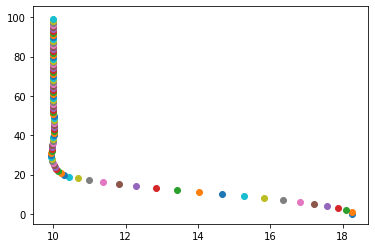

In [381]:
estaminate()

x= 12.617480772168758 fii 124.09092140932515
step0
12.617480772168758 124.09092140932515 7.0
step1
12.061150931876478 120.59745772433564 7.0
step2
11.555941741521028 117.10399403934613 7.0
step3
11.103730804634596 113.61053035435663 7.0
step4
10.70619875741423 110.11706666936712 14.217328372729883
step5
10.372793830848158 103.06332394810252 17.8502957428486
step6
10.157646854217626 94.24710942408612 2.1829295633546058
step7
10.083642418798227 93.15584270082896 1.6220137236782757
step8
10.028612477475205 92.34491708837366 1.3210222805767475
step9
9.987708252329796 91.6844498395029 1.1054908676411266
step10
9.958318762728895 91.13173012801406 0.9393309887510417
step11
9.93857028441837 90.66208041331149 0.7941860471069102
step12
9.927016168502501 90.26499692664699 0.6537333663515578
step13
9.922391417163725 89.93813556259676 0.5121592252630232
step14
9.923471111939481 89.68205850767889 0.3623713976462466
step15
9.929020098348147 89.50087371479188 0.21798698821480908
step16
9.9377313221788

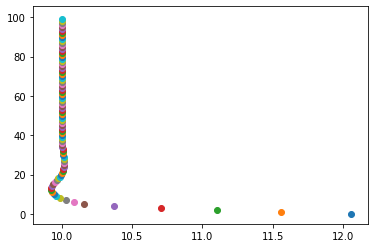

In [382]:
estaminate()

## here we check it with first 3 rows of tabels and do the algorithem again as previous.
### then we test it again with 3 enteries of previous section

In [420]:
array_of_tabels2=[]
for i in range(14):
    a=pd.read_csv('C:\\Users\\mohammad\\Desktop\\fuzzy_project\\'+str(i+1)+'.csv')
    array_of_tabels2.append(a[:3].to_numpy())
array_of_tabels2    

[array([[  1.  ,   0.  , -19.  ],
        [  1.95,   9.37, -17.95],
        [  2.88,  18.23, -16.9 ]]),
 array([[ 1.  , 90.  , 18.  ],
        [ 1.15, 81.11, 16.  ],
        [ 1.43, 73.19, 14.  ]]),
 array([[  1.  , -90.  , -30.  ],
        [  1.22, -75.52, -29.  ],
        [  1.64, -51.49, -28.  ]]),
 array([[  7.  ,   0.  , -40.  ],
        [  7.76,  18.75, -38.5 ],
        [  8.51,  36.88, -37.  ]]),
 array([[ 7.  , 90.  , 12.  ],
        [ 7.1 , 84.03, 10.06],
        [ 7.29, 79.02,  8.12]]),
 array([[  7.  , 180.  ,  40.  ],
        [  6.23, 161.25,  36.8 ],
        [  5.48, 143.82,  33.6 ]]),
 array([[  7.  , -90.  , -40.  ],
        [  7.25, -71.25, -39.  ],
        [  7.73, -52.91, -38.  ]]),
 array([[ 13.  ,   0.  , -40.  ],
        [ 13.77,  18.75, -36.8 ],
        [ 14.52,  36.18, -33.6 ]]),
 array([[ 13.  ,  90.  , -12.  ],
        [ 12.9 ,  95.97, -10.05],
        [ 12.71, 100.97,  -8.1 ]]),
 array([[ 13.  , 180.  ,  40.  ],
        [ 12.23, 161.25,  38.05],
        [ 11.4

In [421]:
for j in range(14):
    print('rules table '+str(j))
    for i in range(len(array_of_tabels2[j])):
        print('rules for x='+str(array_of_tabels2[j][i][0])+' fi='+str(array_of_tabels2[j][i][1])+' then teta='+str(array_of_tabels2[j][i][2]))
        print_rule(rule_maker(array_of_tabels2[j][i][0],array_of_tabels2[j][i][1],array_of_tabels2[j][i][2]))

rules table 0
rules for x=1.0 fi=0.0 then teta=-19.0
Rule 0 : if x is S2 and fi is S3then teta is S3 with D= 0.0
Rule 1 : if x is S2 and fi is S3then teta is S2 with D= 0.0
Rule 2 : if x is S2 and fi is S3then teta is S1 with D= 0.0
Rule 3 : if x is S2 and fi is S3then teta is CE with D= 0.0
Rule 4 : if x is S2 and fi is S3then teta is B1 with D= 0.0
Rule 5 : if x is S2 and fi is S3then teta is B2 with D= 0.0
Rule 6 : if x is S2 and fi is S3then teta is B3 with D= 0.0
Rule 7 : if x is S2 and fi is S2then teta is S3 with D= 0.0
Rule 8 : if x is S2 and fi is S2then teta is S2 with D= 0.9230769230769231
Rule 9 : if x is S2 and fi is S2then teta is S1 with D= 0.0
Rule 10 : if x is S2 and fi is S2then teta is CE with D= 0.0
Rule 11 : if x is S2 and fi is S2then teta is B1 with D= 0.0
Rule 12 : if x is S2 and fi is S2then teta is B2 with D= 0.0
Rule 13 : if x is S2 and fi is S2then teta is B3 with D= 0.0
Rule 14 : if x is S2 and fi is S1then teta is S3 with D= 0.0
Rule 15 : if x is S2 and fi

Rule 87 : if x is S1 and fi is B2then teta is CE with D= 0
Rule 88 : if x is S1 and fi is B2then teta is B1 with D= 0
Rule 89 : if x is S1 and fi is B2then teta is B2 with D= 0
Rule 90 : if x is S1 and fi is B2then teta is B3 with D= 0
Rule 91 : if x is S1 and fi is B3then teta is S3 with D= 0.0
Rule 92 : if x is S1 and fi is B3then teta is S2 with D= 0.0
Rule 93 : if x is S1 and fi is B3then teta is S1 with D= 0
Rule 94 : if x is S1 and fi is B3then teta is CE with D= 0
Rule 95 : if x is S1 and fi is B3then teta is B1 with D= 0
Rule 96 : if x is S1 and fi is B3then teta is B2 with D= 0
Rule 97 : if x is S1 and fi is B3then teta is B3 with D= 0
Rule 98 : if x is CE and fi is S3then teta is S3 with D= 0.0
Rule 99 : if x is CE and fi is S3then teta is S2 with D= 0.0
Rule 100 : if x is CE and fi is S3then teta is S1 with D= 0.0
Rule 101 : if x is CE and fi is S3then teta is CE with D= 0.0
Rule 102 : if x is CE and fi is S3then teta is B1 with D= 0.0
Rule 103 : if x is CE and fi is S3then 

Rule 87 : if x is S1 and fi is B2then teta is CE with D= 0.0
Rule 88 : if x is S1 and fi is B2then teta is B1 with D= 0.0
Rule 89 : if x is S1 and fi is B2then teta is B2 with D= 0.0
Rule 90 : if x is S1 and fi is B2then teta is B3 with D= 0.0
Rule 91 : if x is S1 and fi is B3then teta is S3 with D= 0.0
Rule 92 : if x is S1 and fi is B3then teta is S2 with D= 0.0
Rule 93 : if x is S1 and fi is B3then teta is S1 with D= 0.0
Rule 94 : if x is S1 and fi is B3then teta is CE with D= 0.0
Rule 95 : if x is S1 and fi is B3then teta is B1 with D= 0.0
Rule 96 : if x is S1 and fi is B3then teta is B2 with D= 0.0
Rule 97 : if x is S1 and fi is B3then teta is B3 with D= 0.0
Rule 98 : if x is CE and fi is S3then teta is S3 with D= 0
Rule 99 : if x is CE and fi is S3then teta is S2 with D= 0
Rule 100 : if x is CE and fi is S3then teta is S1 with D= 0
Rule 101 : if x is CE and fi is S3then teta is CE with D= 0
Rule 102 : if x is CE and fi is S3then teta is B1 with D= 0.0
Rule 103 : if x is CE and fi 

Rule 87 : if x is S1 and fi is B2then teta is CE with D= 0.0
Rule 88 : if x is S1 and fi is B2then teta is B1 with D= 0.0
Rule 89 : if x is S1 and fi is B2then teta is B2 with D= 0.0
Rule 90 : if x is S1 and fi is B2then teta is B3 with D= 0.06575146666666676
Rule 91 : if x is S1 and fi is B3then teta is S3 with D= 0.0
Rule 92 : if x is S1 and fi is B3then teta is S2 with D= 0.0
Rule 93 : if x is S1 and fi is B3then teta is S1 with D= 0.0
Rule 94 : if x is S1 and fi is B3then teta is CE with D= 0.0
Rule 95 : if x is S1 and fi is B3then teta is B1 with D= 0.0
Rule 96 : if x is S1 and fi is B3then teta is B2 with D= 0.0
Rule 97 : if x is S1 and fi is B3then teta is B3 with D= 0.0
Rule 98 : if x is CE and fi is S3then teta is S3 with D= 0
Rule 99 : if x is CE and fi is S3then teta is S2 with D= 0
Rule 100 : if x is CE and fi is S3then teta is S1 with D= 0
Rule 101 : if x is CE and fi is S3then teta is CE with D= 0
Rule 102 : if x is CE and fi is S3then teta is B1 with D= 0
Rule 103 : if x

Rule 140 : if x is CE and fi is B3then teta is S3 with D= 0.0
Rule 141 : if x is CE and fi is B3then teta is S2 with D= 0
Rule 142 : if x is CE and fi is B3then teta is S1 with D= 0
Rule 143 : if x is CE and fi is B3then teta is CE with D= 0
Rule 144 : if x is CE and fi is B3then teta is B1 with D= 0
Rule 145 : if x is CE and fi is B3then teta is B2 with D= 0
Rule 146 : if x is CE and fi is B3then teta is B3 with D= 0
Rule 147 : if x is B1 and fi is S3then teta is S3 with D= 0.0
Rule 148 : if x is B1 and fi is S3then teta is S2 with D= 0.0
Rule 149 : if x is B1 and fi is S3then teta is S1 with D= 0.0
Rule 150 : if x is B1 and fi is S3then teta is CE with D= 0.0
Rule 151 : if x is B1 and fi is S3then teta is B1 with D= 0.0
Rule 152 : if x is B1 and fi is S3then teta is B2 with D= 0.0
Rule 153 : if x is B1 and fi is S3then teta is B3 with D= 0.0
Rule 154 : if x is B1 and fi is S2then teta is S3 with D= 0.36423333333333313
Rule 155 : if x is B1 and fi is S2then teta is S2 with D= 0.0
Rule

Rule 4 : if x is S2 and fi is S3then teta is B1 with D= 0
Rule 5 : if x is S2 and fi is S3then teta is B2 with D= 0
Rule 6 : if x is S2 and fi is S3then teta is B3 with D= 0.0
Rule 7 : if x is S2 and fi is S2then teta is S3 with D= 0
Rule 8 : if x is S2 and fi is S2then teta is S2 with D= 0
Rule 9 : if x is S2 and fi is S2then teta is S1 with D= 0
Rule 10 : if x is S2 and fi is S2then teta is CE with D= 0
Rule 11 : if x is S2 and fi is S2then teta is B1 with D= 0
Rule 12 : if x is S2 and fi is S2then teta is B2 with D= 0
Rule 13 : if x is S2 and fi is S2then teta is B3 with D= 0.0
Rule 14 : if x is S2 and fi is S1then teta is S3 with D= 0
Rule 15 : if x is S2 and fi is S1then teta is S2 with D= 0
Rule 16 : if x is S2 and fi is S1then teta is S1 with D= 0
Rule 17 : if x is S2 and fi is S1then teta is CE with D= 0
Rule 18 : if x is S2 and fi is S1then teta is B1 with D= 0
Rule 19 : if x is S2 and fi is S1then teta is B2 with D= 0
Rule 20 : if x is S2 and fi is S1then teta is B3 with D= 0

Rule 224 : if x is B2 and fi is B1then teta is S3 with D= 0
Rule 225 : if x is B2 and fi is B1then teta is S2 with D= 0
Rule 226 : if x is B2 and fi is B1then teta is S1 with D= 0
Rule 227 : if x is B2 and fi is B1then teta is CE with D= 0
Rule 228 : if x is B2 and fi is B1then teta is B1 with D= 0
Rule 229 : if x is B2 and fi is B1then teta is B2 with D= 0
Rule 230 : if x is B2 and fi is B1then teta is B3 with D= 0.0
Rule 231 : if x is B2 and fi is B2then teta is S3 with D= 0
Rule 232 : if x is B2 and fi is B2then teta is S2 with D= 0
Rule 233 : if x is B2 and fi is B2then teta is S1 with D= 0
Rule 234 : if x is B2 and fi is B2then teta is CE with D= 0
Rule 235 : if x is B2 and fi is B2then teta is B1 with D= 0
Rule 236 : if x is B2 and fi is B2then teta is B2 with D= 0
Rule 237 : if x is B2 and fi is B2then teta is B3 with D= 0.0
Rule 238 : if x is B2 and fi is B3then teta is S3 with D= 0.0
Rule 239 : if x is B2 and fi is B3then teta is S2 with D= 0.0
Rule 240 : if x is B2 and fi is 

Rule 61 : if x is S1 and fi is S2then teta is B2 with D= 0.0
Rule 62 : if x is S1 and fi is S2then teta is B3 with D= 0
Rule 63 : if x is S1 and fi is S1then teta is S3 with D= 0
Rule 64 : if x is S1 and fi is S1then teta is S2 with D= 0
Rule 65 : if x is S1 and fi is S1then teta is S1 with D= 0
Rule 66 : if x is S1 and fi is S1then teta is CE with D= 0
Rule 67 : if x is S1 and fi is S1then teta is B1 with D= 0
Rule 68 : if x is S1 and fi is S1then teta is B2 with D= 0.0
Rule 69 : if x is S1 and fi is S1then teta is B3 with D= 0
Rule 70 : if x is S1 and fi is CEthen teta is S3 with D= 0
Rule 71 : if x is S1 and fi is CEthen teta is S2 with D= 0
Rule 72 : if x is S1 and fi is CEthen teta is S1 with D= 0
Rule 73 : if x is S1 and fi is CEthen teta is CE with D= 0
Rule 74 : if x is S1 and fi is CEthen teta is B1 with D= 0
Rule 75 : if x is S1 and fi is CEthen teta is B2 with D= 0.0
Rule 76 : if x is S1 and fi is CEthen teta is B3 with D= 0
Rule 77 : if x is S1 and fi is B1then teta is S3 w

In [422]:
table_winners2=[]
def add_table_winner2(array):
    s=-1
    for i in range(len(table_winners2)):
        if(table_winners2[i][:3]==array[:3]):
            s=i
            break
    if s==-1:
        table_winners2.append(array)
        
    if table_winners2[s][3]<array[3]:
        table_winners2[s][3]=array[3]


In [423]:
for j in range(14):
    for i in range(len(array_of_tabels2[j])):
            print('rules for x='+str(array_of_tabels2[j][i][0])+' fi='+str(array_of_tabels2[j][i][1])+' then teta='+str(array_of_tabels2[j][i][2]))
            rule_step=rule_maker(array_of_tabels2[j][i][0],array_of_tabels2[j][i][1],array_of_tabels2[j][i][2])
            for k in range(len(rule_step)):
                add_table_winner2(rule_step[k])
                print(str(rule_step[k][0])+' '+ str(rule_step[k][1])+' '+ str(rule_step[k][2])+' '+ str(rule_step[k][3]))

rules for x=1.0 fi=0.0 then teta=-19.0
S2 S3 S3 0.0
S2 S3 S2 0.0
S2 S3 S1 0.0
S2 S3 CE 0.0
S2 S3 B1 0.0
S2 S3 B2 0.0
S2 S3 B3 0.0
S2 S2 S3 0.0
S2 S2 S2 0.9230769230769231
S2 S2 S1 0.0
S2 S2 CE 0.0
S2 S2 B1 0.0
S2 S2 B2 0.0
S2 S2 B3 0.0
S2 S1 S3 0.0
S2 S1 S2 0.0
S2 S1 S1 0.0
S2 S1 CE 0.0
S2 S1 B1 0.0
S2 S1 B2 0.0
S2 S1 B3 0.0
S2 CE S3 0.0
S2 CE S2 0.0
S2 CE S1 0.0
S2 CE CE 0.0
S2 CE B1 0.0
S2 CE B2 0.0
S2 CE B3 0.0
S2 B1 S3 0.0
S2 B1 S2 0.0
S2 B1 S1 0.0
S2 B1 CE 0.0
S2 B1 B1 0.0
S2 B1 B2 0.0
S2 B1 B3 0.0
S2 B2 S3 0.0
S2 B2 S2 0.0
S2 B2 S1 0.0
S2 B2 CE 0.0
S2 B2 B1 0.0
S2 B2 B2 0.0
S2 B2 B3 0.0
S2 B3 S3 0.0
S2 B3 S2 0.0
S2 B3 S1 0.0
S2 B3 CE 0.0
S2 B3 B1 0.0
S2 B3 B2 0.0
S2 B3 B3 0.0
S1 S3 S3 0
S1 S3 S2 0.0
S1 S3 S1 0
S1 S3 CE 0
S1 S3 B1 0
S1 S3 B2 0
S1 S3 B3 0
S1 S2 S3 0.0
S1 S2 S2 0.0
S1 S2 S1 0.0
S1 S2 CE 0.0
S1 S2 B1 0.0
S1 S2 B2 0.0
S1 S2 B3 0.0
S1 S1 S3 0
S1 S1 S2 0.0
S1 S1 S1 0
S1 S1 CE 0
S1 S1 B1 0
S1 S1 B2 0
S1 S1 B3 0
S1 CE S3 0
S1 CE S2 0.0
S1 CE S1 0
S1 CE CE 0
S1 CE B1 0
S1 

CE S1 S2 0.0
CE S1 S1 0.0
CE S1 CE 0.0
CE S1 B1 0.0
CE S1 B2 0.0
CE S1 B3 0.0
CE CE S3 0.0
CE CE S2 0.0
CE CE S1 0.0
CE CE CE 0.0
CE CE B1 0.0
CE CE B2 0.0
CE CE B3 0.0
CE B1 S3 0.0
CE B1 S2 0.0
CE B1 S1 0.0
CE B1 CE 0.0
CE B1 B1 0.0
CE B1 B2 0.0
CE B1 B3 0.0
CE B2 S3 0
CE B2 S2 0
CE B2 S1 0
CE B2 CE 0
CE B2 B1 0
CE B2 B2 0.0
CE B2 B3 0
CE B3 S3 0
CE B3 S2 0
CE B3 S1 0
CE B3 CE 0
CE B3 B1 0
CE B3 B2 0.0
CE B3 B3 0
B1 S3 S3 0
B1 S3 S2 0
B1 S3 S1 0
B1 S3 CE 0
B1 S3 B1 0
B1 S3 B2 0.0
B1 S3 B3 0
B1 S2 S3 0
B1 S2 S2 0
B1 S2 S1 0
B1 S2 CE 0
B1 S2 B1 0
B1 S2 B2 0.0
B1 S2 B3 0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0.0
B1 S1 CE 0.0
B1 S1 B1 0.0
B1 S1 B2 0.0
B1 S1 B3 0.0
B1 CE S3 0.0
B1 CE S2 0.0
B1 CE S1 0.0
B1 CE CE 0.0
B1 CE B1 0.0
B1 CE B2 0.0
B1 CE B3 0.0
B1 B1 S3 0.0
B1 B1 S2 0.0
B1 B1 S1 0.0
B1 B1 CE 0.0
B1 B1 B1 0.0
B1 B1 B2 0.0
B1 B1 B3 0.0
B1 B2 S3 0
B1 B2 S2 0
B1 B2 S1 0
B1 B2 CE 0
B1 B2 B1 0
B1 B2 B2 0.0
B1 B2 B3 0
B1 B3 S3 0
B1 B3 S2 0
B1 B3 S1 0
B1 B3 CE 0
B1 B3 B1 0
B1 B3 B2 0.0
B1 B

CE S1 B3 0
CE CE S3 0.0
CE CE S2 0.0
CE CE S1 0
CE CE CE 0
CE CE B1 0
CE CE B2 0
CE CE B3 0
CE B1 S3 0.0
CE B1 S2 0.0
CE B1 S1 0
CE B1 CE 0
CE B1 B1 0
CE B1 B2 0
CE B1 B3 0
CE B2 S3 0.0
CE B2 S2 0.0
CE B2 S1 0
CE B2 CE 0
CE B2 B1 0
CE B2 B2 0
CE B2 B3 0
CE B3 S3 0.0
CE B3 S2 0.0
CE B3 S1 0
CE B3 CE 0
CE B3 B1 0
CE B3 B2 0
CE B3 B3 0
B1 S3 S3 0.0
B1 S3 S2 0.0
B1 S3 S1 0.0
B1 S3 CE 0.0
B1 S3 B1 0.0
B1 S3 B2 0.0
B1 S3 B3 0.0
B1 S2 S3 0.0
B1 S2 S2 0.0
B1 S2 S1 0
B1 S2 CE 0
B1 S2 B1 0
B1 S2 B2 0
B1 S2 B3 0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0
B1 S1 CE 0
B1 S1 B1 0
B1 S1 B2 0
B1 S1 B3 0
B1 CE S3 0.0
B1 CE S2 0.0
B1 CE S1 0
B1 CE CE 0
B1 CE B1 0
B1 CE B2 0
B1 CE B3 0
B1 B1 S3 0.0
B1 B1 S2 0.0
B1 B1 S1 0
B1 B1 CE 0
B1 B1 B1 0
B1 B1 B2 0
B1 B1 B3 0
B1 B2 S3 0.0
B1 B2 S2 0.0
B1 B2 S1 0
B1 B2 CE 0
B1 B2 B1 0
B1 B2 B2 0
B1 B2 B3 0
B1 B3 S3 0.0
B1 B3 S2 0.0
B1 B3 S1 0
B1 B3 CE 0
B1 B3 B1 0
B1 B3 B2 0
B1 B3 B3 0
B2 S3 S3 0.0
B2 S3 S2 0.0
B2 S3 S1 0.0
B2 S3 CE 0.0
B2 S3 B1 0.0
B2 S3 B2 0.0
B2 S3 B3 0

S2 S1 B2 0.0
S2 S1 B3 0.0
S2 CE S3 0.0
S2 CE S2 0
S2 CE S1 0
S2 CE CE 0
S2 CE B1 0
S2 CE B2 0
S2 CE B3 0
S2 B1 S3 0.0
S2 B1 S2 0
S2 B1 S1 0
S2 B1 CE 0
S2 B1 B1 0
S2 B1 B2 0
S2 B1 B3 0
S2 B2 S3 0.0
S2 B2 S2 0
S2 B2 S1 0
S2 B2 CE 0
S2 B2 B1 0
S2 B2 B2 0
S2 B2 B3 0
S2 B3 S3 0.0
S2 B3 S2 0
S2 B3 S1 0
S2 B3 CE 0
S2 B3 B1 0
S2 B3 B2 0
S2 B3 B3 0
S1 S3 S3 0.0
S1 S3 S2 0.0
S1 S3 S1 0.0
S1 S3 CE 0.0
S1 S3 B1 0.0
S1 S3 B2 0.0
S1 S3 B3 0.0
S1 S2 S3 0.07617762962962961
S1 S2 S2 0.0
S1 S2 S1 0.0
S1 S2 CE 0.0
S1 S2 B1 0.0
S1 S2 B2 0.0
S1 S2 B3 0.0
S1 S1 S3 0.24632017777777782
S1 S1 S2 0.0
S1 S1 S1 0.0
S1 S1 CE 0.0
S1 S1 B1 0.0
S1 S1 B2 0.0
S1 S1 B3 0.0
S1 CE S3 0.0
S1 CE S2 0.0
S1 CE S1 0.0
S1 CE CE 0.0
S1 CE B1 0.0
S1 CE B2 0.0
S1 CE B3 0.0
S1 B1 S3 0.0
S1 B1 S2 0.0
S1 B1 S1 0.0
S1 B1 CE 0.0
S1 B1 B1 0.0
S1 B1 B2 0.0
S1 B1 B3 0.0
S1 B2 S3 0.0
S1 B2 S2 0.0
S1 B2 S1 0.0
S1 B2 CE 0.0
S1 B2 B1 0.0
S1 B2 B2 0.0
S1 B2 B3 0.0
S1 B3 S3 0.0
S1 B3 S2 0.0
S1 B3 S1 0.0
S1 B3 CE 0.0
S1 B3 B1 0.0
S1 B3 B2 0.0
S1

CE B1 S2 0
CE B1 S1 0
CE B1 CE 0
CE B1 B1 0
CE B1 B2 0
CE B1 B3 0.0
CE B2 S3 0.0
CE B2 S2 0.0
CE B2 S1 0.0
CE B2 CE 0.0
CE B2 B1 0.0
CE B2 B2 0.0
CE B2 B3 0.0
CE B3 S3 0
CE B3 S2 0
CE B3 S1 0
CE B3 CE 0
CE B3 B1 0
CE B3 B2 0
CE B3 B3 0.0
B1 S3 S3 0
B1 S3 S2 0
B1 S3 S1 0
B1 S3 CE 0
B1 S3 B1 0
B1 S3 B2 0
B1 S3 B3 0.0
B1 S2 S3 0
B1 S2 S2 0
B1 S2 S1 0
B1 S2 CE 0
B1 S2 B1 0
B1 S2 B2 0
B1 S2 B3 0.0
B1 S1 S3 0
B1 S1 S2 0
B1 S1 S1 0
B1 S1 CE 0
B1 S1 B1 0
B1 S1 B2 0
B1 S1 B3 0.0
B1 CE S3 0
B1 CE S2 0
B1 CE S1 0
B1 CE CE 0
B1 CE B1 0
B1 CE B2 0
B1 CE B3 0.0
B1 B1 S3 0
B1 B1 S2 0
B1 B1 S1 0
B1 B1 CE 0
B1 B1 B1 0
B1 B1 B2 0
B1 B1 B3 0.0
B1 B2 S3 0.0
B1 B2 S2 0.0
B1 B2 S1 0.0
B1 B2 CE 0.0
B1 B2 B1 0.0
B1 B2 B2 0.0
B1 B2 B3 0.0
B1 B3 S3 0
B1 B3 S2 0
B1 B3 S1 0
B1 B3 CE 0
B1 B3 B1 0
B1 B3 B2 0
B1 B3 B3 0.0
B2 S3 S3 0
B2 S3 S2 0
B2 S3 S1 0
B2 S3 CE 0
B2 S3 B1 0
B2 S3 B2 0
B2 S3 B3 0.0
B2 S2 S3 0
B2 S2 S2 0
B2 S2 S1 0
B2 S2 CE 0
B2 S2 B1 0
B2 S2 B2 0
B2 S2 B3 0.0
B2 S1 S3 0
B2 S1 S2 0
B2 S1 S1 0
B2 S1 

B2 CE B2 0
B2 CE B3 0
B2 B1 S3 0.0
B2 B1 S2 0
B2 B1 S1 0
B2 B1 CE 0
B2 B1 B1 0
B2 B1 B2 0
B2 B1 B3 0
B2 B2 S3 0.0
B2 B2 S2 0
B2 B2 S1 0
B2 B2 CE 0
B2 B2 B1 0
B2 B2 B2 0
B2 B2 B3 0
B2 B3 S3 0.0
B2 B3 S2 0
B2 B3 S1 0
B2 B3 CE 0
B2 B3 B1 0
B2 B3 B2 0
B2 B3 B3 0
rules for x=7.73 fi=-52.91 then teta=-38.0
S2 S3 S3 0.0
S2 S3 S2 0.0
S2 S3 S1 0.0
S2 S3 CE 0.0
S2 S3 B1 0.0
S2 S3 B2 0.0
S2 S3 B3 0.0
S2 S2 S3 0.0
S2 S2 S2 0
S2 S2 S1 0
S2 S2 CE 0
S2 S2 B1 0
S2 S2 B2 0
S2 S2 B3 0
S2 S1 S3 0.0
S2 S1 S2 0
S2 S1 S1 0
S2 S1 CE 0
S2 S1 B1 0
S2 S1 B2 0
S2 S1 B3 0
S2 CE S3 0.0
S2 CE S2 0
S2 CE S1 0
S2 CE CE 0
S2 CE B1 0
S2 CE B2 0
S2 CE B3 0
S2 B1 S3 0.0
S2 B1 S2 0
S2 B1 S1 0
S2 B1 CE 0
S2 B1 B1 0
S2 B1 B2 0
S2 B1 B3 0
S2 B2 S3 0.0
S2 B2 S2 0
S2 B2 S1 0
S2 B2 CE 0
S2 B2 B1 0
S2 B2 B2 0
S2 B2 B3 0
S2 B3 S3 0.0
S2 B3 S2 0
S2 B3 S1 0
S2 B3 CE 0
S2 B3 B1 0
S2 B3 B2 0
S2 B3 B3 0
S1 S3 S3 0.5163341999999999
S1 S3 S2 0.0
S1 S3 S1 0.0
S1 S3 CE 0.0
S1 S3 B1 0.0
S1 S3 B2 0.0
S1 S3 B3 0.0
S1 S2 S3 0.0
S1 S2 S2 0.0
S

B2 S2 CE 0.0
B2 S2 B1 0.0
B2 S2 B2 0.0
B2 S2 B3 0.0
B2 S1 S3 0.10614132363636368
B2 S1 S2 0.0
B2 S1 S1 0.0
B2 S1 CE 0.0
B2 S1 B1 0.0
B2 S1 B2 0.0
B2 S1 B3 0.0
B2 CE S3 0.0
B2 CE S2 0.0
B2 CE S1 0.0
B2 CE CE 0.0
B2 CE B1 0.0
B2 CE B2 0.0
B2 CE B3 0.0
B2 B1 S3 0.0
B2 B1 S2 0.0
B2 B1 S1 0.0
B2 B1 CE 0.0
B2 B1 B1 0.0
B2 B1 B2 0.0
B2 B1 B3 0.0
B2 B2 S3 0.0
B2 B2 S2 0.0
B2 B2 S1 0.0
B2 B2 CE 0.0
B2 B2 B1 0.0
B2 B2 B2 0.0
B2 B2 B3 0.0
B2 B3 S3 0.0
B2 B3 S2 0.0
B2 B3 S1 0.0
B2 B3 CE 0.0
B2 B3 B1 0.0
B2 B3 B2 0.0
B2 B3 B3 0.0
rules for x=13.0 fi=90.0 then teta=-12.0
S2 S3 S3 0
S2 S3 S2 0.0
S2 S3 S1 0.0
S2 S3 CE 0
S2 S3 B1 0
S2 S3 B2 0
S2 S3 B3 0
S2 S2 S3 0
S2 S2 S2 0.0
S2 S2 S1 0.0
S2 S2 CE 0
S2 S2 B1 0
S2 S2 B2 0
S2 S2 B3 0
S2 S1 S3 0.0
S2 S1 S2 0.0
S2 S1 S1 0.0
S2 S1 CE 0.0
S2 S1 B1 0.0
S2 S1 B2 0.0
S2 S1 B3 0.0
S2 CE S3 0.0
S2 CE S2 0.0
S2 CE S1 0.0
S2 CE CE 0.0
S2 CE B1 0.0
S2 CE B2 0.0
S2 CE B3 0.0
S2 B1 S3 0.0
S2 B1 S2 0.0
S2 B1 S1 0.0
S2 B1 CE 0.0
S2 B1 B1 0.0
S2 B1 B2 0.0
S2 B1 B3 0.0
S

B2 B1 CE 0.0
B2 B1 B1 0.0
B2 B1 B2 0.0
B2 B1 B3 0.0
B2 B2 S3 0.0
B2 B2 S2 0.0
B2 B2 S1 0.0
B2 B2 CE 0.0
B2 B2 B1 0.0
B2 B2 B2 0.0
B2 B2 B3 0.0
B2 B3 S3 0.0
B2 B3 S2 0.0
B2 B3 S1 0.0
B2 B3 CE 0.0
B2 B3 B1 0.0
B2 B3 B2 0.0
B2 B3 B3 0.0
rules for x=12.23 fi=161.25 then teta=38.05
S2 S3 S3 0
S2 S3 S2 0
S2 S3 S1 0
S2 S3 CE 0
S2 S3 B1 0
S2 S3 B2 0
S2 S3 B3 0.0
S2 S2 S3 0
S2 S2 S2 0
S2 S2 S1 0
S2 S2 CE 0
S2 S2 B1 0
S2 S2 B2 0
S2 S2 B3 0.0
S2 S1 S3 0
S2 S1 S2 0
S2 S1 S1 0
S2 S1 CE 0
S2 S1 B1 0
S2 S1 B2 0
S2 S1 B3 0.0
S2 CE S3 0
S2 CE S2 0
S2 CE S1 0
S2 CE CE 0
S2 CE B1 0
S2 CE B2 0
S2 CE B3 0.0
S2 B1 S3 0.0
S2 B1 S2 0.0
S2 B1 S1 0.0
S2 B1 CE 0.0
S2 B1 B1 0.0
S2 B1 B2 0.0
S2 B1 B3 0.0
S2 B2 S3 0.0
S2 B2 S2 0.0
S2 B2 S1 0.0
S2 B2 CE 0.0
S2 B2 B1 0.0
S2 B2 B2 0.0
S2 B2 B3 0.0
S2 B3 S3 0
S2 B3 S2 0
S2 B3 S1 0
S2 B3 CE 0
S2 B3 B1 0
S2 B3 B2 0
S2 B3 B3 0.0
S1 S3 S3 0
S1 S3 S2 0
S1 S3 S1 0
S1 S3 CE 0
S1 S3 B1 0
S1 S3 B2 0
S1 S3 B3 0.0
S1 S2 S3 0
S1 S2 S2 0
S1 S2 S1 0
S1 S2 CE 0
S1 S2 B1 0
S1 S2 B2 0


S2 CE S2 0
S2 CE S1 0
S2 CE CE 0
S2 CE B1 0
S2 CE B2 0
S2 CE B3 0.0
S2 B1 S3 0
S2 B1 S2 0
S2 B1 S1 0
S2 B1 CE 0
S2 B1 B1 0
S2 B1 B2 0
S2 B1 B3 0.0
S2 B2 S3 0
S2 B2 S2 0
S2 B2 S1 0
S2 B2 CE 0
S2 B2 B1 0
S2 B2 B2 0
S2 B2 B3 0.0
S2 B3 S3 0.0
S2 B3 S2 0.0
S2 B3 S1 0.0
S2 B3 CE 0.0
S2 B3 B1 0.0
S2 B3 B2 0.0
S2 B3 B3 0.0
S1 S3 S3 0
S1 S3 S2 0
S1 S3 S1 0
S1 S3 CE 0
S1 S3 B1 0
S1 S3 B2 0
S1 S3 B3 0.0
S1 S2 S3 0
S1 S2 S2 0
S1 S2 S1 0
S1 S2 CE 0
S1 S2 B1 0
S1 S2 B2 0
S1 S2 B3 0.0
S1 S1 S3 0
S1 S1 S2 0
S1 S1 S1 0
S1 S1 CE 0
S1 S1 B1 0
S1 S1 B2 0
S1 S1 B3 0.0
S1 CE S3 0
S1 CE S2 0
S1 CE S1 0
S1 CE CE 0
S1 CE B1 0
S1 CE B2 0
S1 CE B3 0.0
S1 B1 S3 0
S1 B1 S2 0
S1 B1 S1 0
S1 B1 CE 0
S1 B1 B1 0
S1 B1 B2 0
S1 B1 B3 0.0
S1 B2 S3 0
S1 B2 S2 0
S1 B2 S1 0
S1 B2 CE 0
S1 B2 B1 0
S1 B2 B2 0
S1 B2 B3 0.0
S1 B3 S3 0.0
S1 B3 S2 0.0
S1 B3 S1 0.0
S1 B3 CE 0.0
S1 B3 B1 0.0
S1 B3 B2 0.0
S1 B3 B3 0.0
CE S3 S3 0
CE S3 S2 0
CE S3 S1 0
CE S3 CE 0
CE S3 B1 0
CE S3 B2 0
CE S3 B3 0.0
CE S2 S3 0
CE S2 S2 0
CE S2 S1 0
CE S2 

B1 S1 S3 0
B1 S1 S2 0
B1 S1 S1 0
B1 S1 CE 0
B1 S1 B1 0
B1 S1 B2 0.0
B1 S1 B3 0
B1 CE S3 0
B1 CE S2 0
B1 CE S1 0
B1 CE CE 0
B1 CE B1 0
B1 CE B2 0.0
B1 CE B3 0
B1 B1 S3 0
B1 B1 S2 0
B1 B1 S1 0
B1 B1 CE 0
B1 B1 B1 0
B1 B1 B2 0.0
B1 B1 B3 0
B1 B2 S3 0.0
B1 B2 S2 0.0
B1 B2 S1 0.0
B1 B2 CE 0.0
B1 B2 B1 0.0
B1 B2 B2 0.0
B1 B2 B3 0.0
B1 B3 S3 0
B1 B3 S2 0
B1 B3 S1 0
B1 B3 CE 0
B1 B3 B1 0
B1 B3 B2 0.0
B1 B3 B3 0
B2 S3 S3 0.0
B2 S3 S2 0.0
B2 S3 S1 0.0
B2 S3 CE 0.0
B2 S3 B1 0.0
B2 S3 B2 0.0
B2 S3 B3 0.0
B2 S2 S3 0.0
B2 S2 S2 0.0
B2 S2 S1 0.0
B2 S2 CE 0.0
B2 S2 B1 0.0
B2 S2 B2 0.0
B2 S2 B3 0.0
B2 S1 S3 0.0
B2 S1 S2 0.0
B2 S1 S1 0.0
B2 S1 CE 0.0
B2 S1 B1 0.0
B2 S1 B2 0.0
B2 S1 B3 0.0
B2 CE S3 0.0
B2 CE S2 0.0
B2 CE S1 0.0
B2 CE CE 0.0
B2 CE B1 0.0
B2 CE B2 0.0
B2 CE B3 0.0
B2 B1 S3 0.0
B2 B1 S2 0.0
B2 B1 S1 0.0
B2 B1 CE 0.0
B2 B1 B1 0.0
B2 B1 B2 0.0
B2 B1 B3 0.0
B2 B2 S3 0.0
B2 B2 S2 0.0
B2 B2 S1 0.0
B2 B2 CE 0.0
B2 B2 B1 0.0
B2 B2 B2 0.9230769230769231
B2 B2 B3 0.0
B2 B3 S3 0.0
B2 B3 S2 0.0
B2 B3 

B1 B1 B3 0.0
B1 B2 S3 0
B1 B2 S2 0
B1 B2 S1 0
B1 B2 CE 0
B1 B2 B1 0
B1 B2 B2 0.0
B1 B2 B3 0.0
B1 B3 S3 0.0
B1 B3 S2 0.0
B1 B3 S1 0.0
B1 B3 CE 0.0
B1 B3 B1 0.0
B1 B3 B2 0.0
B1 B3 B3 0.0
B2 S3 S3 0.0
B2 S3 S2 0.0
B2 S3 S1 0.0
B2 S3 CE 0.0
B2 S3 B1 0.0
B2 S3 B2 0.0
B2 S3 B3 0.0
B2 S2 S3 0.0
B2 S2 S2 0.0
B2 S2 S1 0.0
B2 S2 CE 0.0
B2 S2 B1 0.0
B2 S2 B2 0.0
B2 S2 B3 0.0
B2 S1 S3 0.0
B2 S1 S2 0.0
B2 S1 S1 0.0
B2 S1 CE 0.0
B2 S1 B1 0.0
B2 S1 B2 0.0
B2 S1 B3 0.0
B2 CE S3 0.0
B2 CE S2 0.0
B2 CE S1 0.0
B2 CE CE 0.0
B2 CE B1 0.0
B2 CE B2 0.0
B2 CE B3 0.0
B2 B1 S3 0.0
B2 B1 S2 0.0
B2 B1 S1 0.0
B2 B1 CE 0.0
B2 B1 B1 0.0
B2 B1 B2 0.0
B2 B1 B3 0.0
B2 B2 S3 0.0
B2 B2 S2 0.0
B2 B2 S1 0.0
B2 B2 CE 0.0
B2 B2 B1 0.0
B2 B2 B2 0.0
B2 B2 B3 0.0
B2 B3 S3 0.0
B2 B3 S2 0.0
B2 B3 S1 0.0
B2 B3 CE 0.0
B2 B3 B1 0.0
B2 B3 B2 0.24289230769230805
B2 B3 B3 0.3552300000000004
rules for x=18.36 fi=241.5 then teta=28.0
S2 S3 S3 0
S2 S3 S2 0
S2 S3 S1 0
S2 S3 CE 0
S2 S3 B1 0
S2 S3 B2 0.0
S2 S3 B3 0.0
S2 S2 S3 0
S2 S2 S2 0
S2

In [424]:
for k in range(len(table_winners2)):
    print(str(table_winners2[k][0])+' '+ str(table_winners2[k][1])+' '+ str(table_winners2[k][2])+' '+ str(table_winners2[k][3]))

S2 S3 S3 0.3553200000000003
S2 S3 S2 0.2735474125874126
S2 S3 S1 0.0
S2 S3 CE 0.0
S2 S3 B1 0.0
S2 S3 B2 0.0
S2 S3 B3 0.0
S2 S2 S3 0.0
S2 S2 S2 0.9230769230769231
S2 S2 S1 0.0
S2 S2 CE 0.0
S2 S2 B1 0.0
S2 S2 B2 0.0
S2 S2 B3 0.0
S2 S1 S3 0.0
S2 S1 S2 0.04913575384615384
S2 S1 S1 0.0
S2 S1 CE 0.0
S2 S1 B1 0.0
S2 S1 B2 0.24137435897435922
S2 S1 B3 0.0
S2 CE S3 0.0
S2 CE S2 0.0
S2 CE S1 0.0
S2 CE CE 0.0
S2 CE B1 0.0
S2 CE B2 0.846153846153846
S2 CE B3 0.0
S2 B1 S3 0.0
S2 B1 S2 0.0
S2 B1 S1 0.0
S2 B1 CE 0.0
S2 B1 B1 0.0
S2 B1 B2 0.0
S2 B1 B3 0.10614132363636371
S2 B2 S3 0.0
S2 B2 S2 0.0
S2 B2 S1 0.0
S2 B2 CE 0.0
S2 B2 B1 0.0
S2 B2 B2 0.0
S2 B2 B3 0.06859999999999995
S2 B3 S3 0.0
S2 B3 S2 0.0
S2 B3 S1 0.0
S2 B3 CE 0.0
S2 B3 B1 0.0
S2 B3 B2 0.0
S2 B3 B3 0.0
S1 S3 S3 0.7619791666666669
S1 S3 S2 0.0
S1 S3 S1 0
S1 S3 CE 0
S1 S3 B1 0
S1 S3 B2 0
S1 S3 B3 0
S1 S2 S3 0.9999999999999998
S1 S2 S2 0.0
S1 S2 S1 0.0
S1 S2 CE 0.0
S1 S2 B1 0.0
S1 S2 B2 0.0
S1 S2 B3 0.0
S1 S1 S3 0.24632017777777782
S1 S1 S2 

In [425]:
print(len(table_winners2))
arr_del2=[]
for i in range(len(table_winners2)):
    for j in range(i+1,len(table_winners2)):
        if table_winners2[i][0]==table_winners2[j][0] and table_winners2[i][1]==table_winners2[j][1]:
            if table_winners2[i][3]>table_winners2[j][3]:
                arr_del2.append(j)
            else:
                arr_del2.append(i)
    
# test_list2=[1,2,2,2,4,4]
# test_list2.remove(3)
# test_list2
print(len(arr_del2))
for i in range(len(arr_del2)):
    for j in range(i+1,len(arr_del2)):
        if arr_del2[i]>arr_del2[j]:
            temp2=arr_del2[i]
            arr_del2[i]=arr_del2[j]
            arr_del2[j]=temp2
a2=arr_del2.reverse()
print(arr_del2)
stack2=245
for i in range(len(arr_del2)):
    if stack2 != arr_del2[i]:
        print(stack2,arr_del2[i])
        table_winners2.pop(arr_del2[i])
        stack2 = arr_del2[i]
print(len(table_winners2))

245
735
[243, 242, 242, 241, 241, 241, 240, 240, 240, 240, 239, 239, 239, 239, 239, 238, 238, 238, 238, 238, 238, 237, 235, 235, 234, 234, 234, 233, 233, 233, 233, 232, 232, 232, 232, 232, 231, 231, 231, 231, 231, 231, 230, 230, 229, 228, 228, 228, 227, 227, 227, 227, 226, 226, 226, 226, 226, 224, 224, 224, 224, 224, 224, 223, 222, 222, 221, 221, 221, 220, 220, 220, 220, 219, 219, 219, 219, 219, 217, 217, 217, 217, 217, 217, 216, 215, 215, 214, 214, 214, 213, 213, 213, 213, 212, 212, 212, 212, 212, 211, 211, 211, 211, 211, 211, 209, 208, 208, 207, 207, 207, 206, 206, 206, 206, 205, 205, 205, 205, 205, 204, 204, 204, 204, 204, 204, 201, 200, 200, 199, 199, 199, 198, 198, 198, 198, 197, 197, 197, 197, 197, 196, 196, 196, 196, 196, 196, 194, 193, 193, 192, 192, 192, 191, 191, 191, 191, 190, 190, 190, 190, 190, 189, 189, 189, 189, 189, 189, 187, 186, 186, 185, 185, 185, 184, 184, 184, 184, 183, 183, 183, 183, 183, 182, 182, 182, 182, 182, 182, 180, 180, 180, 179, 179, 179, 179, 178, 178, 1

In [426]:
len(table_winners2)
dele2=[]
for i in range(len(table_winners2)):
    if table_winners2[i][3]==0 :
        dele2.append(i)
dele2.reverse() 
dele2
for i in range(len(dele2)):
    table_winners2.pop(dele2[i])
    
for k in range(len(table_winners2)):
    print(k)
    print(str(table_winners2[k][0])+' '+ str(table_winners2[k][1])+' '+ str(table_winners2[k][2])+' '+ str(table_winners2[k][3]))

0
S2 S3 S3 0.3553200000000003
1
S2 S2 S2 0.9230769230769231
2
S2 S1 B2 0.24137435897435922
3
S2 CE B2 0.846153846153846
4
S2 B1 B3 0.10614132363636371
5
S2 B2 B3 0.06859999999999995
6
S1 S3 S3 0.7619791666666669
7
S1 S2 S3 0.9999999999999998
8
S1 S1 S3 0.24632017777777782
9
S1 CE B2 0.38461538461538447
10
S1 B1 B3 0.18947157333333356
11
S1 B2 B3 0.9999999999999998
12
B1 S2 S3 1.0
13
B1 S1 S3 0.18947157333333337
14
B1 CE S2 0.3846153846153846
15
B1 B1 B3 0.24643275555555563
16
B1 B2 B3 1.0
17
B1 B3 B3 0.7618050000000008
18
B2 S2 S3 0.06859999999999983
19
B2 S1 S3 0.10614132363636368
20
B2 CE S2 0.846153846153846
21
B2 B1 S2 0.24137435897435897
22
B2 B2 B2 0.9230769230769231
23
B2 B3 B3 0.3625309090909093


In [427]:
table_winners2

[[<__main__.membership_func at 0x188a8c4d488>,
  0.3553200000000003],
  0.9230769230769231],
  0.5943073246753248],
  0.846153846153846],
  0.20655786666666665],
  0.06859999999999995],
  0.7619791666666669],
  0.9999999999999998],
  0.606559238095238],
  0.38461538461538447],
  0.3626304],
  0.9999999999999998],
  0.005928000000000014],
  0.7213566666666671],
  0.42622170256410286],
  0.9207],
  0.4946953846153841],
  0.721356666666667],
  0.005928000000000055],
  1.0],
  0.36263039999999985],
  0.3846153846153846],
  0.6090971428571429],
  1.0],
  0.7618050000000008],
  0.06859999999999983],
  0.20655786666666667],
  0.846153846153846],
  0.5957498181818177],
  0.9230769230769231],
  0.3625309090909093]]

In [389]:
def mo2(x,fi,i):
#     print(i)
#     print(table_winners2[i][0].cumpute(x))
#     print(table_winners2[i][1].cumpute(fi))
    
    return table_winners2[i][0].cumpute(x)*table_winners2[i][1].cumpute(fi)
    

def S10taj2(x,fi):
    s=0
    stop=0
    for i in range(len(table_winners2)):
#         print(mo(x,fi,i))
        s=s+table_winners2[i][2].center()*mo2(x,fi,i)
    m=0
    for i in range(len(table_winners2)):   
        m=m+mo2(x,fi,i)
    if m==0:
        stop=1
        return [0,stop]
    return [s/m,stop]

### test #1
x= 3.2386117418064586 fii -31.328668185970272

x= 3.2386117418064586 fii -31.328668185970272
step0
3.2386117418064586 -31.328668185970272 -23.412633514496722
step1
4.022481802056309 -19.869173764045435 -21.39657525722338
step2
4.898133419467245 -9.358973725584693 -24.39269656670602
step3
5.796746789757939 2.5580066873870084 -27.32449212731132
step4
6.684282615006562 15.826507552612505 -26.81322552254238
step5
7.54293206723247 28.861246460884644 -8.087056831313431
step6
8.410013936174407 32.89469291294464 -5.587368748293586
step7
9.245694742749336 35.68505440862166 -4.224274788272632
step8
10.05572390537319 37.795756185594016 -30.0
step9
10.74005753220635 52.27326837152394 -30.0
step10
11.26997511907764 66.75078055745387 -30.0
step11
11.61182248665194 81.22829274338379 -21.547928810907326
step12
11.753662342774694 91.81012722526329 -12.322209130202031
step13
11.722802599833026 97.9355089631122 -4.7142326846848
step14
11.585211264905372 100.29062980727092 0.9999999999999998
step15
11.406597165378038 99.79064884622211 0.26420790612418

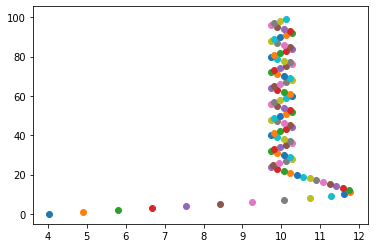

In [390]:
xxx= 3.2386117418064586
fii= -31.328668185970272
print("x=",xxx,"fii",fii)
for i in range(100):
    teta,stop=S10taj2(xxx,fii)
    print('step'+ str(i))
    print(xxx,fii,teta)
    if stop==1:
        print("truck reached a black area ")
        break
    xxx=new_x(xxx,fii,teta)
    fii=new_fi(fii,teta)
    plt.scatter(xxx, i, marker='o');

### test #2
x= 7.925836881489863 fii 163.79513493132447

x= 7.925836881489863 fii 163.79513493132447
step0
7.925836881489863 163.79513493132447 30.0
step1
7.09421867334478 149.31762274539454 30.000000000000007
step2
6.349428805720809 134.84011055946462 30.0
step3
5.73876763700006 120.3625983735347 30.000000000000004
step4
5.301017236308521 105.88508618760477 29.999999999999996
step5
5.063978399192294 91.40757400167485 16.06125155427351
step6
5.040372901728357 83.45621233509667 8.250411418439263
step7
5.153155937322805 79.34171250579845 -0.6319578242176382
step8
5.338095891214644 79.65768661280828 -0.6888791725702937
step9
5.51761168843767 80.00211997511842 -0.7301738431727707
step10
5.691209329788994 80.36719948500237 0.49312819587024015
step11
5.858536311579772 80.1206376701217 -0.3857157048288169
step12
6.030106681117515 80.31349442999459 0.23959627041303067
step13
6.198362429775092 80.19369655665183 -0.1981164738026146
step14
6.36867932020626 80.29275464550707 0.10821466816599111
step15
6.537293045103604 80.23864733555052 -0.1009108196365

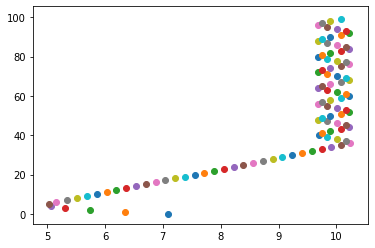

In [391]:
xxx=7.925836881489863
fii=163.79513493132447
print("x=",xxx,"fii",fii)
for i in range(100):
    teta,stop=S10taj2(xxx,fii)
    print('step'+ str(i))
    print(xxx,fii,teta)
    if stop==1:
        print("truck reached a black area ")
        break
    xxx=new_x(xxx,fii,teta)
    fii=new_fi(fii,teta)
    plt.scatter(xxx, i, marker='o');

### test #3
x= 4.705146106924842 fii 67.16141085849964

x= 4.705146106924842 fii 67.16141085849964
step0
4.705146106924842 67.16141085849964 -0.4579946125115012
step1
5.093270087087976 67.390406335739 -0.6119186839661962
step2
5.477698062214882 67.69636131538734 -0.7274776808091552
step3
5.857182387760074 68.06009282589024 -0.8171512059168042
step4
6.2307783298249655 68.46865804047525 -0.8885809621376867
step5
6.597744323563981 68.9129351638254 -0.9466932316061767
step6
6.957481386906091 69.38626562600415 -0.9947993232939242
step7
7.309494342985464 69.88364654420775 -0.9999999999999997
step8
7.653369679540604 70.38362750525656 -0.999999999999998
step9
7.989039300323637 70.88360846630536 -1.0000000000000004
step10
8.316477644740031 71.38358942735417 -0.9999999999999991
step11
8.635659778991078 71.88357038840297 -0.9999999999999997
step12
8.94656139797256 72.38355134945178 -0.9999999999999999
step13
9.249158827125536 72.88353231050058 -1.0000000000000002
step14
9.543429024239105 73.38351327154939 -0.9999999999999992
step15
9.82934958120504 73

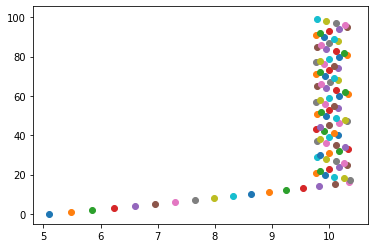

In [392]:
xxx= 4.705146106924842
fii=67.16141085849964
print("x=",xxx,"fii",fii)
for i in range(100):
    teta,stop=S10taj2(xxx,fii)
    print('step'+ str(i))
    print(xxx,fii,teta)
    if stop==1:
        print("truck reached a black area ")
        break
    xxx=new_x(xxx,fii,teta)
    fii=new_fi(fii,teta)
    plt.scatter(xxx, i, marker='o');

## as we see here the number of black areas extended and the possibility of dead end increased
### we have 33 rules remained none zero
### as we have more rules we have higher chance to park the truck correctly 
### if we compare these 3 examples and previous 3 examples graphs we can notice the low accuracy that these 3 examples have.

In [393]:
print(len(dele2))

211


In [428]:
array_of_tabels3=[]
for i in range(14):
    a=pd.read_csv('C:\\Users\\mohammad\\Desktop\\fuzzy_project\\'+str(i+1)+'.csv')
    array_of_tabels3.append(a[:3].to_numpy())
array_of_tabels3    

[array([[  1.  ,   0.  , -19.  ],
        [  1.95,   9.37, -17.95],
        [  2.88,  18.23, -16.9 ]]),
 array([[ 1.  , 90.  , 18.  ],
        [ 1.15, 81.11, 16.  ],
        [ 1.43, 73.19, 14.  ]]),
 array([[  1.  , -90.  , -30.  ],
        [  1.22, -75.52, -29.  ],
        [  1.64, -51.49, -28.  ]]),
 array([[  7.  ,   0.  , -40.  ],
        [  7.76,  18.75, -38.5 ],
        [  8.51,  36.88, -37.  ]]),
 array([[ 7.  , 90.  , 12.  ],
        [ 7.1 , 84.03, 10.06],
        [ 7.29, 79.02,  8.12]]),
 array([[  7.  , 180.  ,  40.  ],
        [  6.23, 161.25,  36.8 ],
        [  5.48, 143.82,  33.6 ]]),
 array([[  7.  , -90.  , -40.  ],
        [  7.25, -71.25, -39.  ],
        [  7.73, -52.91, -38.  ]]),
 array([[ 13.  ,   0.  , -40.  ],
        [ 13.77,  18.75, -36.8 ],
        [ 14.52,  36.18, -33.6 ]]),
 array([[ 13.  ,  90.  , -12.  ],
        [ 12.9 ,  95.97, -10.05],
        [ 12.71, 100.97,  -8.1 ]]),
 array([[ 13.  , 180.  ,  40.  ],
        [ 12.23, 161.25,  38.05],
        [ 11.4

In [429]:
for j in range(14):
    print('rules table '+str(j))
    for i in range(len(array_of_tabels3[j])):
        print('rules for x='+str(array_of_tabels3[j][i][0])+' fi='+str(array_of_tabels3[j][i][1])+' then teta='+str(array_of_tabels3[j][i][2]))
        print_rule(rule_maker(array_of_tabels3[j][i][0],array_of_tabels3[j][i][1],array_of_tabels3[j][i][2]))

rules table 0
rules for x=1.0 fi=0.0 then teta=-19.0
Rule 0 : if x is S2 and fi is S3then teta is S3 with D= 0.0
Rule 1 : if x is S2 and fi is S3then teta is S2 with D= 0.0
Rule 2 : if x is S2 and fi is S3then teta is S1 with D= 0.0
Rule 3 : if x is S2 and fi is S3then teta is CE with D= 0.0
Rule 4 : if x is S2 and fi is S3then teta is B1 with D= 0.0
Rule 5 : if x is S2 and fi is S3then teta is B2 with D= 0.0
Rule 6 : if x is S2 and fi is S3then teta is B3 with D= 0.0
Rule 7 : if x is S2 and fi is S2then teta is S3 with D= 0.0
Rule 8 : if x is S2 and fi is S2then teta is S2 with D= 0.9230769230769231
Rule 9 : if x is S2 and fi is S2then teta is S1 with D= 0.0
Rule 10 : if x is S2 and fi is S2then teta is CE with D= 0.0
Rule 11 : if x is S2 and fi is S2then teta is B1 with D= 0.0
Rule 12 : if x is S2 and fi is S2then teta is B2 with D= 0.0
Rule 13 : if x is S2 and fi is S2then teta is B3 with D= 0.0
Rule 14 : if x is S2 and fi is S1then teta is S3 with D= 0.0
Rule 15 : if x is S2 and fi

Rule 53 : if x is S1 and fi is S3then teta is B1 with D= 0.0
Rule 54 : if x is S1 and fi is S3then teta is B2 with D= 0.0
Rule 55 : if x is S1 and fi is S3then teta is B3 with D= 0.0
Rule 56 : if x is S1 and fi is S2then teta is S3 with D= 0.0
Rule 57 : if x is S1 and fi is S2then teta is S2 with D= 0.0
Rule 58 : if x is S1 and fi is S2then teta is S1 with D= 0
Rule 59 : if x is S1 and fi is S2then teta is CE with D= 0
Rule 60 : if x is S1 and fi is S2then teta is B1 with D= 0
Rule 61 : if x is S1 and fi is S2then teta is B2 with D= 0
Rule 62 : if x is S1 and fi is S2then teta is B3 with D= 0
Rule 63 : if x is S1 and fi is S1then teta is S3 with D= 0.0
Rule 64 : if x is S1 and fi is S1then teta is S2 with D= 0.0
Rule 65 : if x is S1 and fi is S1then teta is S1 with D= 0
Rule 66 : if x is S1 and fi is S1then teta is CE with D= 0
Rule 67 : if x is S1 and fi is S1then teta is B1 with D= 0
Rule 68 : if x is S1 and fi is S1then teta is B2 with D= 0
Rule 69 : if x is S1 and fi is S1then teta

Rule 131 : if x is CE and fi is B1then teta is B2 with D= 0.0
Rule 132 : if x is CE and fi is B1then teta is B3 with D= 0
Rule 133 : if x is CE and fi is B2then teta is S3 with D= 0
Rule 134 : if x is CE and fi is B2then teta is S2 with D= 0
Rule 135 : if x is CE and fi is B2then teta is S1 with D= 0
Rule 136 : if x is CE and fi is B2then teta is CE with D= 0
Rule 137 : if x is CE and fi is B2then teta is B1 with D= 0.0
Rule 138 : if x is CE and fi is B2then teta is B2 with D= 0.0
Rule 139 : if x is CE and fi is B2then teta is B3 with D= 0
Rule 140 : if x is CE and fi is B3then teta is S3 with D= 0
Rule 141 : if x is CE and fi is B3then teta is S2 with D= 0
Rule 142 : if x is CE and fi is B3then teta is S1 with D= 0
Rule 143 : if x is CE and fi is B3then teta is CE with D= 0
Rule 144 : if x is CE and fi is B3then teta is B1 with D= 0.0
Rule 145 : if x is CE and fi is B3then teta is B2 with D= 0.0
Rule 146 : if x is CE and fi is B3then teta is B3 with D= 0
Rule 147 : if x is B1 and fi i

Rule 139 : if x is CE and fi is B2then teta is B3 with D= 0
Rule 140 : if x is CE and fi is B3then teta is S3 with D= 0.0
Rule 141 : if x is CE and fi is B3then teta is S2 with D= 0
Rule 142 : if x is CE and fi is B3then teta is S1 with D= 0
Rule 143 : if x is CE and fi is B3then teta is CE with D= 0
Rule 144 : if x is CE and fi is B3then teta is B1 with D= 0
Rule 145 : if x is CE and fi is B3then teta is B2 with D= 0
Rule 146 : if x is CE and fi is B3then teta is B3 with D= 0
Rule 147 : if x is B1 and fi is S3then teta is S3 with D= 0.0
Rule 148 : if x is B1 and fi is S3then teta is S2 with D= 0.0
Rule 149 : if x is B1 and fi is S3then teta is S1 with D= 0.0
Rule 150 : if x is B1 and fi is S3then teta is CE with D= 0.0
Rule 151 : if x is B1 and fi is S3then teta is B1 with D= 0.0
Rule 152 : if x is B1 and fi is S3then teta is B2 with D= 0.0
Rule 153 : if x is B1 and fi is S3then teta is B3 with D= 0.0
Rule 154 : if x is B1 and fi is S2then teta is S3 with D= 0.0
Rule 155 : if x is B1 

Rule 76 : if x is S1 and fi is CEthen teta is B3 with D= 0.0
Rule 77 : if x is S1 and fi is B1then teta is S3 with D= 0.0
Rule 78 : if x is S1 and fi is B1then teta is S2 with D= 0.0
Rule 79 : if x is S1 and fi is B1then teta is S1 with D= 0.0
Rule 80 : if x is S1 and fi is B1then teta is CE with D= 0.0
Rule 81 : if x is S1 and fi is B1then teta is B1 with D= 0.0
Rule 82 : if x is S1 and fi is B1then teta is B2 with D= 0.0
Rule 83 : if x is S1 and fi is B1then teta is B3 with D= 0.0
Rule 84 : if x is S1 and fi is B2then teta is S3 with D= 0
Rule 85 : if x is S1 and fi is B2then teta is S2 with D= 0.0
Rule 86 : if x is S1 and fi is B2then teta is S1 with D= 0.0
Rule 87 : if x is S1 and fi is B2then teta is CE with D= 0
Rule 88 : if x is S1 and fi is B2then teta is B1 with D= 0
Rule 89 : if x is S1 and fi is B2then teta is B2 with D= 0
Rule 90 : if x is S1 and fi is B2then teta is B3 with D= 0
Rule 91 : if x is S1 and fi is B3then teta is S3 with D= 0
Rule 92 : if x is S1 and fi is B3the

Rule 78 : if x is S1 and fi is B1then teta is S2 with D= 0
Rule 79 : if x is S1 and fi is B1then teta is S1 with D= 0
Rule 80 : if x is S1 and fi is B1then teta is CE with D= 0
Rule 81 : if x is S1 and fi is B1then teta is B1 with D= 0
Rule 82 : if x is S1 and fi is B1then teta is B2 with D= 0
Rule 83 : if x is S1 and fi is B1then teta is B3 with D= 0.0
Rule 84 : if x is S1 and fi is B2then teta is S3 with D= 0
Rule 85 : if x is S1 and fi is B2then teta is S2 with D= 0
Rule 86 : if x is S1 and fi is B2then teta is S1 with D= 0
Rule 87 : if x is S1 and fi is B2then teta is CE with D= 0
Rule 88 : if x is S1 and fi is B2then teta is B1 with D= 0
Rule 89 : if x is S1 and fi is B2then teta is B2 with D= 0
Rule 90 : if x is S1 and fi is B2then teta is B3 with D= 0.0
Rule 91 : if x is S1 and fi is B3then teta is S3 with D= 0.0
Rule 92 : if x is S1 and fi is B3then teta is S2 with D= 0.0
Rule 93 : if x is S1 and fi is B3then teta is S1 with D= 0.0
Rule 94 : if x is S1 and fi is B3then teta is 

Rule 167 : if x is B1 and fi is S1then teta is B3 with D= 0
Rule 168 : if x is B1 and fi is CEthen teta is S3 with D= 0
Rule 169 : if x is B1 and fi is CEthen teta is S2 with D= 0
Rule 170 : if x is B1 and fi is CEthen teta is S1 with D= 0
Rule 171 : if x is B1 and fi is CEthen teta is CE with D= 0
Rule 172 : if x is B1 and fi is CEthen teta is B1 with D= 0
Rule 173 : if x is B1 and fi is CEthen teta is B2 with D= 0.0
Rule 174 : if x is B1 and fi is CEthen teta is B3 with D= 0
Rule 175 : if x is B1 and fi is B1then teta is S3 with D= 0
Rule 176 : if x is B1 and fi is B1then teta is S2 with D= 0
Rule 177 : if x is B1 and fi is B1then teta is S1 with D= 0
Rule 178 : if x is B1 and fi is B1then teta is CE with D= 0
Rule 179 : if x is B1 and fi is B1then teta is B1 with D= 0
Rule 180 : if x is B1 and fi is B1then teta is B2 with D= 0.0
Rule 181 : if x is B1 and fi is B1then teta is B3 with D= 0
Rule 182 : if x is B1 and fi is B2then teta is S3 with D= 0.0
Rule 183 : if x is B1 and fi is B2

In [430]:
table_winners3=[]
def add_table_winner3(array):
    s=-1
    for i in range(len(table_winners3)):
        if(table_winners3[i][:3]==array[:3]):
            s=i
            break
    if s==-1:
        table_winners3.append(array)
        
    if table_winners3[s][3]<array[3]:
        table_winners3[s][3]=array[3]


In [431]:
for j in range(14):
    for i in range(len(array_of_tabels3[j])):
            print('rules for x='+str(array_of_tabels3[j][i][0])+' fi='+str(array_of_tabels3[j][i][1])+' then teta='+str(array_of_tabels3[j][i][2]))
            rule_step=rule_maker(array_of_tabels3[j][i][0],array_of_tabels3[j][i][1],array_of_tabels3[j][i][2])
            for k in range(len(rule_step)):
                add_table_winner3(rule_step[k])
                print(str(rule_step[k][0])+' '+ str(rule_step[k][1])+' '+ str(rule_step[k][2])+' '+ str(rule_step[k][3]))

rules for x=1.0 fi=0.0 then teta=-19.0
S2 S3 S3 0.0
S2 S3 S2 0.0
S2 S3 S1 0.0
S2 S3 CE 0.0
S2 S3 B1 0.0
S2 S3 B2 0.0
S2 S3 B3 0.0
S2 S2 S3 0.0
S2 S2 S2 0.9230769230769231
S2 S2 S1 0.0
S2 S2 CE 0.0
S2 S2 B1 0.0
S2 S2 B2 0.0
S2 S2 B3 0.0
S2 S1 S3 0.0
S2 S1 S2 0.0
S2 S1 S1 0.0
S2 S1 CE 0.0
S2 S1 B1 0.0
S2 S1 B2 0.0
S2 S1 B3 0.0
S2 CE S3 0.0
S2 CE S2 0.0
S2 CE S1 0.0
S2 CE CE 0.0
S2 CE B1 0.0
S2 CE B2 0.0
S2 CE B3 0.0
S2 B1 S3 0.0
S2 B1 S2 0.0
S2 B1 S1 0.0
S2 B1 CE 0.0
S2 B1 B1 0.0
S2 B1 B2 0.0
S2 B1 B3 0.0
S2 B2 S3 0.0
S2 B2 S2 0.0
S2 B2 S1 0.0
S2 B2 CE 0.0
S2 B2 B1 0.0
S2 B2 B2 0.0
S2 B2 B3 0.0
S2 B3 S3 0.0
S2 B3 S2 0.0
S2 B3 S1 0.0
S2 B3 CE 0.0
S2 B3 B1 0.0
S2 B3 B2 0.0
S2 B3 B3 0.0
S1 S3 S3 0
S1 S3 S2 0.0
S1 S3 S1 0
S1 S3 CE 0
S1 S3 B1 0
S1 S3 B2 0
S1 S3 B3 0
S1 S2 S3 0.0
S1 S2 S2 0.0
S1 S2 S1 0.0
S1 S2 CE 0.0
S1 S2 B1 0.0
S1 S2 B2 0.0
S1 S2 B3 0.0
S1 S1 S3 0
S1 S1 S2 0.0
S1 S1 S1 0
S1 S1 CE 0
S1 S1 B1 0
S1 S1 B2 0
S1 S1 B3 0
S1 CE S3 0
S1 CE S2 0.0
S1 CE S1 0
S1 CE CE 0
S1 CE B1 0
S1 

B1 CE CE 0.0
B1 CE B1 0.0
B1 CE B2 0.0
B1 CE B3 0.0
B1 B1 S3 0.0
B1 B1 S2 0.0
B1 B1 S1 0.0
B1 B1 CE 0.0
B1 B1 B1 0.0
B1 B1 B2 0.0
B1 B1 B3 0.0
B1 B2 S3 0
B1 B2 S2 0
B1 B2 S1 0
B1 B2 CE 0
B1 B2 B1 0
B1 B2 B2 0.0
B1 B2 B3 0
B1 B3 S3 0
B1 B3 S2 0
B1 B3 S1 0
B1 B3 CE 0
B1 B3 B1 0
B1 B3 B2 0.0
B1 B3 B3 0
B2 S3 S3 0
B2 S3 S2 0
B2 S3 S1 0
B2 S3 CE 0
B2 S3 B1 0
B2 S3 B2 0.0
B2 S3 B3 0
B2 S2 S3 0
B2 S2 S2 0
B2 S2 S1 0
B2 S2 CE 0
B2 S2 B1 0
B2 S2 B2 0.0
B2 S2 B3 0
B2 S1 S3 0.0
B2 S1 S2 0.0
B2 S1 S1 0.0
B2 S1 CE 0.0
B2 S1 B1 0.0
B2 S1 B2 0.0
B2 S1 B3 0.0
B2 CE S3 0.0
B2 CE S2 0.0
B2 CE S1 0.0
B2 CE CE 0.0
B2 CE B1 0.0
B2 CE B2 0.0
B2 CE B3 0.0
B2 B1 S3 0.0
B2 B1 S2 0.0
B2 B1 S1 0.0
B2 B1 CE 0.0
B2 B1 B1 0.0
B2 B1 B2 0.0
B2 B1 B3 0.0
B2 B2 S3 0
B2 B2 S2 0
B2 B2 S1 0
B2 B2 CE 0
B2 B2 B1 0
B2 B2 B2 0.0
B2 B2 B3 0
B2 B3 S3 0
B2 B3 S2 0
B2 B3 S1 0
B2 B3 CE 0
B2 B3 B1 0
B2 B3 B2 0.0
B2 B3 B3 0
rules for x=1.15 fi=81.11 then teta=16.0
S2 S3 S3 0.0
S2 S3 S2 0.0
S2 S3 S1 0.0
S2 S3 CE 0.0
S2 S3 B1 0.0
S2 S

S2 CE S1 0.0
S2 CE CE 0.0
S2 CE B1 0.0
S2 CE B2 0.0
S2 CE B3 0.0
S2 B1 S3 0.0
S2 B1 S2 0.0
S2 B1 S1 0.0
S2 B1 CE 0.0
S2 B1 B1 0.0
S2 B1 B2 0.0
S2 B1 B3 0.0
S2 B2 S3 0.0
S2 B2 S2 0.0
S2 B2 S1 0.0
S2 B2 CE 0.0
S2 B2 B1 0.0
S2 B2 B2 0.0
S2 B2 B3 0.0
S2 B3 S3 0.0
S2 B3 S2 0.0
S2 B3 S1 0.0
S2 B3 CE 0.0
S2 B3 B1 0.0
S2 B3 B2 0.0
S2 B3 B3 0.0
S1 S3 S3 0.0
S1 S3 S2 0.0
S1 S3 S1 0.0
S1 S3 CE 0.0
S1 S3 B1 0.0
S1 S3 B2 0.0
S1 S3 B3 0.0
S1 S2 S3 0.0
S1 S2 S2 0.0
S1 S2 S1 0
S1 S2 CE 0
S1 S2 B1 0
S1 S2 B2 0
S1 S2 B3 0
S1 S1 S3 0.0
S1 S1 S2 0.0
S1 S1 S1 0
S1 S1 CE 0
S1 S1 B1 0
S1 S1 B2 0
S1 S1 B3 0
S1 CE S3 0.0
S1 CE S2 0.0
S1 CE S1 0
S1 CE CE 0
S1 CE B1 0
S1 CE B2 0
S1 CE B3 0
S1 B1 S3 0.0
S1 B1 S2 0.0
S1 B1 S1 0
S1 B1 CE 0
S1 B1 B1 0
S1 B1 B2 0
S1 B1 B3 0
S1 B2 S3 0.0
S1 B2 S2 0.0
S1 B2 S1 0
S1 B2 CE 0
S1 B2 B1 0
S1 B2 B2 0
S1 B2 B3 0
S1 B3 S3 0.0
S1 B3 S2 0.0
S1 B3 S1 0
S1 B3 CE 0
S1 B3 B1 0
S1 B3 B2 0
S1 B3 B3 0
CE S3 S3 0.0
CE S3 S2 0.0
CE S3 S1 0.0
CE S3 CE 0.0
CE S3 B1 0.0
CE S3 B2 0.0
CE S3 B

S1 S1 B1 0.0
S1 S1 B2 0.0
S1 S1 B3 0.0
S1 CE S3 0.0
S1 CE S2 0.0
S1 CE S1 0.0
S1 CE CE 0.0
S1 CE B1 0.28571428571428575
S1 CE B2 0.38461538461538447
S1 CE B3 0.0
S1 B1 S3 0.0
S1 B1 S2 0.0
S1 B1 S1 0.0
S1 B1 CE 0.0
S1 B1 B1 0.0
S1 B1 B2 0.0
S1 B1 B3 0.0
S1 B2 S3 0.0
S1 B2 S2 0.0
S1 B2 S1 0.0
S1 B2 CE 0.0
S1 B2 B1 0.0
S1 B2 B2 0.0
S1 B2 B3 0.0
S1 B3 S3 0.0
S1 B3 S2 0.0
S1 B3 S1 0.0
S1 B3 CE 0.0
S1 B3 B1 0.0
S1 B3 B2 0.0
S1 B3 B3 0.0
CE S3 S3 0
CE S3 S2 0
CE S3 S1 0
CE S3 CE 0
CE S3 B1 0.0
CE S3 B2 0.0
CE S3 B3 0
CE S2 S3 0
CE S2 S2 0
CE S2 S1 0
CE S2 CE 0
CE S2 B1 0.0
CE S2 B2 0.0
CE S2 B3 0
CE S1 S3 0.0
CE S1 S2 0.0
CE S1 S1 0.0
CE S1 CE 0.0
CE S1 B1 0.0
CE S1 B2 0.0
CE S1 B3 0.0
CE CE S3 0.0
CE CE S2 0.0
CE CE S1 0.0
CE CE CE 0.0
CE CE B1 0.0
CE CE B2 0.0
CE CE B3 0.0
CE B1 S3 0.0
CE B1 S2 0.0
CE B1 S1 0.0
CE B1 CE 0.0
CE B1 B1 0.0
CE B1 B2 0.0
CE B1 B3 0.0
CE B2 S3 0
CE B2 S2 0
CE B2 S1 0
CE B2 CE 0
CE B2 B1 0.0
CE B2 B2 0.0
CE B2 B3 0
CE B3 S3 0
CE B3 S2 0
CE B3 S1 0
CE B3 CE 0
CE B3

S2 CE S2 0.0
S2 CE S1 0.0
S2 CE CE 0.0
S2 CE B1 0.0
S2 CE B2 0.0
S2 CE B3 0.0
S2 B1 S3 0.0
S2 B1 S2 0.0
S2 B1 S1 0.0
S2 B1 CE 0.0
S2 B1 B1 0.0
S2 B1 B2 0.0
S2 B1 B3 0.10614132363636371
S2 B2 S3 0.0
S2 B2 S2 0.0
S2 B2 S1 0.0
S2 B2 CE 0.0
S2 B2 B1 0.0
S2 B2 B2 0.0
S2 B2 B3 0.03683374545454548
S2 B3 S3 0.0
S2 B3 S2 0.0
S2 B3 S1 0.0
S2 B3 CE 0.0
S2 B3 B1 0.0
S2 B3 B2 0.0
S2 B3 B3 0.0
S1 S3 S3 0.0
S1 S3 S2 0.0
S1 S3 S1 0.0
S1 S3 CE 0.0
S1 S3 B1 0.0
S1 S3 B2 0.0
S1 S3 B3 0.0
S1 S2 S3 0.0
S1 S2 S2 0.0
S1 S2 S1 0.0
S1 S2 CE 0.0
S1 S2 B1 0.0
S1 S2 B2 0.0
S1 S2 B3 0.0
S1 S1 S3 0.0
S1 S1 S2 0.0
S1 S1 S1 0.0
S1 S1 CE 0.0
S1 S1 B1 0.0
S1 S1 B2 0.0
S1 S1 B3 0.0
S1 CE S3 0.0
S1 CE S2 0.0
S1 CE S1 0.0
S1 CE CE 0.0
S1 CE B1 0.0
S1 CE B2 0.0
S1 CE B3 0.0
S1 B1 S3 0.0
S1 B1 S2 0.0
S1 B1 S1 0.0
S1 B1 CE 0.0
S1 B1 B1 0.0
S1 B1 B2 0.0
S1 B1 B3 0.18947157333333356
S1 B2 S3 0.0
S1 B2 S2 0.0
S1 B2 S1 0.0
S1 B2 CE 0.0
S1 B2 B1 0.0
S1 B2 B2 0.0
S1 B2 B3 0.06575146666666676
S1 B3 S3 0.0
S1 B3 S2 0.0
S1 B3 S1 0.0


B1 B1 S3 0.0
B1 B1 S2 0.0
B1 B1 S1 0.0
B1 B1 CE 0.0
B1 B1 B1 0.0
B1 B1 B2 0.0
B1 B1 B3 0.0
B1 B2 S3 0.0
B1 B2 S2 0.0
B1 B2 S1 0.0
B1 B2 CE 0.0
B1 B2 B1 0.0
B1 B2 B2 0.0
B1 B2 B3 0.0
B1 B3 S3 0.0
B1 B3 S2 0.0
B1 B3 S1 0.0
B1 B3 CE 0.0
B1 B3 B1 0.0
B1 B3 B2 0.0
B1 B3 B3 0.0
B2 S3 S3 0.0
B2 S3 S2 0.0
B2 S3 S1 0.0
B2 S3 CE 0.0
B2 S3 B1 0.0
B2 S3 B2 0.0
B2 S3 B3 0.0
B2 S2 S3 0.06859999999999983
B2 S2 S2 0.0
B2 S2 S1 0.0
B2 S2 CE 0.0
B2 S2 B1 0.0
B2 S2 B2 0.0
B2 S2 B3 0.0
B2 S1 S3 0.011759999999999968
B2 S1 S2 0.0
B2 S1 S1 0.0
B2 S1 CE 0.0
B2 S1 B1 0.0
B2 S1 B2 0.0
B2 S1 B3 0.0
B2 CE S3 0.0
B2 CE S2 0.0
B2 CE S1 0.0
B2 CE CE 0.0
B2 CE B1 0.0
B2 CE B2 0.0
B2 CE B3 0.0
B2 B1 S3 0.0
B2 B1 S2 0.0
B2 B1 S1 0.0
B2 B1 CE 0.0
B2 B1 B1 0.0
B2 B1 B2 0.0
B2 B1 B3 0.0
B2 B2 S3 0.0
B2 B2 S2 0.0
B2 B2 S1 0.0
B2 B2 CE 0.0
B2 B2 B1 0.0
B2 B2 B2 0.0
B2 B2 B3 0.0
B2 B3 S3 0.0
B2 B3 S2 0.0
B2 B3 S1 0.0
B2 B3 CE 0.0
B2 B3 B1 0.0
B2 B3 B2 0.0
B2 B3 B3 0.0
rules for x=14.52 fi=36.18 then teta=-33.6
S2 S3 S3 0.0
S

B2 CE B2 0.0
B2 CE B3 0.0
B2 B1 S3 0.0
B2 B1 S2 0.0
B2 B1 S1 0.0
B2 B1 CE 0.0
B2 B1 B1 0.0
B2 B1 B2 0.0
B2 B1 B3 0.0
B2 B2 S3 0.0
B2 B2 S2 0.0
B2 B2 S1 0.0
B2 B2 CE 0.0
B2 B2 B1 0.0
B2 B2 B2 0.0
B2 B2 B3 0.0
B2 B3 S3 0.0
B2 B3 S2 0.0
B2 B3 S1 0.0
B2 B3 CE 0.0
B2 B3 B1 0.0
B2 B3 B2 0.0
B2 B3 B3 0.0
rules for x=12.23 fi=161.25 then teta=38.05
S2 S3 S3 0
S2 S3 S2 0
S2 S3 S1 0
S2 S3 CE 0
S2 S3 B1 0
S2 S3 B2 0
S2 S3 B3 0.0
S2 S2 S3 0
S2 S2 S2 0
S2 S2 S1 0
S2 S2 CE 0
S2 S2 B1 0
S2 S2 B2 0
S2 S2 B3 0.0
S2 S1 S3 0
S2 S1 S2 0
S2 S1 S1 0
S2 S1 CE 0
S2 S1 B1 0
S2 S1 B2 0
S2 S1 B3 0.0
S2 CE S3 0
S2 CE S2 0
S2 CE S1 0
S2 CE CE 0
S2 CE B1 0
S2 CE B2 0
S2 CE B3 0.0
S2 B1 S3 0.0
S2 B1 S2 0.0
S2 B1 S1 0.0
S2 B1 CE 0.0
S2 B1 B1 0.0
S2 B1 B2 0.0
S2 B1 B3 0.0
S2 B2 S3 0.0
S2 B2 S2 0.0
S2 B2 S1 0.0
S2 B2 CE 0.0
S2 B2 B1 0.0
S2 B2 B2 0.0
S2 B2 B3 0.0
S2 B3 S3 0
S2 B3 S2 0
S2 B3 S1 0
S2 B3 CE 0
S2 B3 B1 0
S2 B3 B2 0
S2 B3 B3 0.0
S1 S3 S3 0
S1 S3 S2 0
S1 S3 S1 0
S1 S3 CE 0
S1 S3 B1 0
S1 S3 B2 0
S1 S3 B3 0.0
S

CE CE S2 0
CE CE S1 0
CE CE CE 0
CE CE B1 0
CE CE B2 0
CE CE B3 0.0
CE B1 S3 0
CE B1 S2 0
CE B1 S1 0
CE B1 CE 0
CE B1 B1 0
CE B1 B2 0
CE B1 B3 0.0
CE B2 S3 0
CE B2 S2 0
CE B2 S1 0
CE B2 CE 0
CE B2 B1 0
CE B2 B2 0
CE B2 B3 0.0
CE B3 S3 0.0
CE B3 S2 0.0
CE B3 S1 0.0
CE B3 CE 0.0
CE B3 B1 0.0
CE B3 B2 0.0
CE B3 B3 0.0
B1 S3 S3 0.0
B1 S3 S2 0.0
B1 S3 S1 0.0
B1 S3 CE 0.0
B1 S3 B1 0.0
B1 S3 B2 0.0
B1 S3 B3 0.0
B1 S2 S3 0.0
B1 S2 S2 0.0
B1 S2 S1 0.0
B1 S2 CE 0.0
B1 S2 B1 0.0
B1 S2 B2 0.0
B1 S2 B3 0.0
B1 S1 S3 0.0
B1 S1 S2 0.0
B1 S1 S1 0.0
B1 S1 CE 0.0
B1 S1 B1 0.0
B1 S1 B2 0.0
B1 S1 B3 0.0
B1 CE S3 0.0
B1 CE S2 0.0
B1 CE S1 0.0
B1 CE CE 0.0
B1 CE B1 0.0
B1 CE B2 0.0
B1 CE B3 0.0
B1 B1 S3 0.0
B1 B1 S2 0.0
B1 B1 S1 0.0
B1 B1 CE 0.0
B1 B1 B1 0.0
B1 B1 B2 0.0
B1 B1 B3 0.0
B1 B2 S3 0.0
B1 B2 S2 0.0
B1 B2 S1 0.0
B1 B2 CE 0.0
B1 B2 B1 0.0
B1 B2 B2 0.0
B1 B2 B3 0.0
B1 B3 S3 0.0
B1 B3 S2 0.0
B1 B3 S1 0.0
B1 B3 CE 0.0
B1 B3 B1 0.0
B1 B3 B2 0.0
B1 B3 B3 0.5186088
B2 S3 S3 0
B2 S3 S2 0
B2 S3 S1 0
B2 S3 C

S2 S1 S2 0
S2 S1 S1 0
S2 S1 CE 0
S2 S1 B1 0
S2 S1 B2 0.0
S2 S1 B3 0
S2 CE S3 0
S2 CE S2 0
S2 CE S1 0
S2 CE CE 0
S2 CE B1 0
S2 CE B2 0.0
S2 CE B3 0
S2 B1 S3 0.0
S2 B1 S2 0.0
S2 B1 S1 0.0
S2 B1 CE 0.0
S2 B1 B1 0.0
S2 B1 B2 0.0
S2 B1 B3 0.0
S2 B2 S3 0.0
S2 B2 S2 0.0
S2 B2 S1 0.0
S2 B2 CE 0.0
S2 B2 B1 0.0
S2 B2 B2 0.0
S2 B2 B3 0.0
S2 B3 S3 0
S2 B3 S2 0
S2 B3 S1 0
S2 B3 CE 0
S2 B3 B1 0
S2 B3 B2 0.0
S2 B3 B3 0
S1 S3 S3 0
S1 S3 S2 0
S1 S3 S1 0
S1 S3 CE 0
S1 S3 B1 0
S1 S3 B2 0.0
S1 S3 B3 0
S1 S2 S3 0
S1 S2 S2 0
S1 S2 S1 0
S1 S2 CE 0
S1 S2 B1 0
S1 S2 B2 0.0
S1 S2 B3 0
S1 S1 S3 0
S1 S1 S2 0
S1 S1 S1 0
S1 S1 CE 0
S1 S1 B1 0
S1 S1 B2 0.0
S1 S1 B3 0
S1 CE S3 0
S1 CE S2 0
S1 CE S1 0
S1 CE CE 0
S1 CE B1 0
S1 CE B2 0.0
S1 CE B3 0
S1 B1 S3 0.0
S1 B1 S2 0.0
S1 B1 S1 0.0
S1 B1 CE 0.0
S1 B1 B1 0.0
S1 B1 B2 0.0
S1 B1 B3 0.0
S1 B2 S3 0.0
S1 B2 S2 0.0
S1 B2 S1 0.0
S1 B2 CE 0.0
S1 B2 B1 0.0
S1 B2 B2 0.0
S1 B2 B3 0.0
S1 B3 S3 0
S1 B3 S2 0
S1 B3 S1 0
S1 B3 CE 0
S1 B3 B1 0
S1 B3 B2 0.0
S1 B3 B3 0
CE S3 S3 0
CE S

B1 B1 B3 0.0
B1 B2 S3 0
B1 B2 S2 0
B1 B2 S1 0
B1 B2 CE 0
B1 B2 B1 0
B1 B2 B2 0.0
B1 B2 B3 0.0
B1 B3 S3 0.0
B1 B3 S2 0.0
B1 B3 S1 0.0
B1 B3 CE 0.0
B1 B3 B1 0.0
B1 B3 B2 0.0
B1 B3 B3 0.0
B2 S3 S3 0.0
B2 S3 S2 0.0
B2 S3 S1 0.0
B2 S3 CE 0.0
B2 S3 B1 0.0
B2 S3 B2 0.0
B2 S3 B3 0.0
B2 S2 S3 0.0
B2 S2 S2 0.0
B2 S2 S1 0.0
B2 S2 CE 0.0
B2 S2 B1 0.0
B2 S2 B2 0.0
B2 S2 B3 0.0
B2 S1 S3 0.0
B2 S1 S2 0.0
B2 S1 S1 0.0
B2 S1 CE 0.0
B2 S1 B1 0.0
B2 S1 B2 0.0
B2 S1 B3 0.0
B2 CE S3 0.0
B2 CE S2 0.0
B2 CE S1 0.0
B2 CE CE 0.0
B2 CE B1 0.0
B2 CE B2 0.0
B2 CE B3 0.0
B2 B1 S3 0.0
B2 B1 S2 0.0
B2 B1 S1 0.0
B2 B1 CE 0.0
B2 B1 B1 0.0
B2 B1 B2 0.0
B2 B1 B3 0.0
B2 B2 S3 0.0
B2 B2 S2 0.0
B2 B2 S1 0.0
B2 B2 CE 0.0
B2 B2 B1 0.0
B2 B2 B2 0.0
B2 B2 B3 0.0
B2 B3 S3 0.0
B2 B3 S2 0.0
B2 B3 S1 0.0
B2 B3 CE 0.0
B2 B3 B1 0.0
B2 B3 B2 0.34858741258741266
B2 B3 B3 0.3625309090909093


In [432]:
for k in range(len(table_winners3)):
    print(str(table_winners3[k][0])+' '+ str(table_winners3[k][1])+' '+ str(table_winners3[k][2])+' '+ str(table_winners3[k][3]))

S2 S3 S3 0.3553200000000003
S2 S3 S2 0.2735474125874126
S2 S3 S1 0.0
S2 S3 CE 0.0
S2 S3 B1 0.0
S2 S3 B2 0.0
S2 S3 B3 0.0
S2 S2 S3 0.0
S2 S2 S2 0.9230769230769231
S2 S2 S1 0.0
S2 S2 CE 0.0
S2 S2 B1 0.0
S2 S2 B2 0.0
S2 S2 B3 0.0
S2 S1 S3 0.0
S2 S1 S2 0.04913575384615384
S2 S1 S1 0.0
S2 S1 CE 0.0
S2 S1 B1 0.0
S2 S1 B2 0.24137435897435922
S2 S1 B3 0.0
S2 CE S3 0.0
S2 CE S2 0.0
S2 CE S1 0.0
S2 CE CE 0.0
S2 CE B1 0.0
S2 CE B2 0.846153846153846
S2 CE B3 0.0
S2 B1 S3 0.0
S2 B1 S2 0.0
S2 B1 S1 0.0
S2 B1 CE 0.0
S2 B1 B1 0.0
S2 B1 B2 0.0
S2 B1 B3 0.10614132363636371
S2 B2 S3 0.0
S2 B2 S2 0.0
S2 B2 S1 0.0
S2 B2 CE 0.0
S2 B2 B1 0.0
S2 B2 B2 0.0
S2 B2 B3 0.06859999999999995
S2 B3 S3 0.0
S2 B3 S2 0.0
S2 B3 S1 0.0
S2 B3 CE 0.0
S2 B3 B1 0.0
S2 B3 B2 0.0
S2 B3 B3 0.0
S1 S3 S3 0.7619791666666669
S1 S3 S2 0.0
S1 S3 S1 0
S1 S3 CE 0
S1 S3 B1 0
S1 S3 B2 0
S1 S3 B3 0
S1 S2 S3 0.9999999999999998
S1 S2 S2 0.0
S1 S2 S1 0.0
S1 S2 CE 0.0
S1 S2 B1 0.0
S1 S2 B2 0.0
S1 S2 B3 0.0
S1 S1 S3 0.24632017777777782
S1 S1 S2 

In [433]:
print(len(table_winners3))
arr_del3=[]
for i in range(len(table_winners3)):
    for j in range(i+1,len(table_winners3)):
        if table_winners3[i][0]==table_winners3[j][0] and table_winners3[i][1]==table_winners3[j][1]:
            if table_winners3[i][3]>table_winners3[j][3]:
                arr_del3.append(j)
            else:
                arr_del3.append(i)
    
# test_list2=[1,2,2,2,4,4]
# test_list2.remove(3)
# test_list2
print(len(arr_del3))
for i in range(len(arr_del3)):
    for j in range(i+1,len(arr_del3)):
        if arr_del3[i]>arr_del3[j]:
            temp3=arr_del3[i]
            arr_del3[i]=arr_del3[j]
            arr_del3[j]=temp3
a2=arr_del3.reverse()
print(arr_del3)
stack3=245
for i in range(len(arr_del3)):
    if stack3 != arr_del3[i]:
        print(stack3,arr_del3[i])
        table_winners3.pop(arr_del3[i])
        stack3 = arr_del3[i]
print(len(table_winners3))

245
735
[243, 242, 242, 241, 241, 241, 240, 240, 240, 240, 239, 239, 239, 239, 239, 238, 238, 238, 238, 238, 238, 237, 235, 235, 234, 234, 234, 233, 233, 233, 233, 232, 232, 232, 232, 232, 231, 231, 231, 231, 231, 231, 230, 230, 229, 228, 228, 228, 227, 227, 227, 227, 226, 226, 226, 226, 226, 224, 224, 224, 224, 224, 224, 223, 222, 222, 221, 221, 221, 220, 220, 220, 220, 219, 219, 219, 219, 219, 217, 217, 217, 217, 217, 217, 216, 215, 215, 214, 214, 214, 213, 213, 213, 213, 212, 212, 212, 212, 212, 211, 211, 211, 211, 211, 211, 209, 208, 208, 207, 207, 207, 206, 206, 206, 206, 205, 205, 205, 205, 205, 204, 204, 204, 204, 204, 204, 201, 200, 200, 199, 199, 199, 198, 198, 198, 198, 197, 197, 197, 197, 197, 196, 196, 196, 196, 196, 196, 194, 193, 193, 192, 192, 192, 191, 191, 191, 191, 190, 190, 190, 190, 190, 189, 189, 189, 189, 189, 189, 187, 186, 186, 185, 185, 185, 184, 184, 184, 184, 183, 183, 183, 183, 183, 182, 182, 182, 182, 182, 182, 180, 180, 180, 179, 179, 179, 179, 178, 178, 1

In [436]:
for k in range(len(table_winners3)):
    print(str(table_winners3[k][0])+' '+ str(table_winners3[k][1])+' '+ str(table_winners3[k][2])+' '+ str(table_winners3[k][3]))

S2 S3 S3 0.3553200000000003
S2 S2 S2 0.9230769230769231
S2 S1 B2 0.24137435897435922
S2 CE B2 0.846153846153846
S2 B1 B3 0.10614132363636371
S2 B2 B3 0.06859999999999995
S2 B3 B3 0.0
S1 S3 S3 0.7619791666666669
S1 S2 S3 0.9999999999999998
S1 S1 S3 0.24632017777777782
S1 CE B2 0.38461538461538447
S1 B1 B3 0.18947157333333356
S1 B2 B3 0.9999999999999998
S1 B3 B3 0
CE S3 B3 0
CE S2 B3 0.0
CE S1 B3 0
CE CE B3 0
CE B1 B3 0
CE B2 B3 0
CE B3 B3 0
B1 S3 B3 0
B1 S2 S3 1.0
B1 S1 S3 0.18947157333333337
B1 CE S2 0.3846153846153846
B1 B1 B3 0.24643275555555563
B1 B2 B3 1.0
B1 B3 B3 0.7618050000000008
B2 S3 B3 0
B2 S2 S3 0.06859999999999983
B2 S1 S3 0.10614132363636368
B2 CE S2 0.846153846153846
B2 B1 S2 0.24137435897435897
B2 B2 B2 0.9230769230769231
B2 B3 B3 0.3625309090909093


## adding more rules
### the rules that X enteries are in CE (7 rules) are missig from the last part plus 4 other rules ,so in total 11 rules are missing
### if truck is in center (x=10) we turn tetha to CE (90 degree)

In [446]:
for k in range(len(table_winners3)):
    if table_winners3[k][3]==0:
        if table_winners3[k][0].center()>10:
            table_winners3[k][2]=S1
        elif table_winners3[k][0].center()==10:
            table_winners3[k][2]=CE
        else:
            table_winners3[k][2]=B1
        table_winners3[k][3]=-2
#     print(str(table_winners3[k][0])+' '+ str(table_winners3[k][1])+' '+ str(table_winners3[k][2])+' '+ str(table_winners3[k][3]))

In [447]:
for k in range(len(table_winners3)):
    print(str(table_winners3[k][0])+' '+ str(table_winners3[k][1])+' '+ str(table_winners3[k][2])+' '+ str(table_winners3[k][3]))

S2 S3 S3 0.3553200000000003
S2 S2 S2 0.9230769230769231
S2 S1 B2 0.24137435897435922
S2 CE B2 0.846153846153846
S2 B1 B3 0.10614132363636371
S2 B2 B3 0.06859999999999995
S2 B3 B1 -2
S1 S3 S3 0.7619791666666669
S1 S2 S3 0.9999999999999998
S1 S1 S3 0.24632017777777782
S1 CE B2 0.38461538461538447
S1 B1 B3 0.18947157333333356
S1 B2 B3 0.9999999999999998
S1 B3 B1 -2
CE S3 B1 -2
CE S2 B1 -2
CE S1 B1 -2
CE CE B1 -2
CE B1 B1 -2
CE B2 B1 -2
CE B3 B1 -2
B1 S3 S1 -2
B1 S2 S3 1.0
B1 S1 S3 0.18947157333333337
B1 CE S2 0.3846153846153846
B1 B1 B3 0.24643275555555563
B1 B2 B3 1.0
B1 B3 B3 0.7618050000000008
B2 S3 S1 -2
B2 S2 S3 0.06859999999999983
B2 S1 S3 0.10614132363636368
B2 CE S2 0.846153846153846
B2 B1 S2 0.24137435897435897
B2 B2 B2 0.9230769230769231
B2 B3 B3 0.3625309090909093


In [448]:
# len(table_winners2)
# dele2=[]
# for i in range(len(table_winners2)):
#     if table_winners2[i][3]==0 :
#         dele2.append(i)
# dele2.reverse() 
# dele2
# for i in range(len(dele2)):
#     table_winners2.pop(dele2[i])
    
# for k in range(len(table_winners2)):
#     print(k)
#     print(str(table_winners2[k][0])+' '+ str(table_winners2[k][1])+' '+ str(table_winners2[k][2])+' '+ str(table_winners2[k][3]))

In [449]:
def mo3(x,fi,i):
#     print(i)
#     print(table_winners2[i][0].cumpute(x))
#     print(table_winners2[i][1].cumpute(fi))
    
    return table_winners3[i][0].cumpute(x)*table_winners3[i][1].cumpute(fi)
    

def S10taj3(x,fi):
    s=0
    stop=0
    for i in range(len(table_winners3)):
#         print(mo(x,fi,i))
        s=s+table_winners3[i][2].center()*mo3(x,fi,i)
    m=0
    for i in range(len(table_winners3)):   
        m=m+mo3(x,fi,i)
    if m==0:
        stop=1
        return [0,stop]
    return [s/m,stop]

### test #1

x= 3.2386117418064586 fii -31.328668185970272
step0
3.2386117418064586 -31.328668185970272 -25.180573332312473
step1
4.011637177263504 -19.045916994017308 -21.292533558729463
step2
4.892369906024455 -8.584992472058932 -24.370107169093643
step3
5.793062816279352 3.3214741330919093 -27.314467363345177
step4
6.6800716804867735 16.585399593579965 -29.23523072807788
step5
7.516388476331229 30.719852028829095 -30.000000000000004
step6
8.260889147142711 45.19736421475902 -30.0
step7
8.871148541914001 59.674876400688944 -30.0
step8
9.308410107510433 74.15238858661887 -8.826636619448596
step9
9.578255798681868 78.55259510504548 -0.23600812898336004
step10
9.776722436029058 78.67059891926296 3.764657049256705
step11
9.972747846331753 76.78928647511196 6.657670629688371
step12
10.199739663409963 73.46607415017786 4.158120055576701
step13
10.483573597046242 71.38838332795223 -1.801534001239903
step14
10.802567308558345 72.2890390045286 -14.288785843460106
step15
11.097371425775005 79.3776760570276

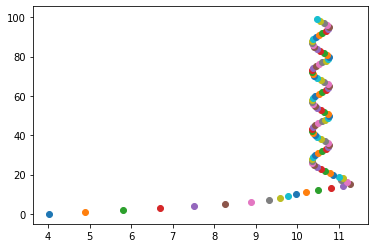

In [450]:
xxx= 3.2386117418064586
fii= -31.328668185970272
print("x=",xxx,"fii",fii)
for i in range(100):
    teta,stop=S10taj3(xxx,fii)
    print('step'+ str(i))
    print(xxx,fii,teta)
    if stop==1:
        print("truck reached a black area ")
        break
    xxx=new_x(xxx,fii,teta)
    fii=new_fi(fii,teta)
    plt.scatter(xxx, i, marker='o');

### test #2

x= 7.925836881489863 fii 163.79513493132447
step0
7.925836881489863 163.79513493132447 30.0
step1
7.09421867334478 149.31762274539454 30.000000000000007
step2
6.349428805720809 134.84011055946462 30.0
step3
5.73876763700006 120.3625983735347 30.000000000000004
step4
5.301017236308521 105.88508618760477 29.999999999999996
step5
5.063978399192294 91.40757400167485 20.418557442566676
step6
5.040957469821034 81.36163067803804 4.493228090978931
step7
5.190693304314899 79.11674436663525 -7.339730422039485
step8
5.377954688596256 82.77907395325848 7.537344167233967
step9
5.502564199297233 79.01856314668963 -12.391961270268718
step10
5.6886171666025 85.17820969395105 13.013557559229405
step11
5.77051513536161 78.71352398081586 -16.264056609285337
step12
5.958397540227123 86.76323751671141 15.613628714436498
step13
6.012776126819055 79.02922391555785 -19.446678247538408
step14
6.192227657678998 88.61155795211039 18.283809944774106
step15
6.215234873512488 79.58675103567234 -21.903008457367754
s

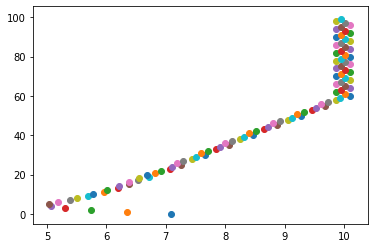

In [451]:
xxx=7.925836881489863
fii=163.79513493132447
print("x=",xxx,"fii",fii)
for i in range(100):
    teta,stop=S10taj2(xxx,fii)
    print('step'+ str(i))
    print(xxx,fii,teta)
    if stop==1:
        print("truck reached a black area ")
        break
    xxx=new_x(xxx,fii,teta)
    fii=new_fi(fii,teta)
    plt.scatter(xxx, i, marker='o');

### test #3

x= 4.705146106924842 fii 67.16141085849964
step0
4.705146106924842 67.16141085849964 1.982940918783834
step1
5.093050060942525 66.17008885470668 -5.6199071269933025
step2
5.495130992909537 68.97666112465569 -12.278740124428655
step3
5.845672672071114 75.08068579337613 -17.281710847047275
step4
6.091508420493318 83.62272571086746 7.086463907160008
step5
6.201734689603169 80.0862754422435 -20.42527917202366
step6
6.36307541302823 90.13541745269328 20.0364735251888
step7
6.3608549850278635 80.27147390553614 -19.43949029954962
step8
6.520202134583055 89.85037098573696 19.817257903402172
step9
6.522658993187756 80.09100239993883 -23.813318318322917
step10
6.680092581080696 91.73786080560616 20.53111672354542
step11
6.651692137002808 81.63836788059808 -6.895288441623473
step12
6.796060875691237 85.07976491881648 10.12911138059715
step13
6.880492874896098 80.03503328448379 -28.25732809243668
step14
7.03291700631429 93.72783968859956 21.368092841807737
step15
6.972369179090453 83.2311265993400

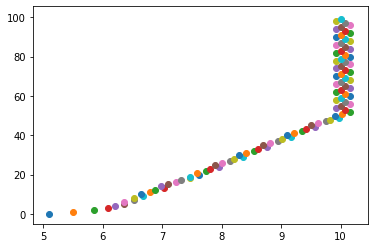

In [452]:
xxx= 4.705146106924842
fii=67.16141085849964
print("x=",xxx,"fii",fii)
for i in range(100):
    teta,stop=S10taj2(xxx,fii)
    print('step'+ str(i))
    print(xxx,fii,teta)
    if stop==1:
        print("truck reached a black area ")
        break
    xxx=new_x(xxx,fii,teta)
    fii=new_fi(fii,teta)
    plt.scatter(xxx, i, marker='o');